In [1]:
import numpy as np
from sklearn import decomposition
import pulse2percept as p2p

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rc('axes', **{'grid': False})

2017-05-01 16:30:35,585 [pulse2percept] [INFO] Welcome to pulse2percept


In [2]:
import logging
logging.getLogger(__name__).setLevel(logging.ERROR)

xcenter = np.linspace(-1500, 500, 5)
ycenter = np.linspace(-1500, 1500, 7)
rot_rad = np.linspace(0, 2 * np.pi, 9)
params = []
var = []
for y in ycenter:
    for x in ycenter:
        for rot in rot_rad:
            print('- [%d,%d], rad=%f' % (x, y, rot))
            argus = p2p.implants.ArgusII(x_center=x, y_center=y, rot=rot)
            sim = p2p.Simulation(argus)
            sim.set_optic_fiber_layer(sampling=200, save_data=False,
                          x_range=[p2p.retina.dva2ret(-25), p2p.retina.dva2ret(15)],
                          y_range=[p2p.retina.dva2ret(-15), p2p.retina.dva2ret(15)])

            V = np.zeros((sim.ofl.gridx.size, argus.num_electrodes))
            for i, e in enumerate(argus):
                cs = e.current_spread(sim.ofl.gridx, sim.ofl.gridy, 'OFL')
                ecs = sim.ofl.current2effectivecurrent(cs)
                V[:, i] = ecs.ravel()
            pca = decomposition.PCA()
            pca.fit(V)
            var.append(pca.explained_variance_ratio_)
            params.append([x, y, np.rad2deg(rot)])

2017-05-01 16:30:35,606 [pulse2percept.implants] [WARNING] Distance to fovea=4778 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:35,608 [pulse2percept.implants] [WARNING] Distance to fovea=4365 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:35,609 [pulse2percept.implants] [WARNING] Distance to fovea=3977 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:35,610 [pulse2percept.implants] [WARNING] Distance to fovea=3625 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:35,612 [pulse2percept.implants] [WARNING] Distance to fovea=3319 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:35,613 [pulse2percept.implants] [WARNING] Distance to fovea=3073 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:35,614 [pulse2percept.implants] [WARNING] Distance to

- [-1500,-1500], rad=0.000000


2017-05-01 16:30:36,784 [pulse2percept.implants] [WARNING] Distance to fovea=4168 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:36,785 [pulse2percept.implants] [WARNING] Distance to fovea=3895 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:36,786 [pulse2percept.implants] [WARNING] Distance to fovea=3676 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:36,787 [pulse2percept.implants] [WARNING] Distance to fovea=3523 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:36,788 [pulse2percept.implants] [WARNING] Distance to fovea=3444 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:36,789 [pulse2percept.implants] [WARNING] Distance to fovea=3444 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:36,790 [pulse2percept.implants] [WARNING] Distance to

- [-1500,-1500], rad=0.785398


2017-05-01 16:30:37,848 [pulse2percept.implants] [WARNING] Distance to fovea=3073 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:37,850 [pulse2percept.implants] [WARNING] Distance to fovea=3319 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:37,851 [pulse2percept.implants] [WARNING] Distance to fovea=3625 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:37,861 [pulse2percept.implants] [WARNING] Distance to fovea=3977 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:37,868 [pulse2percept.implants] [WARNING] Distance to fovea=4365 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:37,869 [pulse2percept.implants] [WARNING] Distance to fovea=4778 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:37,873 [pulse2percept.implants] [WARNING] Distance to

- [-1500,-1500], rad=1.570796


2017-05-01 16:30:38,967 [pulse2percept.implants] [WARNING] Distance to fovea=3191 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:38,967 [pulse2percept.implants] [WARNING] Distance to fovea=3676 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:38,968 [pulse2percept.implants] [WARNING] Distance to fovea=4171 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:38,969 [pulse2percept.implants] [WARNING] Distance to fovea=4672 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:38,970 [pulse2percept.implants] [WARNING] Distance to fovea=3014 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:38,971 [pulse2percept.implants] [WARNING] Distance to fovea=3523 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:38,971 [pulse2percept.implants] [WARNING] Distance to

- [-1500,-1500], rad=2.356194


2017-05-01 16:30:39,976 [pulse2percept.implants] [WARNING] Distance to fovea=3343 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:39,977 [pulse2percept.implants] [WARNING] Distance to fovea=3867 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:39,978 [pulse2percept.implants] [WARNING] Distance to fovea=3413 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:39,978 [pulse2percept.implants] [WARNING] Distance to fovea=3928 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:39,979 [pulse2percept.implants] [WARNING] Distance to fovea=3073 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:39,980 [pulse2percept.implants] [WARNING] Distance to fovea=3560 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:39,981 [pulse2percept.implants] [WARNING] Distance to

- [-1500,-1500], rad=3.141593


2017-05-01 16:30:40,970 [pulse2percept.implants] [WARNING] Distance to fovea=3006 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:40,971 [pulse2percept.implants] [WARNING] Distance to fovea=3006 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:40,971 [pulse2percept.implants] [WARNING] Distance to fovea=3356 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:40,972 [pulse2percept.implants] [WARNING] Distance to fovea=3010 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:40,973 [pulse2percept.implants] [WARNING] Distance to fovea=3010 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:40,973 [pulse2percept.implants] [WARNING] Distance to fovea=3356 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:40,974 [pulse2percept.implants] [WARNING] Distance to

- [-1500,-1500], rad=3.926991


2017-05-01 16:30:41,991 [pulse2percept.implants] [WARNING] Distance to fovea=3867 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:41,994 [pulse2percept.implants] [WARNING] Distance to fovea=3343 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:41,996 [pulse2percept.implants] [WARNING] Distance to fovea=3928 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:41,998 [pulse2percept.implants] [WARNING] Distance to fovea=3413 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:42,001 [pulse2percept.implants] [WARNING] Distance to fovea=4056 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:42,003 [pulse2percept.implants] [WARNING] Distance to fovea=3560 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:42,005 [pulse2percept.implants] [WARNING] Distance to

- [-1500,-1500], rad=4.712389


2017-05-01 16:30:43,115 [pulse2percept.implants] [WARNING] Distance to fovea=4672 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:43,116 [pulse2percept.implants] [WARNING] Distance to fovea=4171 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:43,117 [pulse2percept.implants] [WARNING] Distance to fovea=3676 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:43,118 [pulse2percept.implants] [WARNING] Distance to fovea=3191 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:43,119 [pulse2percept.implants] [WARNING] Distance to fovea=4552 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:43,121 [pulse2percept.implants] [WARNING] Distance to fovea=4036 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:43,122 [pulse2percept.implants] [WARNING] Distance to

- [-1500,-1500], rad=5.497787


2017-05-01 16:30:44,128 [pulse2percept.implants] [WARNING] Distance to fovea=4778 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:44,129 [pulse2percept.implants] [WARNING] Distance to fovea=4365 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:44,130 [pulse2percept.implants] [WARNING] Distance to fovea=3977 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:44,131 [pulse2percept.implants] [WARNING] Distance to fovea=3625 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:44,132 [pulse2percept.implants] [WARNING] Distance to fovea=3319 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:44,132 [pulse2percept.implants] [WARNING] Distance to fovea=3073 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:44,133 [pulse2percept.implants] [WARNING] Distance to

- [-1500,-1500], rad=6.283185


2017-05-01 16:30:45,238 [pulse2percept.implants] [WARNING] Distance to fovea=4384 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:45,239 [pulse2percept.implants] [WARNING] Distance to fovea=3995 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:45,240 [pulse2percept.implants] [WARNING] Distance to fovea=3641 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:45,241 [pulse2percept.implants] [WARNING] Distance to fovea=3332 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:45,242 [pulse2percept.implants] [WARNING] Distance to fovea=3083 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:45,243 [pulse2percept.implants] [WARNING] Distance to fovea=3125 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:45,243 [pulse2percept.implants] [WARNING] Distance to

- [-1000,-1500], rad=0.000000


2017-05-01 16:30:46,215 [pulse2percept.implants] [WARNING] Distance to fovea=3677 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:46,216 [pulse2percept.implants] [WARNING] Distance to fovea=3419 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:46,217 [pulse2percept.implants] [WARNING] Distance to fovea=3226 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:46,218 [pulse2percept.implants] [WARNING] Distance to fovea=3111 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:46,219 [pulse2percept.implants] [WARNING] Distance to fovea=3082 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:46,220 [pulse2percept.implants] [WARNING] Distance to fovea=3141 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:46,220 [pulse2percept.implants] [WARNING] Distance to

- [-1000,-1500], rad=0.785398


2017-05-01 16:30:47,189 [pulse2percept.implants] [WARNING] Distance to fovea=3253 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:47,190 [pulse2percept.implants] [WARNING] Distance to fovea=3641 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:47,191 [pulse2percept.implants] [WARNING] Distance to fovea=4060 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:47,192 [pulse2percept.implants] [WARNING] Distance to fovea=4502 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:47,193 [pulse2percept.implants] [WARNING] Distance to fovea=3332 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:47,194 [pulse2percept.implants] [WARNING] Distance to fovea=3786 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:47,194 [pulse2percept.implants] [WARNING] Distance to

- [-1000,-1500], rad=1.570796


2017-05-01 16:30:48,169 [pulse2percept.implants] [WARNING] Distance to fovea=3226 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:48,170 [pulse2percept.implants] [WARNING] Distance to fovea=3731 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:48,170 [pulse2percept.implants] [WARNING] Distance to fovea=4240 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:48,171 [pulse2percept.implants] [WARNING] Distance to fovea=3111 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:48,172 [pulse2percept.implants] [WARNING] Distance to fovea=3631 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:48,173 [pulse2percept.implants] [WARNING] Distance to fovea=4153 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:48,173 [pulse2percept.implants] [WARNING] Distance to

- [-1000,-1500], rad=2.356194


2017-05-01 16:30:49,144 [pulse2percept.implants] [WARNING] Distance to fovea=3368 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:49,145 [pulse2percept.implants] [WARNING] Distance to fovea=3437 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:49,146 [pulse2percept.implants] [WARNING] Distance to fovea=3096 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:49,147 [pulse2percept.implants] [WARNING] Distance to fovea=3583 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:49,148 [pulse2percept.implants] [WARNING] Distance to fovea=3340 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:49,150 [pulse2percept.implants] [WARNING] Distance to fovea=3796 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:49,152 [pulse2percept.implants] [WARNING] Distance to

- [-1000,-1500], rad=3.141593


2017-05-01 16:30:50,136 [pulse2percept.implants] [WARNING] Distance to fovea=3105 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:50,137 [pulse2percept.implants] [WARNING] Distance to fovea=3391 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:50,139 [pulse2percept.implants] [WARNING] Distance to fovea=3729 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:50,140 [pulse2percept.implants] [WARNING] Distance to fovea=3366 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:50,141 [pulse2percept.implants] [WARNING] Distance to fovea=3050 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:50,142 [pulse2percept.implants] [WARNING] Distance to fovea=3250 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:50,143 [pulse2percept.implants] [WARNING] Distance to

- [-1000,-1500], rad=3.926991


2017-05-01 16:30:51,140 [pulse2percept.implants] [WARNING] Distance to fovea=3875 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:51,141 [pulse2percept.implants] [WARNING] Distance to fovea=3352 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:51,141 [pulse2percept.implants] [WARNING] Distance to fovea=3868 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:51,142 [pulse2percept.implants] [WARNING] Distance to fovea=3344 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:51,143 [pulse2percept.implants] [WARNING] Distance to fovea=3932 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:51,144 [pulse2percept.implants] [WARNING] Distance to fovea=3418 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:51,145 [pulse2percept.implants] [WARNING] Distance to

- [-1000,-1500], rad=4.712389


2017-05-01 16:30:52,097 [pulse2percept.implants] [WARNING] Distance to fovea=4454 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:52,098 [pulse2percept.implants] [WARNING] Distance to fovea=3972 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:52,100 [pulse2percept.implants] [WARNING] Distance to fovea=3502 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:52,101 [pulse2percept.implants] [WARNING] Distance to fovea=3050 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:52,102 [pulse2percept.implants] [WARNING] Distance to fovea=4285 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:52,103 [pulse2percept.implants] [WARNING] Distance to fovea=3782 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:52,104 [pulse2percept.implants] [WARNING] Distance to

- [-1000,-1500], rad=5.497787


2017-05-01 16:30:53,160 [pulse2percept.implants] [WARNING] Distance to fovea=4384 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:53,162 [pulse2percept.implants] [WARNING] Distance to fovea=3995 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:53,166 [pulse2percept.implants] [WARNING] Distance to fovea=3641 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:53,170 [pulse2percept.implants] [WARNING] Distance to fovea=3332 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:53,173 [pulse2percept.implants] [WARNING] Distance to fovea=3083 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:53,177 [pulse2percept.implants] [WARNING] Distance to fovea=3125 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:53,180 [pulse2percept.implants] [WARNING] Distance to

- [-1000,-1500], rad=6.283185


2017-05-01 16:30:54,151 [pulse2percept.implants] [WARNING] Distance to fovea=4013 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:54,152 [pulse2percept.implants] [WARNING] Distance to fovea=3657 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:54,153 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:54,154 [pulse2percept.implants] [WARNING] Distance to fovea=3093 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:54,155 [pulse2percept.implants] [WARNING] Distance to fovea=3114 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:54,155 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:54,156 [pulse2percept.implants] [WARNING] Distance to

- [-500,-1500], rad=0.000000


2017-05-01 16:30:55,111 [pulse2percept.implants] [WARNING] Distance to fovea=3190 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:55,112 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:55,113 [pulse2percept.implants] [WARNING] Distance to fovea=3393 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:55,114 [pulse2percept.implants] [WARNING] Distance to fovea=3730 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:55,115 [pulse2percept.implants] [WARNING] Distance to fovea=4106 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:55,115 [pulse2percept.implants] [WARNING] Distance to fovea=3365 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:55,116 [pulse2percept.implants] [WARNING] Distance to

- [-500,-1500], rad=0.785398


2017-05-01 16:30:56,071 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:56,072 [pulse2percept.implants] [WARNING] Distance to fovea=3798 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:56,072 [pulse2percept.implants] [WARNING] Distance to fovea=4267 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:56,073 [pulse2percept.implants] [WARNING] Distance to fovea=3093 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:56,074 [pulse2percept.implants] [WARNING] Distance to fovea=3577 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:56,075 [pulse2percept.implants] [WARNING] Distance to fovea=4071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:56,076 [pulse2percept.implants] [WARNING] Distance to

- [-500,-1500], rad=1.570796


2017-05-01 16:30:57,045 [pulse2percept.implants] [WARNING] Distance to fovea=3308 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:57,046 [pulse2percept.implants] [WARNING] Distance to fovea=3825 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:57,047 [pulse2percept.implants] [WARNING] Distance to fovea=3253 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:57,048 [pulse2percept.implants] [WARNING] Distance to fovea=3778 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:57,049 [pulse2percept.implants] [WARNING] Distance to fovea=3282 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:57,050 [pulse2percept.implants] [WARNING] Distance to fovea=3803 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:57,050 [pulse2percept.implants] [WARNING] Distance to

- [-500,-1500], rad=2.356194


2017-05-01 16:30:58,028 [pulse2percept.implants] [WARNING] Distance to fovea=3119 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:58,029 [pulse2percept.implants] [WARNING] Distance to fovea=3362 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:58,029 [pulse2percept.implants] [WARNING] Distance to fovea=3271 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:58,030 [pulse2percept.implants] [WARNING] Distance to fovea=3664 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:58,031 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:58,032 [pulse2percept.implants] [WARNING] Distance to fovea=3114 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:58,033 [pulse2percept.implants] [WARNING] Distance to

- [-500,-1500], rad=3.141593


2017-05-01 16:30:58,978 [pulse2percept.implants] [WARNING] Distance to fovea=3071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:58,979 [pulse2percept.implants] [WARNING] Distance to fovea=3133 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:58,980 [pulse2percept.implants] [WARNING] Distance to fovea=3279 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:58,981 [pulse2percept.implants] [WARNING] Distance to fovea=3498 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:58,982 [pulse2percept.implants] [WARNING] Distance to fovea=3047 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:58,983 [pulse2percept.implants] [WARNING] Distance to fovea=3778 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:58,984 [pulse2percept.implants] [WARNING] Distance to

- [-500,-1500], rad=3.926991


2017-05-01 16:30:59,928 [pulse2percept.implants] [WARNING] Distance to fovea=3947 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:59,929 [pulse2percept.implants] [WARNING] Distance to fovea=3435 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:59,930 [pulse2percept.implants] [WARNING] Distance to fovea=3873 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:59,931 [pulse2percept.implants] [WARNING] Distance to fovea=3350 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:59,932 [pulse2percept.implants] [WARNING] Distance to fovea=3870 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:59,932 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:30:59,933 [pulse2percept.implants] [WARNING] Distance to

- [-500,-1500], rad=4.712389


2017-05-01 16:31:01,001 [pulse2percept.implants] [WARNING] Distance to fovea=4283 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:01,002 [pulse2percept.implants] [WARNING] Distance to fovea=3828 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:01,003 [pulse2percept.implants] [WARNING] Distance to fovea=3393 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:01,004 [pulse2percept.implants] [WARNING] Distance to fovea=4062 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:01,005 [pulse2percept.implants] [WARNING] Distance to fovea=3579 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:01,005 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:01,006 [pulse2percept.implants] [WARNING] Distance to

- [-500,-1500], rad=5.497787


2017-05-01 16:31:01,955 [pulse2percept.implants] [WARNING] Distance to fovea=4013 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:01,956 [pulse2percept.implants] [WARNING] Distance to fovea=3657 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:01,957 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:01,958 [pulse2percept.implants] [WARNING] Distance to fovea=3093 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:01,958 [pulse2percept.implants] [WARNING] Distance to fovea=3114 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:01,959 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:01,960 [pulse2percept.implants] [WARNING] Distance to

- [-500,-1500], rad=6.283185


2017-05-01 16:31:02,885 [pulse2percept.implants] [WARNING] Distance to fovea=3673 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:02,886 [pulse2percept.implants] [WARNING] Distance to fovea=3360 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:02,888 [pulse2percept.implants] [WARNING] Distance to fovea=3104 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:02,889 [pulse2percept.implants] [WARNING] Distance to fovea=3104 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:02,890 [pulse2percept.implants] [WARNING] Distance to fovea=3360 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:02,891 [pulse2percept.implants] [WARNING] Distance to fovea=3673 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:02,892 [pulse2percept.implants] [WARNING] Distance to

- [0,-1500], rad=0.000000


2017-05-01 16:31:03,825 [pulse2percept.implants] [WARNING] Distance to fovea=3008 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:03,826 [pulse2percept.implants] [WARNING] Distance to fovea=3356 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:03,827 [pulse2percept.implants] [WARNING] Distance to fovea=3746 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:03,828 [pulse2percept.implants] [WARNING] Distance to fovea=4165 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:03,829 [pulse2percept.implants] [WARNING] Distance to fovea=3008 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:03,830 [pulse2percept.implants] [WARNING] Distance to fovea=3437 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:03,831 [pulse2percept.implants] [WARNING] Distance to

- [0,-1500], rad=0.785398


2017-05-01 16:31:04,798 [pulse2percept.implants] [WARNING] Distance to fovea=3104 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:04,799 [pulse2percept.implants] [WARNING] Distance to fovea=3586 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:04,800 [pulse2percept.implants] [WARNING] Distance to fovea=4079 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:04,800 [pulse2percept.implants] [WARNING] Distance to fovea=3429 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:04,801 [pulse2percept.implants] [WARNING] Distance to fovea=3942 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:04,802 [pulse2percept.implants] [WARNING] Distance to fovea=3348 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:04,803 [pulse2percept.implants] [WARNING] Distance to

- [0,-1500], rad=1.570796


2017-05-01 16:31:05,765 [pulse2percept.implants] [WARNING] Distance to fovea=3432 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:05,766 [pulse2percept.implants] [WARNING] Distance to fovea=3434 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:05,767 [pulse2percept.implants] [WARNING] Distance to fovea=3006 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:05,768 [pulse2percept.implants] [WARNING] Distance to fovea=3515 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:05,769 [pulse2percept.implants] [WARNING] Distance to fovea=3186 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:05,770 [pulse2percept.implants] [WARNING] Distance to fovea=3670 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:05,771 [pulse2percept.implants] [WARNING] Distance to

- [0,-1500], rad=2.356194


2017-05-01 16:31:06,780 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:06,781 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:06,781 [pulse2percept.implants] [WARNING] Distance to fovea=3673 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:06,782 [pulse2percept.implants] [WARNING] Distance to fovea=3360 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:06,783 [pulse2percept.implants] [WARNING] Distance to fovea=3104 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:06,784 [pulse2percept.implants] [WARNING] Distance to fovea=3104 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:06,785 [pulse2percept.implants] [WARNING] Distance to

- [0,-1500], rad=3.141593


2017-05-01 16:31:07,757 [pulse2percept.implants] [WARNING] Distance to fovea=3432 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:07,758 [pulse2percept.implants] [WARNING] Distance to fovea=3434 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:07,759 [pulse2percept.implants] [WARNING] Distance to fovea=3515 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:07,760 [pulse2percept.implants] [WARNING] Distance to fovea=3006 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:07,768 [pulse2percept.implants] [WARNING] Distance to fovea=3670 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:07,769 [pulse2percept.implants] [WARNING] Distance to fovea=3186 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:07,770 [pulse2percept.implants] [WARNING] Distance to

- [0,-1500], rad=3.926991


2017-05-01 16:31:08,737 [pulse2percept.implants] [WARNING] Distance to fovea=4079 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:08,738 [pulse2percept.implants] [WARNING] Distance to fovea=3586 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:08,739 [pulse2percept.implants] [WARNING] Distance to fovea=3104 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:08,740 [pulse2percept.implants] [WARNING] Distance to fovea=3942 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:08,741 [pulse2percept.implants] [WARNING] Distance to fovea=3429 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:08,741 [pulse2percept.implants] [WARNING] Distance to fovea=3871 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:08,742 [pulse2percept.implants] [WARNING] Distance to

- [0,-1500], rad=4.712389


2017-05-01 16:31:09,687 [pulse2percept.implants] [WARNING] Distance to fovea=4165 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:09,688 [pulse2percept.implants] [WARNING] Distance to fovea=3746 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:09,689 [pulse2percept.implants] [WARNING] Distance to fovea=3356 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:09,690 [pulse2percept.implants] [WARNING] Distance to fovea=3008 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:09,691 [pulse2percept.implants] [WARNING] Distance to fovea=3890 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:09,691 [pulse2percept.implants] [WARNING] Distance to fovea=3437 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:09,692 [pulse2percept.implants] [WARNING] Distance to

- [0,-1500], rad=5.497787


2017-05-01 16:31:10,655 [pulse2percept.implants] [WARNING] Distance to fovea=3673 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:10,656 [pulse2percept.implants] [WARNING] Distance to fovea=3360 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:10,657 [pulse2percept.implants] [WARNING] Distance to fovea=3104 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:10,658 [pulse2percept.implants] [WARNING] Distance to fovea=3104 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:10,659 [pulse2percept.implants] [WARNING] Distance to fovea=3360 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:10,659 [pulse2percept.implants] [WARNING] Distance to fovea=3673 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:10,660 [pulse2percept.implants] [WARNING] Distance to

- [0,-1500], rad=6.283185


2017-05-01 16:31:11,658 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:11,659 [pulse2percept.implants] [WARNING] Distance to fovea=3114 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:11,660 [pulse2percept.implants] [WARNING] Distance to fovea=3093 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:11,661 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:11,662 [pulse2percept.implants] [WARNING] Distance to fovea=3657 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:11,663 [pulse2percept.implants] [WARNING] Distance to fovea=4013 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:11,663 [pulse2percept.implants] [WARNING] Distance to

- [500,-1500], rad=0.000000


2017-05-01 16:31:12,617 [pulse2percept.implants] [WARNING] Distance to fovea=3393 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:12,618 [pulse2percept.implants] [WARNING] Distance to fovea=3828 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:12,619 [pulse2percept.implants] [WARNING] Distance to fovea=4283 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:12,619 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:12,620 [pulse2percept.implants] [WARNING] Distance to fovea=3579 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:12,621 [pulse2percept.implants] [WARNING] Distance to fovea=4062 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:12,621 [pulse2percept.implants] [WARNING] Distance to

- [500,-1500], rad=0.785398


2017-05-01 16:31:13,562 [pulse2percept.implants] [WARNING] Distance to fovea=3435 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:13,563 [pulse2percept.implants] [WARNING] Distance to fovea=3947 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:13,564 [pulse2percept.implants] [WARNING] Distance to fovea=3350 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:13,565 [pulse2percept.implants] [WARNING] Distance to fovea=3873 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:13,565 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:13,566 [pulse2percept.implants] [WARNING] Distance to fovea=3870 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:13,567 [pulse2percept.implants] [WARNING] Distance to

- [500,-1500], rad=1.570796


2017-05-01 16:31:14,613 [pulse2percept.implants] [WARNING] Distance to fovea=3071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:14,614 [pulse2percept.implants] [WARNING] Distance to fovea=3133 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:14,615 [pulse2percept.implants] [WARNING] Distance to fovea=3279 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:14,616 [pulse2percept.implants] [WARNING] Distance to fovea=3047 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:14,617 [pulse2percept.implants] [WARNING] Distance to fovea=3498 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:14,618 [pulse2percept.implants] [WARNING] Distance to fovea=3365 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:14,618 [pulse2percept.implants] [WARNING] Distance to

- [500,-1500], rad=2.356194


2017-05-01 16:31:15,591 [pulse2percept.implants] [WARNING] Distance to fovea=3119 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:15,592 [pulse2percept.implants] [WARNING] Distance to fovea=3362 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:15,593 [pulse2percept.implants] [WARNING] Distance to fovea=3664 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:15,594 [pulse2percept.implants] [WARNING] Distance to fovea=3271 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:15,595 [pulse2percept.implants] [WARNING] Distance to fovea=4013 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:15,595 [pulse2percept.implants] [WARNING] Distance to fovea=3657 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:15,596 [pulse2percept.implants] [WARNING] Distance to

- [500,-1500], rad=3.141593


2017-05-01 16:31:16,549 [pulse2percept.implants] [WARNING] Distance to fovea=3825 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:16,551 [pulse2percept.implants] [WARNING] Distance to fovea=3308 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:16,552 [pulse2percept.implants] [WARNING] Distance to fovea=3778 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:16,554 [pulse2percept.implants] [WARNING] Distance to fovea=3253 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:16,555 [pulse2percept.implants] [WARNING] Distance to fovea=3803 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:16,557 [pulse2percept.implants] [WARNING] Distance to fovea=3282 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:16,558 [pulse2percept.implants] [WARNING] Distance to

- [500,-1500], rad=3.926991


2017-05-01 16:31:17,511 [pulse2percept.implants] [WARNING] Distance to fovea=4267 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:17,514 [pulse2percept.implants] [WARNING] Distance to fovea=3798 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:17,517 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:17,519 [pulse2percept.implants] [WARNING] Distance to fovea=4071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:17,521 [pulse2percept.implants] [WARNING] Distance to fovea=3577 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:17,523 [pulse2percept.implants] [WARNING] Distance to fovea=3093 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:17,525 [pulse2percept.implants] [WARNING] Distance to

- [500,-1500], rad=4.712389


2017-05-01 16:31:18,586 [pulse2percept.implants] [WARNING] Distance to fovea=4106 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:18,587 [pulse2percept.implants] [WARNING] Distance to fovea=3730 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:18,588 [pulse2percept.implants] [WARNING] Distance to fovea=3393 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:18,589 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:18,590 [pulse2percept.implants] [WARNING] Distance to fovea=3190 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:18,590 [pulse2percept.implants] [WARNING] Distance to fovea=3778 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:18,591 [pulse2percept.implants] [WARNING] Distance to

- [500,-1500], rad=5.497787


2017-05-01 16:31:19,541 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:19,542 [pulse2percept.implants] [WARNING] Distance to fovea=3114 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:19,543 [pulse2percept.implants] [WARNING] Distance to fovea=3093 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:19,543 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:19,544 [pulse2percept.implants] [WARNING] Distance to fovea=3657 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:19,545 [pulse2percept.implants] [WARNING] Distance to fovea=4013 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:19,546 [pulse2percept.implants] [WARNING] Distance to

- [500,-1500], rad=6.283185


2017-05-01 16:31:20,489 [pulse2percept.implants] [WARNING] Distance to fovea=3125 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:20,490 [pulse2percept.implants] [WARNING] Distance to fovea=3083 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:20,491 [pulse2percept.implants] [WARNING] Distance to fovea=3332 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:20,492 [pulse2percept.implants] [WARNING] Distance to fovea=3641 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:20,493 [pulse2percept.implants] [WARNING] Distance to fovea=3995 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:20,493 [pulse2percept.implants] [WARNING] Distance to fovea=4384 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:20,494 [pulse2percept.implants] [WARNING] Distance to

- [1000,-1500], rad=0.000000


2017-05-01 16:31:21,466 [pulse2percept.implants] [WARNING] Distance to fovea=3050 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:21,468 [pulse2percept.implants] [WARNING] Distance to fovea=3502 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:21,469 [pulse2percept.implants] [WARNING] Distance to fovea=3972 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:21,470 [pulse2percept.implants] [WARNING] Distance to fovea=4454 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:21,472 [pulse2percept.implants] [WARNING] Distance to fovea=3285 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:21,473 [pulse2percept.implants] [WARNING] Distance to fovea=3782 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:21,474 [pulse2percept.implants] [WARNING] Distance to

- [1000,-1500], rad=0.785398


2017-05-01 16:31:22,464 [pulse2percept.implants] [WARNING] Distance to fovea=3352 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:22,465 [pulse2percept.implants] [WARNING] Distance to fovea=3875 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:22,466 [pulse2percept.implants] [WARNING] Distance to fovea=3344 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:22,467 [pulse2percept.implants] [WARNING] Distance to fovea=3868 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:22,467 [pulse2percept.implants] [WARNING] Distance to fovea=3418 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:22,468 [pulse2percept.implants] [WARNING] Distance to fovea=3932 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:22,469 [pulse2percept.implants] [WARNING] Distance to

- [1000,-1500], rad=1.570796


2017-05-01 16:31:23,710 [pulse2percept.implants] [WARNING] Distance to fovea=3105 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:23,712 [pulse2percept.implants] [WARNING] Distance to fovea=3391 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:23,713 [pulse2percept.implants] [WARNING] Distance to fovea=3250 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:23,715 [pulse2percept.implants] [WARNING] Distance to fovea=3050 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:23,716 [pulse2percept.implants] [WARNING] Distance to fovea=3366 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:23,717 [pulse2percept.implants] [WARNING] Distance to fovea=3729 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:23,719 [pulse2percept.implants] [WARNING] Distance to

- [1000,-1500], rad=2.356194


2017-05-01 16:31:25,463 [pulse2percept.implants] [WARNING] Distance to fovea=3368 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:25,464 [pulse2percept.implants] [WARNING] Distance to fovea=3437 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:25,466 [pulse2percept.implants] [WARNING] Distance to fovea=3583 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:25,467 [pulse2percept.implants] [WARNING] Distance to fovea=3096 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:25,468 [pulse2percept.implants] [WARNING] Distance to fovea=3796 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:25,469 [pulse2percept.implants] [WARNING] Distance to fovea=3340 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:25,470 [pulse2percept.implants] [WARNING] Distance to

- [1000,-1500], rad=3.141593


2017-05-01 16:31:26,938 [pulse2percept.implants] [WARNING] Distance to fovea=4240 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:26,940 [pulse2percept.implants] [WARNING] Distance to fovea=3731 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:26,941 [pulse2percept.implants] [WARNING] Distance to fovea=3226 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:26,943 [pulse2percept.implants] [WARNING] Distance to fovea=4153 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:26,945 [pulse2percept.implants] [WARNING] Distance to fovea=3631 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:26,946 [pulse2percept.implants] [WARNING] Distance to fovea=3111 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:26,948 [pulse2percept.implants] [WARNING] Distance to

- [1000,-1500], rad=3.926991


2017-05-01 16:31:28,620 [pulse2percept.implants] [WARNING] Distance to fovea=4502 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:28,621 [pulse2percept.implants] [WARNING] Distance to fovea=4060 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:28,623 [pulse2percept.implants] [WARNING] Distance to fovea=3641 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:28,624 [pulse2percept.implants] [WARNING] Distance to fovea=3253 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:28,626 [pulse2percept.implants] [WARNING] Distance to fovea=4256 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:28,627 [pulse2percept.implants] [WARNING] Distance to fovea=3786 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:28,629 [pulse2percept.implants] [WARNING] Distance to

- [1000,-1500], rad=4.712389


2017-05-01 16:31:30,292 [pulse2percept.implants] [WARNING] Distance to fovea=4107 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:30,293 [pulse2percept.implants] [WARNING] Distance to fovea=3780 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:30,294 [pulse2percept.implants] [WARNING] Distance to fovea=3502 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:30,295 [pulse2percept.implants] [WARNING] Distance to fovea=3285 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:30,296 [pulse2percept.implants] [WARNING] Distance to fovea=3141 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:30,297 [pulse2percept.implants] [WARNING] Distance to fovea=3082 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:30,298 [pulse2percept.implants] [WARNING] Distance to

- [1000,-1500], rad=5.497787


2017-05-01 16:31:31,951 [pulse2percept.implants] [WARNING] Distance to fovea=3125 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:31,952 [pulse2percept.implants] [WARNING] Distance to fovea=3083 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:31,954 [pulse2percept.implants] [WARNING] Distance to fovea=3332 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:31,954 [pulse2percept.implants] [WARNING] Distance to fovea=3641 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:31,956 [pulse2percept.implants] [WARNING] Distance to fovea=3995 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:31,958 [pulse2percept.implants] [WARNING] Distance to fovea=4384 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:31,958 [pulse2percept.implants] [WARNING] Distance to

- [1000,-1500], rad=6.283185


2017-05-01 16:31:33,589 [pulse2percept.implants] [WARNING] Distance to fovea=3073 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:33,590 [pulse2percept.implants] [WARNING] Distance to fovea=3319 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:33,591 [pulse2percept.implants] [WARNING] Distance to fovea=3625 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:33,592 [pulse2percept.implants] [WARNING] Distance to fovea=3977 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:33,593 [pulse2percept.implants] [WARNING] Distance to fovea=4365 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:33,594 [pulse2percept.implants] [WARNING] Distance to fovea=4778 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:33,595 [pulse2percept.implants] [WARNING] Distance to

- [1500,-1500], rad=0.000000


2017-05-01 16:31:34,950 [pulse2percept.implants] [WARNING] Distance to fovea=3191 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:34,951 [pulse2percept.implants] [WARNING] Distance to fovea=3676 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:34,952 [pulse2percept.implants] [WARNING] Distance to fovea=4171 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:34,954 [pulse2percept.implants] [WARNING] Distance to fovea=4672 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:34,956 [pulse2percept.implants] [WARNING] Distance to fovea=3014 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:34,957 [pulse2percept.implants] [WARNING] Distance to fovea=3523 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:34,959 [pulse2percept.implants] [WARNING] Distance to

- [1500,-1500], rad=0.785398


2017-05-01 16:31:36,637 [pulse2percept.implants] [WARNING] Distance to fovea=3343 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:36,638 [pulse2percept.implants] [WARNING] Distance to fovea=3867 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:36,639 [pulse2percept.implants] [WARNING] Distance to fovea=3413 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:36,642 [pulse2percept.implants] [WARNING] Distance to fovea=3928 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:36,643 [pulse2percept.implants] [WARNING] Distance to fovea=3073 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:36,645 [pulse2percept.implants] [WARNING] Distance to fovea=3560 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:36,647 [pulse2percept.implants] [WARNING] Distance to

- [1500,-1500], rad=1.570796


2017-05-01 16:31:38,275 [pulse2percept.implants] [WARNING] Distance to fovea=3006 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:38,278 [pulse2percept.implants] [WARNING] Distance to fovea=3006 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:38,279 [pulse2percept.implants] [WARNING] Distance to fovea=3356 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:38,280 [pulse2percept.implants] [WARNING] Distance to fovea=3010 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:38,281 [pulse2percept.implants] [WARNING] Distance to fovea=3010 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:38,282 [pulse2percept.implants] [WARNING] Distance to fovea=3356 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:38,283 [pulse2percept.implants] [WARNING] Distance to

- [1500,-1500], rad=2.356194


2017-05-01 16:31:39,956 [pulse2percept.implants] [WARNING] Distance to fovea=3867 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:39,957 [pulse2percept.implants] [WARNING] Distance to fovea=3343 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:39,958 [pulse2percept.implants] [WARNING] Distance to fovea=3928 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:39,959 [pulse2percept.implants] [WARNING] Distance to fovea=3413 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:39,960 [pulse2percept.implants] [WARNING] Distance to fovea=4056 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:39,961 [pulse2percept.implants] [WARNING] Distance to fovea=3560 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:39,962 [pulse2percept.implants] [WARNING] Distance to

- [1500,-1500], rad=3.141593


2017-05-01 16:31:41,318 [pulse2percept.implants] [WARNING] Distance to fovea=4672 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:41,319 [pulse2percept.implants] [WARNING] Distance to fovea=4171 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:41,320 [pulse2percept.implants] [WARNING] Distance to fovea=3676 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:41,324 [pulse2percept.implants] [WARNING] Distance to fovea=3191 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:41,325 [pulse2percept.implants] [WARNING] Distance to fovea=4552 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:41,327 [pulse2percept.implants] [WARNING] Distance to fovea=4036 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:41,329 [pulse2percept.implants] [WARNING] Distance to

- [1500,-1500], rad=3.926991


2017-05-01 16:31:42,907 [pulse2percept.implants] [WARNING] Distance to fovea=4778 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:42,909 [pulse2percept.implants] [WARNING] Distance to fovea=4365 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:42,911 [pulse2percept.implants] [WARNING] Distance to fovea=3977 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:42,912 [pulse2percept.implants] [WARNING] Distance to fovea=3625 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:42,914 [pulse2percept.implants] [WARNING] Distance to fovea=3319 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:42,916 [pulse2percept.implants] [WARNING] Distance to fovea=3073 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:42,917 [pulse2percept.implants] [WARNING] Distance to

- [1500,-1500], rad=4.712389


2017-05-01 16:31:44,556 [pulse2percept.implants] [WARNING] Distance to fovea=4168 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:44,557 [pulse2percept.implants] [WARNING] Distance to fovea=3895 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:44,558 [pulse2percept.implants] [WARNING] Distance to fovea=3676 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:44,559 [pulse2percept.implants] [WARNING] Distance to fovea=3523 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:44,560 [pulse2percept.implants] [WARNING] Distance to fovea=3444 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:44,561 [pulse2percept.implants] [WARNING] Distance to fovea=3444 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:44,562 [pulse2percept.implants] [WARNING] Distance to

- [1500,-1500], rad=5.497787


2017-05-01 16:31:46,176 [pulse2percept.implants] [WARNING] Distance to fovea=3073 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:46,177 [pulse2percept.implants] [WARNING] Distance to fovea=3319 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:46,178 [pulse2percept.implants] [WARNING] Distance to fovea=3625 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:46,179 [pulse2percept.implants] [WARNING] Distance to fovea=3977 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:46,180 [pulse2percept.implants] [WARNING] Distance to fovea=4365 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:46,181 [pulse2percept.implants] [WARNING] Distance to fovea=4778 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:46,182 [pulse2percept.implants] [WARNING] Distance to

- [1500,-1500], rad=6.283185


2017-05-01 16:31:47,183 [pulse2percept.implants] [WARNING] Distance to fovea=4502 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:47,184 [pulse2percept.implants] [WARNING] Distance to fovea=4060 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:47,185 [pulse2percept.implants] [WARNING] Distance to fovea=3641 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:47,186 [pulse2percept.implants] [WARNING] Distance to fovea=3253 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:47,186 [pulse2percept.implants] [WARNING] Distance to fovea=4256 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:47,187 [pulse2percept.implants] [WARNING] Distance to fovea=3786 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:47,188 [pulse2percept.implants] [WARNING] Distance to

- [-1500,-1000], rad=0.000000


2017-05-01 16:31:48,219 [pulse2percept.implants] [WARNING] Distance to fovea=4107 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:48,228 [pulse2percept.implants] [WARNING] Distance to fovea=3780 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:48,229 [pulse2percept.implants] [WARNING] Distance to fovea=3502 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:48,231 [pulse2percept.implants] [WARNING] Distance to fovea=3285 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:48,233 [pulse2percept.implants] [WARNING] Distance to fovea=3141 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:48,235 [pulse2percept.implants] [WARNING] Distance to fovea=3082 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:48,236 [pulse2percept.implants] [WARNING] Distance to

- [-1500,-1000], rad=0.785398


2017-05-01 16:31:49,234 [pulse2percept.implants] [WARNING] Distance to fovea=3125 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:49,235 [pulse2percept.implants] [WARNING] Distance to fovea=3083 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:49,236 [pulse2percept.implants] [WARNING] Distance to fovea=3332 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:49,237 [pulse2percept.implants] [WARNING] Distance to fovea=3641 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:49,237 [pulse2percept.implants] [WARNING] Distance to fovea=3995 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:49,238 [pulse2percept.implants] [WARNING] Distance to fovea=4384 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:49,239 [pulse2percept.implants] [WARNING] Distance to

- [-1500,-1000], rad=1.570796


2017-05-01 16:31:50,183 [pulse2percept.implants] [WARNING] Distance to fovea=3050 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:50,184 [pulse2percept.implants] [WARNING] Distance to fovea=3502 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:50,185 [pulse2percept.implants] [WARNING] Distance to fovea=3972 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:50,186 [pulse2percept.implants] [WARNING] Distance to fovea=4454 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:50,187 [pulse2percept.implants] [WARNING] Distance to fovea=3285 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:50,187 [pulse2percept.implants] [WARNING] Distance to fovea=3782 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:50,188 [pulse2percept.implants] [WARNING] Distance to

- [-1500,-1000], rad=2.356194


2017-05-01 16:31:51,138 [pulse2percept.implants] [WARNING] Distance to fovea=3352 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:51,139 [pulse2percept.implants] [WARNING] Distance to fovea=3875 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:51,140 [pulse2percept.implants] [WARNING] Distance to fovea=3344 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:51,141 [pulse2percept.implants] [WARNING] Distance to fovea=3868 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:51,142 [pulse2percept.implants] [WARNING] Distance to fovea=3418 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:51,143 [pulse2percept.implants] [WARNING] Distance to fovea=3932 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:51,143 [pulse2percept.implants] [WARNING] Distance to

- [-1500,-1000], rad=3.141593


2017-05-01 16:31:52,121 [pulse2percept.implants] [WARNING] Distance to fovea=3105 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:52,122 [pulse2percept.implants] [WARNING] Distance to fovea=3391 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:52,123 [pulse2percept.implants] [WARNING] Distance to fovea=3250 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:52,124 [pulse2percept.implants] [WARNING] Distance to fovea=3050 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:52,125 [pulse2percept.implants] [WARNING] Distance to fovea=3366 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:52,125 [pulse2percept.implants] [WARNING] Distance to fovea=3729 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:52,126 [pulse2percept.implants] [WARNING] Distance to

- [-1500,-1000], rad=3.926991


2017-05-01 16:31:53,114 [pulse2percept.implants] [WARNING] Distance to fovea=3368 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:53,115 [pulse2percept.implants] [WARNING] Distance to fovea=3437 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:53,117 [pulse2percept.implants] [WARNING] Distance to fovea=3583 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:53,118 [pulse2percept.implants] [WARNING] Distance to fovea=3096 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:53,122 [pulse2percept.implants] [WARNING] Distance to fovea=3796 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:53,123 [pulse2percept.implants] [WARNING] Distance to fovea=3340 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:53,124 [pulse2percept.implants] [WARNING] Distance to

- [-1500,-1000], rad=4.712389


2017-05-01 16:31:54,094 [pulse2percept.implants] [WARNING] Distance to fovea=4240 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:54,095 [pulse2percept.implants] [WARNING] Distance to fovea=3731 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:54,096 [pulse2percept.implants] [WARNING] Distance to fovea=3226 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:54,096 [pulse2percept.implants] [WARNING] Distance to fovea=4153 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:54,097 [pulse2percept.implants] [WARNING] Distance to fovea=3631 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:54,098 [pulse2percept.implants] [WARNING] Distance to fovea=3111 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:54,099 [pulse2percept.implants] [WARNING] Distance to

- [-1500,-1000], rad=5.497787


2017-05-01 16:31:55,041 [pulse2percept.implants] [WARNING] Distance to fovea=4502 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:55,041 [pulse2percept.implants] [WARNING] Distance to fovea=4060 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:55,042 [pulse2percept.implants] [WARNING] Distance to fovea=3641 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:55,043 [pulse2percept.implants] [WARNING] Distance to fovea=3253 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:55,044 [pulse2percept.implants] [WARNING] Distance to fovea=4256 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:55,045 [pulse2percept.implants] [WARNING] Distance to fovea=3786 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:55,045 [pulse2percept.implants] [WARNING] Distance to

- [-1500,-1000], rad=6.283185


2017-05-01 16:31:55,985 [pulse2percept.implants] [WARNING] Distance to fovea=4081 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:55,986 [pulse2percept.implants] [WARNING] Distance to fovea=3660 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:55,987 [pulse2percept.implants] [WARNING] Distance to fovea=3270 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:55,988 [pulse2percept.implants] [WARNING] Distance to fovea=3808 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:55,989 [pulse2percept.implants] [WARNING] Distance to fovea=3354 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:55,990 [pulse2percept.implants] [WARNING] Distance to fovea=3592 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:55,990 [pulse2percept.implants] [WARNING] Distance to

- [-1000,-1000], rad=0.000000


2017-05-01 16:31:56,967 [pulse2percept.implants] [WARNING] Distance to fovea=3608 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:56,968 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:56,968 [pulse2percept.implants] [WARNING] Distance to fovea=3026 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:56,969 [pulse2percept.implants] [WARNING] Distance to fovea=3026 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:56,970 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:56,971 [pulse2percept.implants] [WARNING] Distance to fovea=3608 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:56,972 [pulse2percept.implants] [WARNING] Distance to

- [-1000,-1000], rad=0.785398


2017-05-01 16:31:57,909 [pulse2percept.implants] [WARNING] Distance to fovea=3270 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:57,912 [pulse2percept.implants] [WARNING] Distance to fovea=3660 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:57,914 [pulse2percept.implants] [WARNING] Distance to fovea=4081 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:57,916 [pulse2percept.implants] [WARNING] Distance to fovea=3354 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:57,918 [pulse2percept.implants] [WARNING] Distance to fovea=3808 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:57,920 [pulse2percept.implants] [WARNING] Distance to fovea=3106 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:57,922 [pulse2percept.implants] [WARNING] Distance to

- [-1000,-1000], rad=1.570796


2017-05-01 16:31:58,980 [pulse2percept.implants] [WARNING] Distance to fovea=3026 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:58,981 [pulse2percept.implants] [WARNING] Distance to fovea=3507 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:58,981 [pulse2percept.implants] [WARNING] Distance to fovea=3998 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:58,982 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:58,983 [pulse2percept.implants] [WARNING] Distance to fovea=3858 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:58,984 [pulse2percept.implants] [WARNING] Distance to fovea=3262 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:58,985 [pulse2percept.implants] [WARNING] Distance to

- [-1000,-1000], rad=2.356194


2017-05-01 16:31:59,933 [pulse2percept.implants] [WARNING] Distance to fovea=3377 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:59,934 [pulse2percept.implants] [WARNING] Distance to fovea=3369 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:59,935 [pulse2percept.implants] [WARNING] Distance to fovea=3442 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:59,936 [pulse2percept.implants] [WARNING] Distance to fovea=3106 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:59,937 [pulse2percept.implants] [WARNING] Distance to fovea=3592 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:59,938 [pulse2percept.implants] [WARNING] Distance to fovea=3354 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:31:59,939 [pulse2percept.implants] [WARNING] Distance to

- [-1000,-1000], rad=3.141593


2017-05-01 16:32:00,937 [pulse2percept.implants] [WARNING] Distance to fovea=3229 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:00,939 [pulse2percept.implants] [WARNING] Distance to fovea=3229 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:00,940 [pulse2percept.implants] [WARNING] Distance to fovea=3608 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:00,941 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:00,942 [pulse2percept.implants] [WARNING] Distance to fovea=3026 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:00,943 [pulse2percept.implants] [WARNING] Distance to fovea=3026 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:00,943 [pulse2percept.implants] [WARNING] Distance to

- [-1000,-1000], rad=3.926991


2017-05-01 16:32:01,941 [pulse2percept.implants] [WARNING] Distance to fovea=3377 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:01,942 [pulse2percept.implants] [WARNING] Distance to fovea=3369 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:01,943 [pulse2percept.implants] [WARNING] Distance to fovea=3442 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:01,944 [pulse2percept.implants] [WARNING] Distance to fovea=3592 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:01,945 [pulse2percept.implants] [WARNING] Distance to fovea=3106 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:01,946 [pulse2percept.implants] [WARNING] Distance to fovea=3808 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:01,946 [pulse2percept.implants] [WARNING] Distance to

- [-1000,-1000], rad=4.712389


2017-05-01 16:32:02,898 [pulse2percept.implants] [WARNING] Distance to fovea=3998 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:02,899 [pulse2percept.implants] [WARNING] Distance to fovea=3507 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:02,900 [pulse2percept.implants] [WARNING] Distance to fovea=3026 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:02,901 [pulse2percept.implants] [WARNING] Distance to fovea=3858 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:02,902 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:02,903 [pulse2percept.implants] [WARNING] Distance to fovea=3786 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:02,903 [pulse2percept.implants] [WARNING] Distance to

- [-1000,-1000], rad=5.497787


2017-05-01 16:32:03,866 [pulse2percept.implants] [WARNING] Distance to fovea=4081 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:03,867 [pulse2percept.implants] [WARNING] Distance to fovea=3660 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:03,868 [pulse2percept.implants] [WARNING] Distance to fovea=3270 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:03,869 [pulse2percept.implants] [WARNING] Distance to fovea=3808 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:03,869 [pulse2percept.implants] [WARNING] Distance to fovea=3354 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:03,870 [pulse2percept.implants] [WARNING] Distance to fovea=3592 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:03,871 [pulse2percept.implants] [WARNING] Distance to

- [-1000,-1000], rad=6.283185


2017-05-01 16:32:04,813 [pulse2percept.implants] [WARNING] Distance to fovea=3680 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:04,814 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:04,815 [pulse2percept.implants] [WARNING] Distance to fovea=3375 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:04,816 [pulse2percept.implants] [WARNING] Distance to fovea=3129 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,-1000], rad=0.000000


2017-05-01 16:32:05,783 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:05,784 [pulse2percept.implants] [WARNING] Distance to fovea=3230 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:05,785 [pulse2percept.implants] [WARNING] Distance to fovea=3607 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:05,786 [pulse2percept.implants] [WARNING] Distance to fovea=3285 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:05,786 [pulse2percept.implants] [WARNING] Distance to fovea=3021 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,-1000], rad=0.785398


2017-05-01 16:32:06,733 [pulse2percept.implants] [WARNING] Distance to fovea=3367 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:06,734 [pulse2percept.implants] [WARNING] Distance to fovea=3820 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:06,735 [pulse2percept.implants] [WARNING] Distance to fovea=3116 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:06,736 [pulse2percept.implants] [WARNING] Distance to fovea=3601 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:06,737 [pulse2percept.implants] [WARNING] Distance to fovea=3448 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:06,738 [pulse2percept.implants] [WARNING] Distance to fovea=3371 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:06,738 [pulse2percept.implants] [WARNING] Distance to

- [-500,-1000], rad=1.570796


2017-05-01 16:32:07,676 [pulse2percept.implants] [WARNING] Distance to fovea=3053 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:07,677 [pulse2percept.implants] [WARNING] Distance to fovea=3555 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:07,678 [pulse2percept.implants] [WARNING] Distance to fovea=3451 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:07,679 [pulse2percept.implants] [WARNING] Distance to fovea=3424 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:07,680 [pulse2percept.implants] [WARNING] Distance to fovea=3478 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:07,680 [pulse2percept.implants] [WARNING] Distance to fovea=3115 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:07,681 [pulse2percept.implants] [WARNING] Distance to

- [-500,-1000], rad=2.356194


2017-05-01 16:32:08,630 [pulse2percept.implants] [WARNING] Distance to fovea=3129 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:08,631 [pulse2percept.implants] [WARNING] Distance to fovea=3375 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:08,632 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:08,632 [pulse2percept.implants] [WARNING] Distance to fovea=3680 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,-1000], rad=3.141593


2017-05-01 16:32:09,587 [pulse2percept.implants] [WARNING] Distance to fovea=3021 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:09,588 [pulse2percept.implants] [WARNING] Distance to fovea=3285 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:09,589 [pulse2percept.implants] [WARNING] Distance to fovea=3607 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:09,590 [pulse2percept.implants] [WARNING] Distance to fovea=3230 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:09,591 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,-1000], rad=3.926991


2017-05-01 16:32:10,555 [pulse2percept.implants] [WARNING] Distance to fovea=3459 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:10,556 [pulse2percept.implants] [WARNING] Distance to fovea=3375 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:10,557 [pulse2percept.implants] [WARNING] Distance to fovea=3371 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:10,558 [pulse2percept.implants] [WARNING] Distance to fovea=3448 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:10,559 [pulse2percept.implants] [WARNING] Distance to fovea=3601 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:10,560 [pulse2percept.implants] [WARNING] Distance to fovea=3116 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:10,561 [pulse2percept.implants] [WARNING] Distance to

- [-500,-1000], rad=4.712389


2017-05-01 16:32:11,506 [pulse2percept.implants] [WARNING] Distance to fovea=3807 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:11,507 [pulse2percept.implants] [WARNING] Distance to fovea=3343 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:11,507 [pulse2percept.implants] [WARNING] Distance to fovea=3608 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:11,508 [pulse2percept.implants] [WARNING] Distance to fovea=3115 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:11,509 [pulse2percept.implants] [WARNING] Distance to fovea=3478 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:11,510 [pulse2percept.implants] [WARNING] Distance to fovea=3424 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:11,511 [pulse2percept.implants] [WARNING] Distance to

- [-500,-1000], rad=5.497787


2017-05-01 16:32:12,467 [pulse2percept.implants] [WARNING] Distance to fovea=3680 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:12,468 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:12,469 [pulse2percept.implants] [WARNING] Distance to fovea=3375 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:12,470 [pulse2percept.implants] [WARNING] Distance to fovea=3129 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,-1000], rad=6.283185


2017-05-01 16:32:13,440 [pulse2percept.implants] [WARNING] Distance to fovea=3306 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:13,441 [pulse2percept.implants] [WARNING] Distance to fovea=3306 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [0,-1000], rad=0.000000


2017-05-01 16:32:14,381 [pulse2percept.implants] [WARNING] Distance to fovea=3249 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:14,382 [pulse2percept.implants] [WARNING] Distance to fovea=3674 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:14,382 [pulse2percept.implants] [WARNING] Distance to fovea=3414 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:14,383 [pulse2percept.implants] [WARNING] Distance to fovea=3219 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:14,384 [pulse2percept.implants] [WARNING] Distance to fovea=3102 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:14,385 [pulse2percept.implants] [WARNING] Distance to fovea=3071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:14,386 [pulse2percept.implants] [WARNING] Distance to

- [0,-1000], rad=0.785398


2017-05-01 16:32:15,324 [pulse2percept.implants] [WARNING] Distance to fovea=3126 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:15,325 [pulse2percept.implants] [WARNING] Distance to fovea=3610 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:15,325 [pulse2percept.implants] [WARNING] Distance to fovea=3453 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:15,326 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:15,327 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:15,328 [pulse2percept.implants] [WARNING] Distance to fovea=3453 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:15,329 [pulse2percept.implants] [WARNING] Distance to

- [0,-1000], rad=1.570796


2017-05-01 16:32:16,274 [pulse2percept.implants] [WARNING] Distance to fovea=3129 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:16,275 [pulse2percept.implants] [WARNING] Distance to fovea=3071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:16,276 [pulse2percept.implants] [WARNING] Distance to fovea=3102 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:16,277 [pulse2percept.implants] [WARNING] Distance to fovea=3219 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:16,277 [pulse2percept.implants] [WARNING] Distance to fovea=3414 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:16,278 [pulse2percept.implants] [WARNING] Distance to fovea=3249 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:16,279 [pulse2percept.implants] [WARNING] Distance to

- [0,-1000], rad=2.356194


2017-05-01 16:32:17,236 [pulse2percept.implants] [WARNING] Distance to fovea=3306 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:17,237 [pulse2percept.implants] [WARNING] Distance to fovea=3306 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [0,-1000], rad=3.141593


2017-05-01 16:32:18,180 [pulse2percept.implants] [WARNING] Distance to fovea=3129 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:18,181 [pulse2percept.implants] [WARNING] Distance to fovea=3071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:18,182 [pulse2percept.implants] [WARNING] Distance to fovea=3102 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:18,183 [pulse2percept.implants] [WARNING] Distance to fovea=3219 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:18,184 [pulse2percept.implants] [WARNING] Distance to fovea=3414 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:18,185 [pulse2percept.implants] [WARNING] Distance to fovea=3674 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:18,185 [pulse2percept.implants] [WARNING] Distance to

- [0,-1000], rad=3.926991


2017-05-01 16:32:19,125 [pulse2percept.implants] [WARNING] Distance to fovea=3610 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:19,126 [pulse2percept.implants] [WARNING] Distance to fovea=3126 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:19,127 [pulse2percept.implants] [WARNING] Distance to fovea=3453 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:19,128 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:19,129 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:19,130 [pulse2percept.implants] [WARNING] Distance to fovea=3453 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:19,130 [pulse2percept.implants] [WARNING] Distance to

- [0,-1000], rad=4.712389


2017-05-01 16:32:20,076 [pulse2percept.implants] [WARNING] Distance to fovea=3674 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:20,077 [pulse2percept.implants] [WARNING] Distance to fovea=3249 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:20,078 [pulse2percept.implants] [WARNING] Distance to fovea=3414 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:20,079 [pulse2percept.implants] [WARNING] Distance to fovea=3219 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:20,080 [pulse2percept.implants] [WARNING] Distance to fovea=3102 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:20,081 [pulse2percept.implants] [WARNING] Distance to fovea=3071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:20,081 [pulse2percept.implants] [WARNING] Distance to

- [0,-1000], rad=5.497787


2017-05-01 16:32:21,025 [pulse2percept.implants] [WARNING] Distance to fovea=3306 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:21,026 [pulse2percept.implants] [WARNING] Distance to fovea=3306 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [0,-1000], rad=6.283185


2017-05-01 16:32:22,004 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:22,005 [pulse2percept.implants] [WARNING] Distance to fovea=3680 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:22,006 [pulse2percept.implants] [WARNING] Distance to fovea=3375 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:22,007 [pulse2percept.implants] [WARNING] Distance to fovea=3129 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,-1000], rad=0.000000


2017-05-01 16:32:22,952 [pulse2percept.implants] [WARNING] Distance to fovea=3343 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:22,953 [pulse2percept.implants] [WARNING] Distance to fovea=3807 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:22,954 [pulse2percept.implants] [WARNING] Distance to fovea=3115 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:22,954 [pulse2percept.implants] [WARNING] Distance to fovea=3608 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:22,955 [pulse2percept.implants] [WARNING] Distance to fovea=3478 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:22,956 [pulse2percept.implants] [WARNING] Distance to fovea=3424 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:22,957 [pulse2percept.implants] [WARNING] Distance to

- [500,-1000], rad=0.785398


2017-05-01 16:32:23,904 [pulse2percept.implants] [WARNING] Distance to fovea=3459 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:23,905 [pulse2percept.implants] [WARNING] Distance to fovea=3375 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:23,906 [pulse2percept.implants] [WARNING] Distance to fovea=3371 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:23,907 [pulse2percept.implants] [WARNING] Distance to fovea=3448 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:23,908 [pulse2percept.implants] [WARNING] Distance to fovea=3116 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:23,908 [pulse2percept.implants] [WARNING] Distance to fovea=3601 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:23,909 [pulse2percept.implants] [WARNING] Distance to

- [500,-1000], rad=1.570796


2017-05-01 16:32:24,859 [pulse2percept.implants] [WARNING] Distance to fovea=3021 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:24,860 [pulse2percept.implants] [WARNING] Distance to fovea=3285 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:24,861 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:24,862 [pulse2percept.implants] [WARNING] Distance to fovea=3230 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:24,862 [pulse2percept.implants] [WARNING] Distance to fovea=3607 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,-1000], rad=2.356194


2017-05-01 16:32:25,809 [pulse2percept.implants] [WARNING] Distance to fovea=3129 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:25,810 [pulse2percept.implants] [WARNING] Distance to fovea=3375 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:25,810 [pulse2percept.implants] [WARNING] Distance to fovea=3680 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:25,811 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,-1000], rad=3.141593


2017-05-01 16:32:26,753 [pulse2percept.implants] [WARNING] Distance to fovea=3555 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:26,754 [pulse2percept.implants] [WARNING] Distance to fovea=3053 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:26,755 [pulse2percept.implants] [WARNING] Distance to fovea=3451 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:26,756 [pulse2percept.implants] [WARNING] Distance to fovea=3424 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:26,757 [pulse2percept.implants] [WARNING] Distance to fovea=3478 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:26,758 [pulse2percept.implants] [WARNING] Distance to fovea=3608 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:26,758 [pulse2percept.implants] [WARNING] Distance to

- [500,-1000], rad=3.926991


2017-05-01 16:32:27,707 [pulse2percept.implants] [WARNING] Distance to fovea=3820 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:27,708 [pulse2percept.implants] [WARNING] Distance to fovea=3367 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:27,709 [pulse2percept.implants] [WARNING] Distance to fovea=3601 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:27,710 [pulse2percept.implants] [WARNING] Distance to fovea=3116 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:27,711 [pulse2percept.implants] [WARNING] Distance to fovea=3448 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:27,712 [pulse2percept.implants] [WARNING] Distance to fovea=3371 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:27,713 [pulse2percept.implants] [WARNING] Distance to

- [500,-1000], rad=4.712389


2017-05-01 16:32:28,724 [pulse2percept.implants] [WARNING] Distance to fovea=3607 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:28,725 [pulse2percept.implants] [WARNING] Distance to fovea=3230 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:28,726 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:28,727 [pulse2percept.implants] [WARNING] Distance to fovea=3285 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:28,728 [pulse2percept.implants] [WARNING] Distance to fovea=3021 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,-1000], rad=5.497787


2017-05-01 16:32:29,835 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:29,848 [pulse2percept.implants] [WARNING] Distance to fovea=3680 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:29,856 [pulse2percept.implants] [WARNING] Distance to fovea=3375 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:29,857 [pulse2percept.implants] [WARNING] Distance to fovea=3129 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,-1000], rad=6.283185


2017-05-01 16:32:30,869 [pulse2percept.implants] [WARNING] Distance to fovea=3270 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:30,870 [pulse2percept.implants] [WARNING] Distance to fovea=3660 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:30,871 [pulse2percept.implants] [WARNING] Distance to fovea=4081 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:30,872 [pulse2percept.implants] [WARNING] Distance to fovea=3354 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:30,873 [pulse2percept.implants] [WARNING] Distance to fovea=3808 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:30,874 [pulse2percept.implants] [WARNING] Distance to fovea=3106 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:30,875 [pulse2percept.implants] [WARNING] Distance to

- [1000,-1000], rad=0.000000


2017-05-01 16:32:31,861 [pulse2percept.implants] [WARNING] Distance to fovea=3026 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:31,862 [pulse2percept.implants] [WARNING] Distance to fovea=3507 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:31,862 [pulse2percept.implants] [WARNING] Distance to fovea=3998 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:31,863 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:31,864 [pulse2percept.implants] [WARNING] Distance to fovea=3858 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:31,865 [pulse2percept.implants] [WARNING] Distance to fovea=3262 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:31,866 [pulse2percept.implants] [WARNING] Distance to

- [1000,-1000], rad=0.785398


2017-05-01 16:32:32,837 [pulse2percept.implants] [WARNING] Distance to fovea=3377 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:32,838 [pulse2percept.implants] [WARNING] Distance to fovea=3369 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:32,839 [pulse2percept.implants] [WARNING] Distance to fovea=3442 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:32,840 [pulse2percept.implants] [WARNING] Distance to fovea=3106 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:32,841 [pulse2percept.implants] [WARNING] Distance to fovea=3592 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:32,841 [pulse2percept.implants] [WARNING] Distance to fovea=3354 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:32,842 [pulse2percept.implants] [WARNING] Distance to

- [1000,-1000], rad=1.570796


2017-05-01 16:32:33,800 [pulse2percept.implants] [WARNING] Distance to fovea=3229 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:33,801 [pulse2percept.implants] [WARNING] Distance to fovea=3229 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:33,802 [pulse2percept.implants] [WARNING] Distance to fovea=3608 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:33,803 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:33,803 [pulse2percept.implants] [WARNING] Distance to fovea=3026 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:33,804 [pulse2percept.implants] [WARNING] Distance to fovea=3026 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:33,805 [pulse2percept.implants] [WARNING] Distance to

- [1000,-1000], rad=2.356194


2017-05-01 16:32:34,754 [pulse2percept.implants] [WARNING] Distance to fovea=3377 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:34,755 [pulse2percept.implants] [WARNING] Distance to fovea=3369 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:34,756 [pulse2percept.implants] [WARNING] Distance to fovea=3442 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:34,756 [pulse2percept.implants] [WARNING] Distance to fovea=3592 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:34,757 [pulse2percept.implants] [WARNING] Distance to fovea=3106 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:34,758 [pulse2percept.implants] [WARNING] Distance to fovea=3808 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:34,759 [pulse2percept.implants] [WARNING] Distance to

- [1000,-1000], rad=3.141593


2017-05-01 16:32:36,146 [pulse2percept.implants] [WARNING] Distance to fovea=3998 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:36,147 [pulse2percept.implants] [WARNING] Distance to fovea=3507 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:36,148 [pulse2percept.implants] [WARNING] Distance to fovea=3026 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:36,149 [pulse2percept.implants] [WARNING] Distance to fovea=3858 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:36,150 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:36,150 [pulse2percept.implants] [WARNING] Distance to fovea=3786 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:36,151 [pulse2percept.implants] [WARNING] Distance to

- [1000,-1000], rad=3.926991


2017-05-01 16:32:37,117 [pulse2percept.implants] [WARNING] Distance to fovea=4081 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:37,118 [pulse2percept.implants] [WARNING] Distance to fovea=3660 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:37,119 [pulse2percept.implants] [WARNING] Distance to fovea=3270 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:37,120 [pulse2percept.implants] [WARNING] Distance to fovea=3808 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:37,120 [pulse2percept.implants] [WARNING] Distance to fovea=3354 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:37,121 [pulse2percept.implants] [WARNING] Distance to fovea=3592 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:37,122 [pulse2percept.implants] [WARNING] Distance to

- [1000,-1000], rad=4.712389


2017-05-01 16:32:38,089 [pulse2percept.implants] [WARNING] Distance to fovea=3608 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:38,090 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:38,090 [pulse2percept.implants] [WARNING] Distance to fovea=3026 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:38,091 [pulse2percept.implants] [WARNING] Distance to fovea=3026 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:38,092 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:38,093 [pulse2percept.implants] [WARNING] Distance to fovea=3608 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:38,094 [pulse2percept.implants] [WARNING] Distance to

- [1000,-1000], rad=5.497787


2017-05-01 16:32:39,132 [pulse2percept.implants] [WARNING] Distance to fovea=3270 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:39,133 [pulse2percept.implants] [WARNING] Distance to fovea=3660 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:39,134 [pulse2percept.implants] [WARNING] Distance to fovea=4081 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:39,134 [pulse2percept.implants] [WARNING] Distance to fovea=3354 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:39,135 [pulse2percept.implants] [WARNING] Distance to fovea=3808 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:39,136 [pulse2percept.implants] [WARNING] Distance to fovea=3106 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:39,137 [pulse2percept.implants] [WARNING] Distance to

- [1000,-1000], rad=6.283185


2017-05-01 16:32:40,171 [pulse2percept.implants] [WARNING] Distance to fovea=3253 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:40,173 [pulse2percept.implants] [WARNING] Distance to fovea=3641 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:40,174 [pulse2percept.implants] [WARNING] Distance to fovea=4060 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:40,175 [pulse2percept.implants] [WARNING] Distance to fovea=4502 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:40,177 [pulse2percept.implants] [WARNING] Distance to fovea=3332 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:40,178 [pulse2percept.implants] [WARNING] Distance to fovea=3786 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:40,179 [pulse2percept.implants] [WARNING] Distance to

- [1500,-1000], rad=0.000000


2017-05-01 16:32:41,286 [pulse2percept.implants] [WARNING] Distance to fovea=3226 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:41,287 [pulse2percept.implants] [WARNING] Distance to fovea=3731 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:41,288 [pulse2percept.implants] [WARNING] Distance to fovea=4240 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:41,289 [pulse2percept.implants] [WARNING] Distance to fovea=3111 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:41,290 [pulse2percept.implants] [WARNING] Distance to fovea=3631 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:41,290 [pulse2percept.implants] [WARNING] Distance to fovea=4153 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:41,291 [pulse2percept.implants] [WARNING] Distance to

- [1500,-1000], rad=0.785398


2017-05-01 16:32:42,296 [pulse2percept.implants] [WARNING] Distance to fovea=3368 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:42,297 [pulse2percept.implants] [WARNING] Distance to fovea=3437 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:42,299 [pulse2percept.implants] [WARNING] Distance to fovea=3096 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:42,301 [pulse2percept.implants] [WARNING] Distance to fovea=3583 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:42,302 [pulse2percept.implants] [WARNING] Distance to fovea=3340 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:42,304 [pulse2percept.implants] [WARNING] Distance to fovea=3796 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:42,305 [pulse2percept.implants] [WARNING] Distance to

- [1500,-1000], rad=1.570796


2017-05-01 16:32:43,356 [pulse2percept.implants] [WARNING] Distance to fovea=3105 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:43,357 [pulse2percept.implants] [WARNING] Distance to fovea=3391 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:43,358 [pulse2percept.implants] [WARNING] Distance to fovea=3729 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:43,359 [pulse2percept.implants] [WARNING] Distance to fovea=3366 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:43,360 [pulse2percept.implants] [WARNING] Distance to fovea=3050 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:43,360 [pulse2percept.implants] [WARNING] Distance to fovea=3250 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:43,361 [pulse2percept.implants] [WARNING] Distance to

- [1500,-1000], rad=2.356194


2017-05-01 16:32:44,347 [pulse2percept.implants] [WARNING] Distance to fovea=3875 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:44,348 [pulse2percept.implants] [WARNING] Distance to fovea=3352 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:44,349 [pulse2percept.implants] [WARNING] Distance to fovea=3868 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:44,350 [pulse2percept.implants] [WARNING] Distance to fovea=3344 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:44,351 [pulse2percept.implants] [WARNING] Distance to fovea=3932 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:44,352 [pulse2percept.implants] [WARNING] Distance to fovea=3418 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:44,352 [pulse2percept.implants] [WARNING] Distance to

- [1500,-1000], rad=3.141593


2017-05-01 16:32:45,314 [pulse2percept.implants] [WARNING] Distance to fovea=4454 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:45,315 [pulse2percept.implants] [WARNING] Distance to fovea=3972 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:45,317 [pulse2percept.implants] [WARNING] Distance to fovea=3502 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:45,319 [pulse2percept.implants] [WARNING] Distance to fovea=3050 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:45,321 [pulse2percept.implants] [WARNING] Distance to fovea=4285 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:45,323 [pulse2percept.implants] [WARNING] Distance to fovea=3782 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:45,325 [pulse2percept.implants] [WARNING] Distance to

- [1500,-1000], rad=3.926991


2017-05-01 16:32:46,297 [pulse2percept.implants] [WARNING] Distance to fovea=4384 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:46,298 [pulse2percept.implants] [WARNING] Distance to fovea=3995 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:46,299 [pulse2percept.implants] [WARNING] Distance to fovea=3641 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:46,300 [pulse2percept.implants] [WARNING] Distance to fovea=3332 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:46,300 [pulse2percept.implants] [WARNING] Distance to fovea=3083 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:46,301 [pulse2percept.implants] [WARNING] Distance to fovea=3125 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:46,302 [pulse2percept.implants] [WARNING] Distance to

- [1500,-1000], rad=4.712389


2017-05-01 16:32:47,270 [pulse2percept.implants] [WARNING] Distance to fovea=3677 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:47,272 [pulse2percept.implants] [WARNING] Distance to fovea=3419 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:47,272 [pulse2percept.implants] [WARNING] Distance to fovea=3226 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:47,273 [pulse2percept.implants] [WARNING] Distance to fovea=3111 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:47,274 [pulse2percept.implants] [WARNING] Distance to fovea=3082 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:47,275 [pulse2percept.implants] [WARNING] Distance to fovea=3141 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:47,276 [pulse2percept.implants] [WARNING] Distance to

- [1500,-1000], rad=5.497787


2017-05-01 16:32:48,288 [pulse2percept.implants] [WARNING] Distance to fovea=3253 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:48,289 [pulse2percept.implants] [WARNING] Distance to fovea=3641 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:48,289 [pulse2percept.implants] [WARNING] Distance to fovea=4060 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:48,290 [pulse2percept.implants] [WARNING] Distance to fovea=4502 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:48,291 [pulse2percept.implants] [WARNING] Distance to fovea=3332 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:48,292 [pulse2percept.implants] [WARNING] Distance to fovea=3786 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:48,293 [pulse2percept.implants] [WARNING] Distance to

- [1500,-1000], rad=6.283185


2017-05-01 16:32:49,240 [pulse2percept.implants] [WARNING] Distance to fovea=4267 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:49,241 [pulse2percept.implants] [WARNING] Distance to fovea=3798 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:49,243 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:49,244 [pulse2percept.implants] [WARNING] Distance to fovea=4071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:49,245 [pulse2percept.implants] [WARNING] Distance to fovea=3577 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:49,246 [pulse2percept.implants] [WARNING] Distance to fovea=3093 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:49,248 [pulse2percept.implants] [WARNING] Distance to

- [-1500,-500], rad=0.000000


2017-05-01 16:32:50,180 [pulse2percept.implants] [WARNING] Distance to fovea=4106 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:50,181 [pulse2percept.implants] [WARNING] Distance to fovea=3730 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:50,183 [pulse2percept.implants] [WARNING] Distance to fovea=3393 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:50,184 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:50,185 [pulse2percept.implants] [WARNING] Distance to fovea=3190 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:50,186 [pulse2percept.implants] [WARNING] Distance to fovea=3778 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:50,188 [pulse2percept.implants] [WARNING] Distance to

- [-1500,-500], rad=0.785398


2017-05-01 16:32:51,131 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:51,132 [pulse2percept.implants] [WARNING] Distance to fovea=3114 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:51,135 [pulse2percept.implants] [WARNING] Distance to fovea=3093 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:51,136 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:51,137 [pulse2percept.implants] [WARNING] Distance to fovea=3657 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:51,139 [pulse2percept.implants] [WARNING] Distance to fovea=4013 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:51,140 [pulse2percept.implants] [WARNING] Distance to

- [-1500,-500], rad=1.570796


2017-05-01 16:32:52,078 [pulse2percept.implants] [WARNING] Distance to fovea=3393 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:52,079 [pulse2percept.implants] [WARNING] Distance to fovea=3828 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:52,081 [pulse2percept.implants] [WARNING] Distance to fovea=4283 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:52,082 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:52,084 [pulse2percept.implants] [WARNING] Distance to fovea=3579 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:52,085 [pulse2percept.implants] [WARNING] Distance to fovea=4062 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:52,086 [pulse2percept.implants] [WARNING] Distance to

- [-1500,-500], rad=2.356194


2017-05-01 16:32:53,043 [pulse2percept.implants] [WARNING] Distance to fovea=3435 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:53,044 [pulse2percept.implants] [WARNING] Distance to fovea=3947 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:53,045 [pulse2percept.implants] [WARNING] Distance to fovea=3350 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:53,046 [pulse2percept.implants] [WARNING] Distance to fovea=3873 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:53,047 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:53,048 [pulse2percept.implants] [WARNING] Distance to fovea=3870 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:53,048 [pulse2percept.implants] [WARNING] Distance to

- [-1500,-500], rad=3.141593


2017-05-01 16:32:54,026 [pulse2percept.implants] [WARNING] Distance to fovea=3071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:54,027 [pulse2percept.implants] [WARNING] Distance to fovea=3133 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:54,028 [pulse2percept.implants] [WARNING] Distance to fovea=3279 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:54,029 [pulse2percept.implants] [WARNING] Distance to fovea=3047 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:54,030 [pulse2percept.implants] [WARNING] Distance to fovea=3498 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:54,030 [pulse2percept.implants] [WARNING] Distance to fovea=3365 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:54,031 [pulse2percept.implants] [WARNING] Distance to

- [-1500,-500], rad=3.926991


2017-05-01 16:32:54,985 [pulse2percept.implants] [WARNING] Distance to fovea=3119 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:54,986 [pulse2percept.implants] [WARNING] Distance to fovea=3362 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:54,987 [pulse2percept.implants] [WARNING] Distance to fovea=3664 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:54,988 [pulse2percept.implants] [WARNING] Distance to fovea=3271 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:54,989 [pulse2percept.implants] [WARNING] Distance to fovea=4013 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:54,989 [pulse2percept.implants] [WARNING] Distance to fovea=3657 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:54,990 [pulse2percept.implants] [WARNING] Distance to

- [-1500,-500], rad=4.712389


2017-05-01 16:32:56,033 [pulse2percept.implants] [WARNING] Distance to fovea=3825 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:56,034 [pulse2percept.implants] [WARNING] Distance to fovea=3308 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:56,035 [pulse2percept.implants] [WARNING] Distance to fovea=3778 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:56,036 [pulse2percept.implants] [WARNING] Distance to fovea=3253 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:56,036 [pulse2percept.implants] [WARNING] Distance to fovea=3803 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:56,037 [pulse2percept.implants] [WARNING] Distance to fovea=3282 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:56,038 [pulse2percept.implants] [WARNING] Distance to

- [-1500,-500], rad=5.497787


2017-05-01 16:32:57,697 [pulse2percept.implants] [WARNING] Distance to fovea=4267 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:57,698 [pulse2percept.implants] [WARNING] Distance to fovea=3798 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:57,699 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:57,699 [pulse2percept.implants] [WARNING] Distance to fovea=4071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:57,700 [pulse2percept.implants] [WARNING] Distance to fovea=3577 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:57,701 [pulse2percept.implants] [WARNING] Distance to fovea=3093 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:57,702 [pulse2percept.implants] [WARNING] Distance to

- [-1500,-500], rad=6.283185


2017-05-01 16:32:59,305 [pulse2percept.implants] [WARNING] Distance to fovea=3820 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:59,306 [pulse2percept.implants] [WARNING] Distance to fovea=3367 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:59,307 [pulse2percept.implants] [WARNING] Distance to fovea=3601 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:59,308 [pulse2percept.implants] [WARNING] Distance to fovea=3116 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:59,308 [pulse2percept.implants] [WARNING] Distance to fovea=3448 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:59,309 [pulse2percept.implants] [WARNING] Distance to fovea=3371 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:32:59,310 [pulse2percept.implants] [WARNING] Distance to

- [-1000,-500], rad=0.000000


2017-05-01 16:33:00,937 [pulse2percept.implants] [WARNING] Distance to fovea=3607 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:00,938 [pulse2percept.implants] [WARNING] Distance to fovea=3230 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:00,939 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:00,940 [pulse2percept.implants] [WARNING] Distance to fovea=3285 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:00,941 [pulse2percept.implants] [WARNING] Distance to fovea=3021 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-1000,-500], rad=0.785398


2017-05-01 16:33:02,287 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:02,288 [pulse2percept.implants] [WARNING] Distance to fovea=3680 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:02,289 [pulse2percept.implants] [WARNING] Distance to fovea=3375 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:02,290 [pulse2percept.implants] [WARNING] Distance to fovea=3129 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-1000,-500], rad=1.570796


2017-05-01 16:33:03,920 [pulse2percept.implants] [WARNING] Distance to fovea=3343 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:03,921 [pulse2percept.implants] [WARNING] Distance to fovea=3807 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:03,922 [pulse2percept.implants] [WARNING] Distance to fovea=3115 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:03,923 [pulse2percept.implants] [WARNING] Distance to fovea=3608 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:03,924 [pulse2percept.implants] [WARNING] Distance to fovea=3478 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:03,925 [pulse2percept.implants] [WARNING] Distance to fovea=3424 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:03,926 [pulse2percept.implants] [WARNING] Distance to

- [-1000,-500], rad=2.356194


2017-05-01 16:33:04,977 [pulse2percept.implants] [WARNING] Distance to fovea=3459 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:04,978 [pulse2percept.implants] [WARNING] Distance to fovea=3375 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:04,979 [pulse2percept.implants] [WARNING] Distance to fovea=3371 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:04,980 [pulse2percept.implants] [WARNING] Distance to fovea=3448 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:04,980 [pulse2percept.implants] [WARNING] Distance to fovea=3116 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:04,981 [pulse2percept.implants] [WARNING] Distance to fovea=3601 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:04,982 [pulse2percept.implants] [WARNING] Distance to

- [-1000,-500], rad=3.141593


2017-05-01 16:33:06,466 [pulse2percept.implants] [WARNING] Distance to fovea=3021 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:06,467 [pulse2percept.implants] [WARNING] Distance to fovea=3285 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:06,468 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:06,469 [pulse2percept.implants] [WARNING] Distance to fovea=3230 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:06,470 [pulse2percept.implants] [WARNING] Distance to fovea=3607 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-1000,-500], rad=3.926991


2017-05-01 16:33:08,030 [pulse2percept.implants] [WARNING] Distance to fovea=3129 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:08,031 [pulse2percept.implants] [WARNING] Distance to fovea=3375 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:08,032 [pulse2percept.implants] [WARNING] Distance to fovea=3680 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:08,033 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-1000,-500], rad=4.712389


2017-05-01 16:33:09,411 [pulse2percept.implants] [WARNING] Distance to fovea=3555 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:09,413 [pulse2percept.implants] [WARNING] Distance to fovea=3053 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:09,414 [pulse2percept.implants] [WARNING] Distance to fovea=3451 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:09,414 [pulse2percept.implants] [WARNING] Distance to fovea=3424 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:09,415 [pulse2percept.implants] [WARNING] Distance to fovea=3478 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:09,416 [pulse2percept.implants] [WARNING] Distance to fovea=3608 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:09,417 [pulse2percept.implants] [WARNING] Distance to

- [-1000,-500], rad=5.497787


2017-05-01 16:33:11,106 [pulse2percept.implants] [WARNING] Distance to fovea=3820 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:11,108 [pulse2percept.implants] [WARNING] Distance to fovea=3367 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:11,110 [pulse2percept.implants] [WARNING] Distance to fovea=3601 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:11,111 [pulse2percept.implants] [WARNING] Distance to fovea=3116 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:11,113 [pulse2percept.implants] [WARNING] Distance to fovea=3448 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:11,114 [pulse2percept.implants] [WARNING] Distance to fovea=3371 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:11,115 [pulse2percept.implants] [WARNING] Distance to

- [-1000,-500], rad=6.283185


2017-05-01 16:33:12,775 [pulse2percept.implants] [WARNING] Distance to fovea=3388 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:12,776 [pulse2percept.implants] [WARNING] Distance to fovea=3139 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,-500], rad=0.000000


2017-05-01 16:33:13,966 [pulse2percept.implants] [WARNING] Distance to fovea=3108 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:13,967 [pulse2percept.implants] [WARNING] Distance to fovea=3108 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,-500], rad=0.785398


2017-05-01 16:33:15,539 [pulse2percept.implants] [WARNING] Distance to fovea=3388 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:15,540 [pulse2percept.implants] [WARNING] Distance to fovea=3139 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,-500], rad=1.570796


2017-05-01 16:33:16,586 [pulse2percept.implants] [WARNING] Distance to fovea=3338 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:16,587 [pulse2percept.implants] [WARNING] Distance to fovea=3169 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:16,588 [pulse2percept.implants] [WARNING] Distance to fovea=3081 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:16,589 [pulse2percept.implants] [WARNING] Distance to fovea=3081 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:16,590 [pulse2percept.implants] [WARNING] Distance to fovea=3169 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:16,591 [pulse2percept.implants] [WARNING] Distance to fovea=3338 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,-500], rad=2.356194


2017-05-01 16:33:17,529 [pulse2percept.implants] [WARNING] Distance to fovea=3139 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:17,532 [pulse2percept.implants] [WARNING] Distance to fovea=3388 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,-500], rad=3.141593


2017-05-01 16:33:18,575 [pulse2percept.implants] [WARNING] Distance to fovea=3108 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:18,576 [pulse2percept.implants] [WARNING] Distance to fovea=3108 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,-500], rad=3.926991


2017-05-01 16:33:19,554 [pulse2percept.implants] [WARNING] Distance to fovea=3139 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:19,555 [pulse2percept.implants] [WARNING] Distance to fovea=3388 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,-500], rad=4.712389


2017-05-01 16:33:20,540 [pulse2percept.implants] [WARNING] Distance to fovea=3338 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:20,541 [pulse2percept.implants] [WARNING] Distance to fovea=3169 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:20,542 [pulse2percept.implants] [WARNING] Distance to fovea=3081 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:20,543 [pulse2percept.implants] [WARNING] Distance to fovea=3081 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:20,544 [pulse2percept.implants] [WARNING] Distance to fovea=3169 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:20,545 [pulse2percept.implants] [WARNING] Distance to fovea=3338 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,-500], rad=5.497787


2017-05-01 16:33:21,476 [pulse2percept.implants] [WARNING] Distance to fovea=3388 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:21,478 [pulse2percept.implants] [WARNING] Distance to fovea=3139 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,-500], rad=6.283185
- [0,-500], rad=0.000000


2017-05-01 16:33:23,394 [pulse2percept.implants] [WARNING] Distance to fovea=3186 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [0,-500], rad=0.785398


2017-05-01 16:33:24,327 [pulse2percept.implants] [WARNING] Distance to fovea=3149 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:24,328 [pulse2percept.implants] [WARNING] Distance to fovea=3149 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [0,-500], rad=1.570796


2017-05-01 16:33:25,374 [pulse2percept.implants] [WARNING] Distance to fovea=3186 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [0,-500], rad=2.356194
- [0,-500], rad=3.141593


2017-05-01 16:33:27,255 [pulse2percept.implants] [WARNING] Distance to fovea=3186 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [0,-500], rad=3.926991


2017-05-01 16:33:28,232 [pulse2percept.implants] [WARNING] Distance to fovea=3149 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:28,233 [pulse2percept.implants] [WARNING] Distance to fovea=3149 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [0,-500], rad=4.712389


2017-05-01 16:33:29,170 [pulse2percept.implants] [WARNING] Distance to fovea=3186 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [0,-500], rad=5.497787
- [0,-500], rad=6.283185


2017-05-01 16:33:31,037 [pulse2percept.implants] [WARNING] Distance to fovea=3388 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:31,038 [pulse2percept.implants] [WARNING] Distance to fovea=3139 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,-500], rad=0.000000


2017-05-01 16:33:32,004 [pulse2percept.implants] [WARNING] Distance to fovea=3338 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:32,005 [pulse2percept.implants] [WARNING] Distance to fovea=3169 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:32,006 [pulse2percept.implants] [WARNING] Distance to fovea=3081 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:32,007 [pulse2percept.implants] [WARNING] Distance to fovea=3081 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:32,007 [pulse2percept.implants] [WARNING] Distance to fovea=3169 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:32,008 [pulse2percept.implants] [WARNING] Distance to fovea=3338 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,-500], rad=0.785398


2017-05-01 16:33:32,963 [pulse2percept.implants] [WARNING] Distance to fovea=3139 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:32,964 [pulse2percept.implants] [WARNING] Distance to fovea=3388 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,-500], rad=1.570796


2017-05-01 16:33:33,905 [pulse2percept.implants] [WARNING] Distance to fovea=3108 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:33,906 [pulse2percept.implants] [WARNING] Distance to fovea=3108 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,-500], rad=2.356194


2017-05-01 16:33:34,866 [pulse2percept.implants] [WARNING] Distance to fovea=3139 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:34,867 [pulse2percept.implants] [WARNING] Distance to fovea=3388 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,-500], rad=3.141593


2017-05-01 16:33:35,914 [pulse2percept.implants] [WARNING] Distance to fovea=3338 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:35,916 [pulse2percept.implants] [WARNING] Distance to fovea=3169 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:35,917 [pulse2percept.implants] [WARNING] Distance to fovea=3081 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:35,917 [pulse2percept.implants] [WARNING] Distance to fovea=3081 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:35,918 [pulse2percept.implants] [WARNING] Distance to fovea=3169 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:35,919 [pulse2percept.implants] [WARNING] Distance to fovea=3338 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,-500], rad=3.926991


2017-05-01 16:33:36,900 [pulse2percept.implants] [WARNING] Distance to fovea=3388 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:36,901 [pulse2percept.implants] [WARNING] Distance to fovea=3139 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,-500], rad=4.712389


2017-05-01 16:33:37,815 [pulse2percept.implants] [WARNING] Distance to fovea=3108 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:37,815 [pulse2percept.implants] [WARNING] Distance to fovea=3108 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,-500], rad=5.497787


2017-05-01 16:33:38,774 [pulse2percept.implants] [WARNING] Distance to fovea=3388 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:38,775 [pulse2percept.implants] [WARNING] Distance to fovea=3139 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,-500], rad=6.283185


2017-05-01 16:33:39,702 [pulse2percept.implants] [WARNING] Distance to fovea=3367 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:39,703 [pulse2percept.implants] [WARNING] Distance to fovea=3820 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:39,705 [pulse2percept.implants] [WARNING] Distance to fovea=3116 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:39,706 [pulse2percept.implants] [WARNING] Distance to fovea=3601 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:39,707 [pulse2percept.implants] [WARNING] Distance to fovea=3448 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:39,709 [pulse2percept.implants] [WARNING] Distance to fovea=3371 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:39,710 [pulse2percept.implants] [WARNING] Distance to

- [1000,-500], rad=0.000000


2017-05-01 16:33:40,650 [pulse2percept.implants] [WARNING] Distance to fovea=3053 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:40,652 [pulse2percept.implants] [WARNING] Distance to fovea=3555 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:40,654 [pulse2percept.implants] [WARNING] Distance to fovea=3451 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:40,656 [pulse2percept.implants] [WARNING] Distance to fovea=3424 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:40,657 [pulse2percept.implants] [WARNING] Distance to fovea=3478 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:40,658 [pulse2percept.implants] [WARNING] Distance to fovea=3115 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:40,660 [pulse2percept.implants] [WARNING] Distance to

- [1000,-500], rad=0.785398


2017-05-01 16:33:41,664 [pulse2percept.implants] [WARNING] Distance to fovea=3129 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:41,665 [pulse2percept.implants] [WARNING] Distance to fovea=3375 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:41,666 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:41,667 [pulse2percept.implants] [WARNING] Distance to fovea=3680 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [1000,-500], rad=1.570796


2017-05-01 16:33:42,621 [pulse2percept.implants] [WARNING] Distance to fovea=3021 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:42,622 [pulse2percept.implants] [WARNING] Distance to fovea=3285 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:42,623 [pulse2percept.implants] [WARNING] Distance to fovea=3607 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:42,624 [pulse2percept.implants] [WARNING] Distance to fovea=3230 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:42,625 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [1000,-500], rad=2.356194


2017-05-01 16:33:43,579 [pulse2percept.implants] [WARNING] Distance to fovea=3459 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:43,580 [pulse2percept.implants] [WARNING] Distance to fovea=3375 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:43,580 [pulse2percept.implants] [WARNING] Distance to fovea=3371 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:43,581 [pulse2percept.implants] [WARNING] Distance to fovea=3448 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:43,582 [pulse2percept.implants] [WARNING] Distance to fovea=3601 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:43,582 [pulse2percept.implants] [WARNING] Distance to fovea=3116 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:43,583 [pulse2percept.implants] [WARNING] Distance to

- [1000,-500], rad=3.141593


2017-05-01 16:33:44,518 [pulse2percept.implants] [WARNING] Distance to fovea=3807 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:44,518 [pulse2percept.implants] [WARNING] Distance to fovea=3343 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:44,519 [pulse2percept.implants] [WARNING] Distance to fovea=3608 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:44,520 [pulse2percept.implants] [WARNING] Distance to fovea=3115 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:44,521 [pulse2percept.implants] [WARNING] Distance to fovea=3478 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:44,521 [pulse2percept.implants] [WARNING] Distance to fovea=3424 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:44,522 [pulse2percept.implants] [WARNING] Distance to

- [1000,-500], rad=3.926991


2017-05-01 16:33:45,511 [pulse2percept.implants] [WARNING] Distance to fovea=3680 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:45,512 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:45,513 [pulse2percept.implants] [WARNING] Distance to fovea=3375 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:45,514 [pulse2percept.implants] [WARNING] Distance to fovea=3129 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [1000,-500], rad=4.712389


2017-05-01 16:33:46,473 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:46,474 [pulse2percept.implants] [WARNING] Distance to fovea=3230 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:46,475 [pulse2percept.implants] [WARNING] Distance to fovea=3607 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:46,476 [pulse2percept.implants] [WARNING] Distance to fovea=3285 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:46,476 [pulse2percept.implants] [WARNING] Distance to fovea=3021 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [1000,-500], rad=5.497787


2017-05-01 16:33:47,442 [pulse2percept.implants] [WARNING] Distance to fovea=3367 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:47,443 [pulse2percept.implants] [WARNING] Distance to fovea=3820 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:47,447 [pulse2percept.implants] [WARNING] Distance to fovea=3116 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:47,450 [pulse2percept.implants] [WARNING] Distance to fovea=3601 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:47,453 [pulse2percept.implants] [WARNING] Distance to fovea=3448 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:47,455 [pulse2percept.implants] [WARNING] Distance to fovea=3371 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:47,457 [pulse2percept.implants] [WARNING] Distance to

- [1000,-500], rad=6.283185


2017-05-01 16:33:48,499 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:48,501 [pulse2percept.implants] [WARNING] Distance to fovea=3798 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:48,505 [pulse2percept.implants] [WARNING] Distance to fovea=4267 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:48,510 [pulse2percept.implants] [WARNING] Distance to fovea=3093 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:48,513 [pulse2percept.implants] [WARNING] Distance to fovea=3577 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:48,514 [pulse2percept.implants] [WARNING] Distance to fovea=4071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:48,515 [pulse2percept.implants] [WARNING] Distance to

- [1500,-500], rad=0.000000


2017-05-01 16:33:49,466 [pulse2percept.implants] [WARNING] Distance to fovea=3308 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:49,467 [pulse2percept.implants] [WARNING] Distance to fovea=3825 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:49,468 [pulse2percept.implants] [WARNING] Distance to fovea=3253 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:49,469 [pulse2percept.implants] [WARNING] Distance to fovea=3778 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:49,470 [pulse2percept.implants] [WARNING] Distance to fovea=3282 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:49,470 [pulse2percept.implants] [WARNING] Distance to fovea=3803 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:49,471 [pulse2percept.implants] [WARNING] Distance to

- [1500,-500], rad=0.785398


2017-05-01 16:33:50,758 [pulse2percept.implants] [WARNING] Distance to fovea=3119 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:50,759 [pulse2percept.implants] [WARNING] Distance to fovea=3362 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:50,760 [pulse2percept.implants] [WARNING] Distance to fovea=3271 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:50,760 [pulse2percept.implants] [WARNING] Distance to fovea=3664 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:50,761 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:50,762 [pulse2percept.implants] [WARNING] Distance to fovea=3114 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:50,763 [pulse2percept.implants] [WARNING] Distance to

- [1500,-500], rad=1.570796


2017-05-01 16:33:52,130 [pulse2percept.implants] [WARNING] Distance to fovea=3071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:52,131 [pulse2percept.implants] [WARNING] Distance to fovea=3133 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:52,133 [pulse2percept.implants] [WARNING] Distance to fovea=3279 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:52,135 [pulse2percept.implants] [WARNING] Distance to fovea=3498 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:52,137 [pulse2percept.implants] [WARNING] Distance to fovea=3047 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:52,139 [pulse2percept.implants] [WARNING] Distance to fovea=3778 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:52,141 [pulse2percept.implants] [WARNING] Distance to

- [1500,-500], rad=2.356194


2017-05-01 16:33:53,518 [pulse2percept.implants] [WARNING] Distance to fovea=3947 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:53,519 [pulse2percept.implants] [WARNING] Distance to fovea=3435 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:53,520 [pulse2percept.implants] [WARNING] Distance to fovea=3873 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:53,521 [pulse2percept.implants] [WARNING] Distance to fovea=3350 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:53,522 [pulse2percept.implants] [WARNING] Distance to fovea=3870 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:53,522 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:53,523 [pulse2percept.implants] [WARNING] Distance to

- [1500,-500], rad=3.141593


2017-05-01 16:33:54,839 [pulse2percept.implants] [WARNING] Distance to fovea=4283 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:54,840 [pulse2percept.implants] [WARNING] Distance to fovea=3828 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:54,841 [pulse2percept.implants] [WARNING] Distance to fovea=3393 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:54,842 [pulse2percept.implants] [WARNING] Distance to fovea=4062 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:54,843 [pulse2percept.implants] [WARNING] Distance to fovea=3579 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:54,844 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:54,845 [pulse2percept.implants] [WARNING] Distance to

- [1500,-500], rad=3.926991


2017-05-01 16:33:56,244 [pulse2percept.implants] [WARNING] Distance to fovea=4013 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:56,245 [pulse2percept.implants] [WARNING] Distance to fovea=3657 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:56,246 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:56,247 [pulse2percept.implants] [WARNING] Distance to fovea=3093 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:56,248 [pulse2percept.implants] [WARNING] Distance to fovea=3114 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:56,249 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:56,249 [pulse2percept.implants] [WARNING] Distance to

- [1500,-500], rad=4.712389


2017-05-01 16:33:57,573 [pulse2percept.implants] [WARNING] Distance to fovea=3190 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:57,574 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:57,574 [pulse2percept.implants] [WARNING] Distance to fovea=3393 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:57,575 [pulse2percept.implants] [WARNING] Distance to fovea=3730 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:57,576 [pulse2percept.implants] [WARNING] Distance to fovea=4106 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:57,577 [pulse2percept.implants] [WARNING] Distance to fovea=3365 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:57,578 [pulse2percept.implants] [WARNING] Distance to

- [1500,-500], rad=5.497787


2017-05-01 16:33:59,022 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:59,024 [pulse2percept.implants] [WARNING] Distance to fovea=3798 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:59,025 [pulse2percept.implants] [WARNING] Distance to fovea=4267 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:59,026 [pulse2percept.implants] [WARNING] Distance to fovea=3093 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:59,027 [pulse2percept.implants] [WARNING] Distance to fovea=3577 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:59,028 [pulse2percept.implants] [WARNING] Distance to fovea=4071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:33:59,029 [pulse2percept.implants] [WARNING] Distance to

- [1500,-500], rad=6.283185


2017-05-01 16:34:00,388 [pulse2percept.implants] [WARNING] Distance to fovea=4079 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:00,390 [pulse2percept.implants] [WARNING] Distance to fovea=3586 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:00,390 [pulse2percept.implants] [WARNING] Distance to fovea=3104 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:00,391 [pulse2percept.implants] [WARNING] Distance to fovea=3942 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:00,392 [pulse2percept.implants] [WARNING] Distance to fovea=3429 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:00,393 [pulse2percept.implants] [WARNING] Distance to fovea=3871 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:00,394 [pulse2percept.implants] [WARNING] Distance to

- [-1500,0], rad=0.000000


2017-05-01 16:34:01,744 [pulse2percept.implants] [WARNING] Distance to fovea=4165 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:01,746 [pulse2percept.implants] [WARNING] Distance to fovea=3746 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:01,747 [pulse2percept.implants] [WARNING] Distance to fovea=3356 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:01,748 [pulse2percept.implants] [WARNING] Distance to fovea=3008 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:01,749 [pulse2percept.implants] [WARNING] Distance to fovea=3890 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:01,750 [pulse2percept.implants] [WARNING] Distance to fovea=3437 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:01,751 [pulse2percept.implants] [WARNING] Distance to

- [-1500,0], rad=0.785398


2017-05-01 16:34:03,066 [pulse2percept.implants] [WARNING] Distance to fovea=3673 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:03,068 [pulse2percept.implants] [WARNING] Distance to fovea=3360 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:03,070 [pulse2percept.implants] [WARNING] Distance to fovea=3104 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:03,072 [pulse2percept.implants] [WARNING] Distance to fovea=3104 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:03,074 [pulse2percept.implants] [WARNING] Distance to fovea=3360 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:03,076 [pulse2percept.implants] [WARNING] Distance to fovea=3673 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:03,078 [pulse2percept.implants] [WARNING] Distance to

- [-1500,0], rad=1.570796


2017-05-01 16:34:04,409 [pulse2percept.implants] [WARNING] Distance to fovea=3008 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:04,410 [pulse2percept.implants] [WARNING] Distance to fovea=3356 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:04,411 [pulse2percept.implants] [WARNING] Distance to fovea=3746 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:04,412 [pulse2percept.implants] [WARNING] Distance to fovea=4165 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:04,413 [pulse2percept.implants] [WARNING] Distance to fovea=3008 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:04,413 [pulse2percept.implants] [WARNING] Distance to fovea=3437 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:04,414 [pulse2percept.implants] [WARNING] Distance to

- [-1500,0], rad=2.356194


2017-05-01 16:34:05,475 [pulse2percept.implants] [WARNING] Distance to fovea=3104 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:05,476 [pulse2percept.implants] [WARNING] Distance to fovea=3586 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:05,480 [pulse2percept.implants] [WARNING] Distance to fovea=4079 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:05,480 [pulse2percept.implants] [WARNING] Distance to fovea=3429 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:05,481 [pulse2percept.implants] [WARNING] Distance to fovea=3942 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:05,482 [pulse2percept.implants] [WARNING] Distance to fovea=3348 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:05,483 [pulse2percept.implants] [WARNING] Distance to

- [-1500,0], rad=3.141593


2017-05-01 16:34:06,895 [pulse2percept.implants] [WARNING] Distance to fovea=3432 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:06,896 [pulse2percept.implants] [WARNING] Distance to fovea=3434 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:06,897 [pulse2percept.implants] [WARNING] Distance to fovea=3006 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:06,898 [pulse2percept.implants] [WARNING] Distance to fovea=3515 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:06,899 [pulse2percept.implants] [WARNING] Distance to fovea=3186 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:06,900 [pulse2percept.implants] [WARNING] Distance to fovea=3670 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:06,900 [pulse2percept.implants] [WARNING] Distance to

- [-1500,0], rad=3.926991


2017-05-01 16:34:08,264 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:08,265 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:08,266 [pulse2percept.implants] [WARNING] Distance to fovea=3673 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:08,266 [pulse2percept.implants] [WARNING] Distance to fovea=3360 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:08,267 [pulse2percept.implants] [WARNING] Distance to fovea=3104 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:08,268 [pulse2percept.implants] [WARNING] Distance to fovea=3104 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:08,269 [pulse2percept.implants] [WARNING] Distance to

- [-1500,0], rad=4.712389


2017-05-01 16:34:09,511 [pulse2percept.implants] [WARNING] Distance to fovea=3432 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:09,512 [pulse2percept.implants] [WARNING] Distance to fovea=3434 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:09,513 [pulse2percept.implants] [WARNING] Distance to fovea=3515 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:09,514 [pulse2percept.implants] [WARNING] Distance to fovea=3006 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:09,515 [pulse2percept.implants] [WARNING] Distance to fovea=3670 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:09,515 [pulse2percept.implants] [WARNING] Distance to fovea=3186 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:09,516 [pulse2percept.implants] [WARNING] Distance to

- [-1500,0], rad=5.497787


2017-05-01 16:34:10,757 [pulse2percept.implants] [WARNING] Distance to fovea=4079 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:10,759 [pulse2percept.implants] [WARNING] Distance to fovea=3586 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:10,761 [pulse2percept.implants] [WARNING] Distance to fovea=3104 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:10,762 [pulse2percept.implants] [WARNING] Distance to fovea=3942 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:10,764 [pulse2percept.implants] [WARNING] Distance to fovea=3429 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:10,766 [pulse2percept.implants] [WARNING] Distance to fovea=3871 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:10,767 [pulse2percept.implants] [WARNING] Distance to

- [-1500,0], rad=6.283185


2017-05-01 16:34:11,893 [pulse2percept.implants] [WARNING] Distance to fovea=3610 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:11,894 [pulse2percept.implants] [WARNING] Distance to fovea=3126 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:11,895 [pulse2percept.implants] [WARNING] Distance to fovea=3453 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:11,896 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:11,896 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:11,897 [pulse2percept.implants] [WARNING] Distance to fovea=3453 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:11,898 [pulse2percept.implants] [WARNING] Distance to

- [-1000,0], rad=0.000000


2017-05-01 16:34:13,218 [pulse2percept.implants] [WARNING] Distance to fovea=3674 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:13,219 [pulse2percept.implants] [WARNING] Distance to fovea=3249 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:13,220 [pulse2percept.implants] [WARNING] Distance to fovea=3414 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:13,221 [pulse2percept.implants] [WARNING] Distance to fovea=3219 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:13,222 [pulse2percept.implants] [WARNING] Distance to fovea=3102 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:13,223 [pulse2percept.implants] [WARNING] Distance to fovea=3071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:13,223 [pulse2percept.implants] [WARNING] Distance to

- [-1000,0], rad=0.785398


2017-05-01 16:34:14,457 [pulse2percept.implants] [WARNING] Distance to fovea=3306 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:14,459 [pulse2percept.implants] [WARNING] Distance to fovea=3306 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-1000,0], rad=1.570796


2017-05-01 16:34:15,635 [pulse2percept.implants] [WARNING] Distance to fovea=3249 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:15,636 [pulse2percept.implants] [WARNING] Distance to fovea=3674 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:15,637 [pulse2percept.implants] [WARNING] Distance to fovea=3414 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:15,638 [pulse2percept.implants] [WARNING] Distance to fovea=3219 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:15,638 [pulse2percept.implants] [WARNING] Distance to fovea=3102 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:15,639 [pulse2percept.implants] [WARNING] Distance to fovea=3071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:15,640 [pulse2percept.implants] [WARNING] Distance to

- [-1000,0], rad=2.356194


2017-05-01 16:34:16,982 [pulse2percept.implants] [WARNING] Distance to fovea=3126 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:16,983 [pulse2percept.implants] [WARNING] Distance to fovea=3610 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:16,984 [pulse2percept.implants] [WARNING] Distance to fovea=3453 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:16,985 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:16,986 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:16,987 [pulse2percept.implants] [WARNING] Distance to fovea=3453 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:16,988 [pulse2percept.implants] [WARNING] Distance to

- [-1000,0], rad=3.141593


2017-05-01 16:34:18,315 [pulse2percept.implants] [WARNING] Distance to fovea=3129 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:18,316 [pulse2percept.implants] [WARNING] Distance to fovea=3071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:18,319 [pulse2percept.implants] [WARNING] Distance to fovea=3102 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:18,321 [pulse2percept.implants] [WARNING] Distance to fovea=3219 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:18,326 [pulse2percept.implants] [WARNING] Distance to fovea=3414 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:18,327 [pulse2percept.implants] [WARNING] Distance to fovea=3249 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:18,329 [pulse2percept.implants] [WARNING] Distance to

- [-1000,0], rad=3.926991


2017-05-01 16:34:19,443 [pulse2percept.implants] [WARNING] Distance to fovea=3306 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:19,444 [pulse2percept.implants] [WARNING] Distance to fovea=3306 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-1000,0], rad=4.712389


2017-05-01 16:34:20,504 [pulse2percept.implants] [WARNING] Distance to fovea=3129 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:20,505 [pulse2percept.implants] [WARNING] Distance to fovea=3071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:20,507 [pulse2percept.implants] [WARNING] Distance to fovea=3102 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:20,508 [pulse2percept.implants] [WARNING] Distance to fovea=3219 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:20,509 [pulse2percept.implants] [WARNING] Distance to fovea=3414 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:20,510 [pulse2percept.implants] [WARNING] Distance to fovea=3674 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:20,511 [pulse2percept.implants] [WARNING] Distance to

- [-1000,0], rad=5.497787


2017-05-01 16:34:21,606 [pulse2percept.implants] [WARNING] Distance to fovea=3610 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:21,607 [pulse2percept.implants] [WARNING] Distance to fovea=3126 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:21,609 [pulse2percept.implants] [WARNING] Distance to fovea=3453 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:21,610 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:21,612 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:21,614 [pulse2percept.implants] [WARNING] Distance to fovea=3453 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:21,616 [pulse2percept.implants] [WARNING] Distance to

- [-1000,0], rad=6.283185


2017-05-01 16:34:22,846 [pulse2percept.implants] [WARNING] Distance to fovea=3149 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:22,848 [pulse2percept.implants] [WARNING] Distance to fovea=3149 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,0], rad=0.000000


2017-05-01 16:34:24,025 [pulse2percept.implants] [WARNING] Distance to fovea=3186 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,0], rad=0.785398
- [-500,0], rad=1.570796


2017-05-01 16:34:26,314 [pulse2percept.implants] [WARNING] Distance to fovea=3186 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,0], rad=2.356194


2017-05-01 16:34:27,644 [pulse2percept.implants] [WARNING] Distance to fovea=3149 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:27,645 [pulse2percept.implants] [WARNING] Distance to fovea=3149 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,0], rad=3.141593


2017-05-01 16:34:28,971 [pulse2percept.implants] [WARNING] Distance to fovea=3186 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,0], rad=3.926991
- [-500,0], rad=4.712389


2017-05-01 16:34:31,586 [pulse2percept.implants] [WARNING] Distance to fovea=3186 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,0], rad=5.497787


2017-05-01 16:34:32,760 [pulse2percept.implants] [WARNING] Distance to fovea=3149 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:32,763 [pulse2percept.implants] [WARNING] Distance to fovea=3149 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,0], rad=6.283185
- [0,0], rad=0.000000
- [0,0], rad=0.785398
- [0,0], rad=1.570796
- [0,0], rad=2.356194
- [0,0], rad=3.141593
- [0,0], rad=3.926991
- [0,0], rad=4.712389
- [0,0], rad=5.497787
- [0,0], rad=6.283185


2017-05-01 16:34:42,906 [pulse2percept.implants] [WARNING] Distance to fovea=3149 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:42,907 [pulse2percept.implants] [WARNING] Distance to fovea=3149 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,0], rad=0.000000


2017-05-01 16:34:43,837 [pulse2percept.implants] [WARNING] Distance to fovea=3186 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,0], rad=0.785398
- [500,0], rad=1.570796


2017-05-01 16:34:45,688 [pulse2percept.implants] [WARNING] Distance to fovea=3186 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,0], rad=2.356194


2017-05-01 16:34:46,688 [pulse2percept.implants] [WARNING] Distance to fovea=3149 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:46,689 [pulse2percept.implants] [WARNING] Distance to fovea=3149 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,0], rad=3.141593


2017-05-01 16:34:47,635 [pulse2percept.implants] [WARNING] Distance to fovea=3186 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,0], rad=3.926991
- [500,0], rad=4.712389


2017-05-01 16:34:49,496 [pulse2percept.implants] [WARNING] Distance to fovea=3186 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,0], rad=5.497787


2017-05-01 16:34:50,440 [pulse2percept.implants] [WARNING] Distance to fovea=3149 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:50,441 [pulse2percept.implants] [WARNING] Distance to fovea=3149 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,0], rad=6.283185


2017-05-01 16:34:51,353 [pulse2percept.implants] [WARNING] Distance to fovea=3126 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:51,354 [pulse2percept.implants] [WARNING] Distance to fovea=3610 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:51,356 [pulse2percept.implants] [WARNING] Distance to fovea=3453 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:51,357 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:51,358 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:51,359 [pulse2percept.implants] [WARNING] Distance to fovea=3453 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:51,360 [pulse2percept.implants] [WARNING] Distance to

- [1000,0], rad=0.000000


2017-05-01 16:34:52,300 [pulse2percept.implants] [WARNING] Distance to fovea=3129 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:52,301 [pulse2percept.implants] [WARNING] Distance to fovea=3071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:52,302 [pulse2percept.implants] [WARNING] Distance to fovea=3102 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:52,303 [pulse2percept.implants] [WARNING] Distance to fovea=3219 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:52,305 [pulse2percept.implants] [WARNING] Distance to fovea=3414 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:52,307 [pulse2percept.implants] [WARNING] Distance to fovea=3249 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:52,308 [pulse2percept.implants] [WARNING] Distance to

- [1000,0], rad=0.785398


2017-05-01 16:34:53,234 [pulse2percept.implants] [WARNING] Distance to fovea=3306 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:53,236 [pulse2percept.implants] [WARNING] Distance to fovea=3306 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [1000,0], rad=1.570796


2017-05-01 16:34:54,290 [pulse2percept.implants] [WARNING] Distance to fovea=3129 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:54,291 [pulse2percept.implants] [WARNING] Distance to fovea=3071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:54,292 [pulse2percept.implants] [WARNING] Distance to fovea=3102 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:54,293 [pulse2percept.implants] [WARNING] Distance to fovea=3219 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:54,294 [pulse2percept.implants] [WARNING] Distance to fovea=3414 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:54,295 [pulse2percept.implants] [WARNING] Distance to fovea=3674 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:54,296 [pulse2percept.implants] [WARNING] Distance to

- [1000,0], rad=2.356194


2017-05-01 16:34:55,240 [pulse2percept.implants] [WARNING] Distance to fovea=3610 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:55,240 [pulse2percept.implants] [WARNING] Distance to fovea=3126 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:55,241 [pulse2percept.implants] [WARNING] Distance to fovea=3453 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:55,242 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:55,243 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:55,243 [pulse2percept.implants] [WARNING] Distance to fovea=3453 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:55,244 [pulse2percept.implants] [WARNING] Distance to

- [1000,0], rad=3.141593


2017-05-01 16:34:56,187 [pulse2percept.implants] [WARNING] Distance to fovea=3674 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:56,188 [pulse2percept.implants] [WARNING] Distance to fovea=3249 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:56,189 [pulse2percept.implants] [WARNING] Distance to fovea=3414 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:56,190 [pulse2percept.implants] [WARNING] Distance to fovea=3219 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:56,192 [pulse2percept.implants] [WARNING] Distance to fovea=3102 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:56,192 [pulse2percept.implants] [WARNING] Distance to fovea=3071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:56,193 [pulse2percept.implants] [WARNING] Distance to

- [1000,0], rad=3.926991


2017-05-01 16:34:57,147 [pulse2percept.implants] [WARNING] Distance to fovea=3306 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:57,148 [pulse2percept.implants] [WARNING] Distance to fovea=3306 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [1000,0], rad=4.712389


2017-05-01 16:34:58,089 [pulse2percept.implants] [WARNING] Distance to fovea=3249 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:58,090 [pulse2percept.implants] [WARNING] Distance to fovea=3674 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:58,091 [pulse2percept.implants] [WARNING] Distance to fovea=3414 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:58,092 [pulse2percept.implants] [WARNING] Distance to fovea=3219 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:58,093 [pulse2percept.implants] [WARNING] Distance to fovea=3102 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:58,094 [pulse2percept.implants] [WARNING] Distance to fovea=3071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:58,094 [pulse2percept.implants] [WARNING] Distance to

- [1000,0], rad=5.497787


2017-05-01 16:34:59,036 [pulse2percept.implants] [WARNING] Distance to fovea=3126 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:59,036 [pulse2percept.implants] [WARNING] Distance to fovea=3610 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:59,037 [pulse2percept.implants] [WARNING] Distance to fovea=3453 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:59,039 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:59,040 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:59,042 [pulse2percept.implants] [WARNING] Distance to fovea=3453 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:34:59,044 [pulse2percept.implants] [WARNING] Distance to

- [1000,0], rad=6.283185


2017-05-01 16:35:00,012 [pulse2percept.implants] [WARNING] Distance to fovea=3104 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:00,014 [pulse2percept.implants] [WARNING] Distance to fovea=3586 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:00,019 [pulse2percept.implants] [WARNING] Distance to fovea=4079 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:00,022 [pulse2percept.implants] [WARNING] Distance to fovea=3429 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:00,026 [pulse2percept.implants] [WARNING] Distance to fovea=3942 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:00,028 [pulse2percept.implants] [WARNING] Distance to fovea=3348 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:00,029 [pulse2percept.implants] [WARNING] Distance to

- [1500,0], rad=0.000000


2017-05-01 16:35:00,990 [pulse2percept.implants] [WARNING] Distance to fovea=3432 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:00,991 [pulse2percept.implants] [WARNING] Distance to fovea=3434 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:00,992 [pulse2percept.implants] [WARNING] Distance to fovea=3006 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:00,992 [pulse2percept.implants] [WARNING] Distance to fovea=3515 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:00,993 [pulse2percept.implants] [WARNING] Distance to fovea=3186 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:00,994 [pulse2percept.implants] [WARNING] Distance to fovea=3670 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:00,995 [pulse2percept.implants] [WARNING] Distance to

- [1500,0], rad=0.785398


2017-05-01 16:35:01,935 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:01,935 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:01,936 [pulse2percept.implants] [WARNING] Distance to fovea=3673 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:01,937 [pulse2percept.implants] [WARNING] Distance to fovea=3360 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:01,937 [pulse2percept.implants] [WARNING] Distance to fovea=3104 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:01,938 [pulse2percept.implants] [WARNING] Distance to fovea=3104 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:01,939 [pulse2percept.implants] [WARNING] Distance to

- [1500,0], rad=1.570796


2017-05-01 16:35:02,896 [pulse2percept.implants] [WARNING] Distance to fovea=3432 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:02,896 [pulse2percept.implants] [WARNING] Distance to fovea=3434 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:02,898 [pulse2percept.implants] [WARNING] Distance to fovea=3515 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:02,899 [pulse2percept.implants] [WARNING] Distance to fovea=3006 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:02,901 [pulse2percept.implants] [WARNING] Distance to fovea=3670 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:02,903 [pulse2percept.implants] [WARNING] Distance to fovea=3186 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:02,905 [pulse2percept.implants] [WARNING] Distance to

- [1500,0], rad=2.356194


2017-05-01 16:35:03,995 [pulse2percept.implants] [WARNING] Distance to fovea=4079 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:03,998 [pulse2percept.implants] [WARNING] Distance to fovea=3586 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:04,002 [pulse2percept.implants] [WARNING] Distance to fovea=3104 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:04,005 [pulse2percept.implants] [WARNING] Distance to fovea=3942 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:04,008 [pulse2percept.implants] [WARNING] Distance to fovea=3429 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:04,009 [pulse2percept.implants] [WARNING] Distance to fovea=3871 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:04,012 [pulse2percept.implants] [WARNING] Distance to

- [1500,0], rad=3.141593


2017-05-01 16:35:05,039 [pulse2percept.implants] [WARNING] Distance to fovea=4165 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:05,040 [pulse2percept.implants] [WARNING] Distance to fovea=3746 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:05,041 [pulse2percept.implants] [WARNING] Distance to fovea=3356 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:05,042 [pulse2percept.implants] [WARNING] Distance to fovea=3008 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:05,043 [pulse2percept.implants] [WARNING] Distance to fovea=3890 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:05,043 [pulse2percept.implants] [WARNING] Distance to fovea=3437 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:05,044 [pulse2percept.implants] [WARNING] Distance to

- [1500,0], rad=3.926991


2017-05-01 16:35:06,004 [pulse2percept.implants] [WARNING] Distance to fovea=3673 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:06,004 [pulse2percept.implants] [WARNING] Distance to fovea=3360 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:06,005 [pulse2percept.implants] [WARNING] Distance to fovea=3104 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:06,006 [pulse2percept.implants] [WARNING] Distance to fovea=3104 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:06,007 [pulse2percept.implants] [WARNING] Distance to fovea=3360 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:06,008 [pulse2percept.implants] [WARNING] Distance to fovea=3673 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:06,008 [pulse2percept.implants] [WARNING] Distance to

- [1500,0], rad=4.712389


2017-05-01 16:35:06,998 [pulse2percept.implants] [WARNING] Distance to fovea=3008 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:06,999 [pulse2percept.implants] [WARNING] Distance to fovea=3356 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:07,000 [pulse2percept.implants] [WARNING] Distance to fovea=3746 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:07,001 [pulse2percept.implants] [WARNING] Distance to fovea=4165 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:07,002 [pulse2percept.implants] [WARNING] Distance to fovea=3008 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:07,004 [pulse2percept.implants] [WARNING] Distance to fovea=3437 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:07,005 [pulse2percept.implants] [WARNING] Distance to

- [1500,0], rad=5.497787


2017-05-01 16:35:07,963 [pulse2percept.implants] [WARNING] Distance to fovea=3104 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:07,964 [pulse2percept.implants] [WARNING] Distance to fovea=3586 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:07,965 [pulse2percept.implants] [WARNING] Distance to fovea=4079 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:07,966 [pulse2percept.implants] [WARNING] Distance to fovea=3429 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:07,967 [pulse2percept.implants] [WARNING] Distance to fovea=3942 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:07,968 [pulse2percept.implants] [WARNING] Distance to fovea=3348 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:07,969 [pulse2percept.implants] [WARNING] Distance to

- [1500,0], rad=6.283185


2017-05-01 16:35:08,923 [pulse2percept.implants] [WARNING] Distance to fovea=3947 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:08,924 [pulse2percept.implants] [WARNING] Distance to fovea=3435 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:08,924 [pulse2percept.implants] [WARNING] Distance to fovea=3873 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:08,925 [pulse2percept.implants] [WARNING] Distance to fovea=3350 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:08,926 [pulse2percept.implants] [WARNING] Distance to fovea=3870 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:08,927 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:08,928 [pulse2percept.implants] [WARNING] Distance to

- [-1500,500], rad=0.000000


2017-05-01 16:35:09,880 [pulse2percept.implants] [WARNING] Distance to fovea=4283 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:09,881 [pulse2percept.implants] [WARNING] Distance to fovea=3828 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:09,882 [pulse2percept.implants] [WARNING] Distance to fovea=3393 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:09,883 [pulse2percept.implants] [WARNING] Distance to fovea=4062 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:09,884 [pulse2percept.implants] [WARNING] Distance to fovea=3579 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:09,884 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:09,885 [pulse2percept.implants] [WARNING] Distance to

- [-1500,500], rad=0.785398


2017-05-01 16:35:10,878 [pulse2percept.implants] [WARNING] Distance to fovea=4013 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:10,879 [pulse2percept.implants] [WARNING] Distance to fovea=3657 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:10,880 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:10,881 [pulse2percept.implants] [WARNING] Distance to fovea=3093 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:10,882 [pulse2percept.implants] [WARNING] Distance to fovea=3114 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:10,883 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:10,884 [pulse2percept.implants] [WARNING] Distance to

- [-1500,500], rad=1.570796


2017-05-01 16:35:11,838 [pulse2percept.implants] [WARNING] Distance to fovea=3190 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:11,839 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:11,840 [pulse2percept.implants] [WARNING] Distance to fovea=3393 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:11,841 [pulse2percept.implants] [WARNING] Distance to fovea=3730 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:11,842 [pulse2percept.implants] [WARNING] Distance to fovea=4106 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:11,843 [pulse2percept.implants] [WARNING] Distance to fovea=3365 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:11,844 [pulse2percept.implants] [WARNING] Distance to

- [-1500,500], rad=2.356194


2017-05-01 16:35:12,802 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:12,804 [pulse2percept.implants] [WARNING] Distance to fovea=3798 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:12,808 [pulse2percept.implants] [WARNING] Distance to fovea=4267 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:12,811 [pulse2percept.implants] [WARNING] Distance to fovea=3093 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:12,815 [pulse2percept.implants] [WARNING] Distance to fovea=3577 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:12,818 [pulse2percept.implants] [WARNING] Distance to fovea=4071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:12,822 [pulse2percept.implants] [WARNING] Distance to

- [-1500,500], rad=3.141593


2017-05-01 16:35:13,787 [pulse2percept.implants] [WARNING] Distance to fovea=3308 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:13,789 [pulse2percept.implants] [WARNING] Distance to fovea=3825 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:13,791 [pulse2percept.implants] [WARNING] Distance to fovea=3253 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:13,792 [pulse2percept.implants] [WARNING] Distance to fovea=3778 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:13,794 [pulse2percept.implants] [WARNING] Distance to fovea=3282 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:13,795 [pulse2percept.implants] [WARNING] Distance to fovea=3803 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:13,797 [pulse2percept.implants] [WARNING] Distance to

- [-1500,500], rad=3.926991


2017-05-01 16:35:14,747 [pulse2percept.implants] [WARNING] Distance to fovea=3119 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:14,748 [pulse2percept.implants] [WARNING] Distance to fovea=3362 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:14,749 [pulse2percept.implants] [WARNING] Distance to fovea=3271 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:14,750 [pulse2percept.implants] [WARNING] Distance to fovea=3664 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:14,751 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:14,752 [pulse2percept.implants] [WARNING] Distance to fovea=3114 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:14,753 [pulse2percept.implants] [WARNING] Distance to

- [-1500,500], rad=4.712389


2017-05-01 16:35:15,797 [pulse2percept.implants] [WARNING] Distance to fovea=3071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:15,798 [pulse2percept.implants] [WARNING] Distance to fovea=3133 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:15,800 [pulse2percept.implants] [WARNING] Distance to fovea=3279 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:15,801 [pulse2percept.implants] [WARNING] Distance to fovea=3498 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:15,802 [pulse2percept.implants] [WARNING] Distance to fovea=3047 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:15,803 [pulse2percept.implants] [WARNING] Distance to fovea=3778 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:15,804 [pulse2percept.implants] [WARNING] Distance to

- [-1500,500], rad=5.497787


2017-05-01 16:35:16,736 [pulse2percept.implants] [WARNING] Distance to fovea=3947 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:16,737 [pulse2percept.implants] [WARNING] Distance to fovea=3435 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:16,738 [pulse2percept.implants] [WARNING] Distance to fovea=3873 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:16,738 [pulse2percept.implants] [WARNING] Distance to fovea=3350 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:16,739 [pulse2percept.implants] [WARNING] Distance to fovea=3870 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:16,740 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:16,741 [pulse2percept.implants] [WARNING] Distance to

- [-1500,500], rad=6.283185


2017-05-01 16:35:17,830 [pulse2percept.implants] [WARNING] Distance to fovea=3459 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:17,831 [pulse2percept.implants] [WARNING] Distance to fovea=3375 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:17,832 [pulse2percept.implants] [WARNING] Distance to fovea=3371 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:17,834 [pulse2percept.implants] [WARNING] Distance to fovea=3448 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:17,837 [pulse2percept.implants] [WARNING] Distance to fovea=3601 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:17,839 [pulse2percept.implants] [WARNING] Distance to fovea=3116 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:17,841 [pulse2percept.implants] [WARNING] Distance to

- [-1000,500], rad=0.000000


2017-05-01 16:35:18,826 [pulse2percept.implants] [WARNING] Distance to fovea=3807 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:18,826 [pulse2percept.implants] [WARNING] Distance to fovea=3343 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:18,827 [pulse2percept.implants] [WARNING] Distance to fovea=3608 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:18,828 [pulse2percept.implants] [WARNING] Distance to fovea=3115 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:18,829 [pulse2percept.implants] [WARNING] Distance to fovea=3478 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:18,830 [pulse2percept.implants] [WARNING] Distance to fovea=3424 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:18,831 [pulse2percept.implants] [WARNING] Distance to

- [-1000,500], rad=0.785398


2017-05-01 16:35:19,802 [pulse2percept.implants] [WARNING] Distance to fovea=3680 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:19,802 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:19,803 [pulse2percept.implants] [WARNING] Distance to fovea=3375 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:19,804 [pulse2percept.implants] [WARNING] Distance to fovea=3129 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-1000,500], rad=1.570796


2017-05-01 16:35:20,744 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:20,744 [pulse2percept.implants] [WARNING] Distance to fovea=3230 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:20,745 [pulse2percept.implants] [WARNING] Distance to fovea=3607 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:20,746 [pulse2percept.implants] [WARNING] Distance to fovea=3285 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:20,747 [pulse2percept.implants] [WARNING] Distance to fovea=3021 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-1000,500], rad=2.356194


2017-05-01 16:35:21,709 [pulse2percept.implants] [WARNING] Distance to fovea=3367 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:21,710 [pulse2percept.implants] [WARNING] Distance to fovea=3820 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:21,711 [pulse2percept.implants] [WARNING] Distance to fovea=3116 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:21,712 [pulse2percept.implants] [WARNING] Distance to fovea=3601 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:21,713 [pulse2percept.implants] [WARNING] Distance to fovea=3448 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:21,715 [pulse2percept.implants] [WARNING] Distance to fovea=3371 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:21,716 [pulse2percept.implants] [WARNING] Distance to

- [-1000,500], rad=3.141593


2017-05-01 16:35:22,720 [pulse2percept.implants] [WARNING] Distance to fovea=3053 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:22,721 [pulse2percept.implants] [WARNING] Distance to fovea=3555 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:22,722 [pulse2percept.implants] [WARNING] Distance to fovea=3451 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:22,723 [pulse2percept.implants] [WARNING] Distance to fovea=3424 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:22,724 [pulse2percept.implants] [WARNING] Distance to fovea=3478 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:22,725 [pulse2percept.implants] [WARNING] Distance to fovea=3115 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:22,726 [pulse2percept.implants] [WARNING] Distance to

- [-1000,500], rad=3.926991


2017-05-01 16:35:23,712 [pulse2percept.implants] [WARNING] Distance to fovea=3129 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:23,713 [pulse2percept.implants] [WARNING] Distance to fovea=3375 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:23,714 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:23,715 [pulse2percept.implants] [WARNING] Distance to fovea=3680 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-1000,500], rad=4.712389


2017-05-01 16:35:24,702 [pulse2percept.implants] [WARNING] Distance to fovea=3021 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:24,703 [pulse2percept.implants] [WARNING] Distance to fovea=3285 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:24,704 [pulse2percept.implants] [WARNING] Distance to fovea=3607 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:24,705 [pulse2percept.implants] [WARNING] Distance to fovea=3230 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:24,706 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-1000,500], rad=5.497787


2017-05-01 16:35:25,648 [pulse2percept.implants] [WARNING] Distance to fovea=3459 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:25,649 [pulse2percept.implants] [WARNING] Distance to fovea=3375 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:25,654 [pulse2percept.implants] [WARNING] Distance to fovea=3371 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:25,655 [pulse2percept.implants] [WARNING] Distance to fovea=3448 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:25,656 [pulse2percept.implants] [WARNING] Distance to fovea=3601 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:25,657 [pulse2percept.implants] [WARNING] Distance to fovea=3116 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:25,659 [pulse2percept.implants] [WARNING] Distance to

- [-1000,500], rad=6.283185


2017-05-01 16:35:26,594 [pulse2percept.implants] [WARNING] Distance to fovea=3139 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:26,595 [pulse2percept.implants] [WARNING] Distance to fovea=3388 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,500], rad=0.000000


2017-05-01 16:35:27,632 [pulse2percept.implants] [WARNING] Distance to fovea=3338 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:27,633 [pulse2percept.implants] [WARNING] Distance to fovea=3169 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:27,634 [pulse2percept.implants] [WARNING] Distance to fovea=3081 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:27,636 [pulse2percept.implants] [WARNING] Distance to fovea=3081 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:27,637 [pulse2percept.implants] [WARNING] Distance to fovea=3169 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:27,638 [pulse2percept.implants] [WARNING] Distance to fovea=3338 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,500], rad=0.785398


2017-05-01 16:35:28,737 [pulse2percept.implants] [WARNING] Distance to fovea=3388 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:28,739 [pulse2percept.implants] [WARNING] Distance to fovea=3139 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,500], rad=1.570796


2017-05-01 16:35:29,751 [pulse2percept.implants] [WARNING] Distance to fovea=3108 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:29,752 [pulse2percept.implants] [WARNING] Distance to fovea=3108 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,500], rad=2.356194


2017-05-01 16:35:30,699 [pulse2percept.implants] [WARNING] Distance to fovea=3388 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:30,701 [pulse2percept.implants] [WARNING] Distance to fovea=3139 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,500], rad=3.141593


2017-05-01 16:35:31,785 [pulse2percept.implants] [WARNING] Distance to fovea=3338 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:31,787 [pulse2percept.implants] [WARNING] Distance to fovea=3169 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:31,789 [pulse2percept.implants] [WARNING] Distance to fovea=3081 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:31,790 [pulse2percept.implants] [WARNING] Distance to fovea=3081 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:31,791 [pulse2percept.implants] [WARNING] Distance to fovea=3169 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:31,792 [pulse2percept.implants] [WARNING] Distance to fovea=3338 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,500], rad=3.926991


2017-05-01 16:35:32,754 [pulse2percept.implants] [WARNING] Distance to fovea=3139 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:32,755 [pulse2percept.implants] [WARNING] Distance to fovea=3388 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,500], rad=4.712389


2017-05-01 16:35:33,766 [pulse2percept.implants] [WARNING] Distance to fovea=3108 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:33,767 [pulse2percept.implants] [WARNING] Distance to fovea=3108 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,500], rad=5.497787


2017-05-01 16:35:34,761 [pulse2percept.implants] [WARNING] Distance to fovea=3139 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:34,762 [pulse2percept.implants] [WARNING] Distance to fovea=3388 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,500], rad=6.283185
- [0,500], rad=0.000000


2017-05-01 16:35:36,810 [pulse2percept.implants] [WARNING] Distance to fovea=3186 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [0,500], rad=0.785398


2017-05-01 16:35:37,745 [pulse2percept.implants] [WARNING] Distance to fovea=3149 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:37,746 [pulse2percept.implants] [WARNING] Distance to fovea=3149 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [0,500], rad=1.570796


2017-05-01 16:35:38,670 [pulse2percept.implants] [WARNING] Distance to fovea=3186 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [0,500], rad=2.356194
- [0,500], rad=3.141593


2017-05-01 16:35:40,767 [pulse2percept.implants] [WARNING] Distance to fovea=3186 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [0,500], rad=3.926991


2017-05-01 16:35:41,767 [pulse2percept.implants] [WARNING] Distance to fovea=3149 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:41,768 [pulse2percept.implants] [WARNING] Distance to fovea=3149 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [0,500], rad=4.712389


2017-05-01 16:35:42,749 [pulse2percept.implants] [WARNING] Distance to fovea=3186 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [0,500], rad=5.497787
- [0,500], rad=6.283185


2017-05-01 16:35:44,639 [pulse2percept.implants] [WARNING] Distance to fovea=3139 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:44,640 [pulse2percept.implants] [WARNING] Distance to fovea=3388 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,500], rad=0.000000


2017-05-01 16:35:45,628 [pulse2percept.implants] [WARNING] Distance to fovea=3108 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:45,629 [pulse2percept.implants] [WARNING] Distance to fovea=3108 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,500], rad=0.785398


2017-05-01 16:35:46,592 [pulse2percept.implants] [WARNING] Distance to fovea=3139 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:46,593 [pulse2percept.implants] [WARNING] Distance to fovea=3388 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,500], rad=1.570796


2017-05-01 16:35:47,602 [pulse2percept.implants] [WARNING] Distance to fovea=3338 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:47,603 [pulse2percept.implants] [WARNING] Distance to fovea=3169 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:47,603 [pulse2percept.implants] [WARNING] Distance to fovea=3081 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:47,604 [pulse2percept.implants] [WARNING] Distance to fovea=3081 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:47,605 [pulse2percept.implants] [WARNING] Distance to fovea=3169 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:47,606 [pulse2percept.implants] [WARNING] Distance to fovea=3338 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,500], rad=2.356194


2017-05-01 16:35:48,546 [pulse2percept.implants] [WARNING] Distance to fovea=3388 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:48,546 [pulse2percept.implants] [WARNING] Distance to fovea=3139 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,500], rad=3.141593


2017-05-01 16:35:49,684 [pulse2percept.implants] [WARNING] Distance to fovea=3108 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:49,685 [pulse2percept.implants] [WARNING] Distance to fovea=3108 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,500], rad=3.926991


2017-05-01 16:35:51,299 [pulse2percept.implants] [WARNING] Distance to fovea=3388 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:51,300 [pulse2percept.implants] [WARNING] Distance to fovea=3139 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,500], rad=4.712389


2017-05-01 16:35:52,525 [pulse2percept.implants] [WARNING] Distance to fovea=3338 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:52,526 [pulse2percept.implants] [WARNING] Distance to fovea=3169 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:52,526 [pulse2percept.implants] [WARNING] Distance to fovea=3081 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:52,527 [pulse2percept.implants] [WARNING] Distance to fovea=3081 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:52,528 [pulse2percept.implants] [WARNING] Distance to fovea=3169 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:52,528 [pulse2percept.implants] [WARNING] Distance to fovea=3338 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,500], rad=5.497787


2017-05-01 16:35:53,457 [pulse2percept.implants] [WARNING] Distance to fovea=3139 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:53,458 [pulse2percept.implants] [WARNING] Distance to fovea=3388 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,500], rad=6.283185


2017-05-01 16:35:54,416 [pulse2percept.implants] [WARNING] Distance to fovea=3459 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:54,417 [pulse2percept.implants] [WARNING] Distance to fovea=3375 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:54,417 [pulse2percept.implants] [WARNING] Distance to fovea=3371 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:54,418 [pulse2percept.implants] [WARNING] Distance to fovea=3448 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:54,419 [pulse2percept.implants] [WARNING] Distance to fovea=3116 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:54,420 [pulse2percept.implants] [WARNING] Distance to fovea=3601 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:54,421 [pulse2percept.implants] [WARNING] Distance to

- [1000,500], rad=0.000000


2017-05-01 16:35:55,397 [pulse2percept.implants] [WARNING] Distance to fovea=3021 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:55,398 [pulse2percept.implants] [WARNING] Distance to fovea=3285 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:55,398 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:55,399 [pulse2percept.implants] [WARNING] Distance to fovea=3230 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:55,400 [pulse2percept.implants] [WARNING] Distance to fovea=3607 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [1000,500], rad=0.785398


2017-05-01 16:35:56,415 [pulse2percept.implants] [WARNING] Distance to fovea=3129 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:56,416 [pulse2percept.implants] [WARNING] Distance to fovea=3375 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:56,417 [pulse2percept.implants] [WARNING] Distance to fovea=3680 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:56,418 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [1000,500], rad=1.570796


2017-05-01 16:35:57,348 [pulse2percept.implants] [WARNING] Distance to fovea=3555 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:57,349 [pulse2percept.implants] [WARNING] Distance to fovea=3053 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:57,352 [pulse2percept.implants] [WARNING] Distance to fovea=3451 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:57,353 [pulse2percept.implants] [WARNING] Distance to fovea=3424 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:57,355 [pulse2percept.implants] [WARNING] Distance to fovea=3478 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:57,356 [pulse2percept.implants] [WARNING] Distance to fovea=3608 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:57,357 [pulse2percept.implants] [WARNING] Distance to

- [1000,500], rad=2.356194


2017-05-01 16:35:58,304 [pulse2percept.implants] [WARNING] Distance to fovea=3820 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:58,305 [pulse2percept.implants] [WARNING] Distance to fovea=3367 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:58,306 [pulse2percept.implants] [WARNING] Distance to fovea=3601 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:58,307 [pulse2percept.implants] [WARNING] Distance to fovea=3116 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:58,308 [pulse2percept.implants] [WARNING] Distance to fovea=3448 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:58,309 [pulse2percept.implants] [WARNING] Distance to fovea=3371 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:58,310 [pulse2percept.implants] [WARNING] Distance to

- [1000,500], rad=3.141593


2017-05-01 16:35:59,263 [pulse2percept.implants] [WARNING] Distance to fovea=3607 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:59,264 [pulse2percept.implants] [WARNING] Distance to fovea=3230 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:59,265 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:59,266 [pulse2percept.implants] [WARNING] Distance to fovea=3285 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:35:59,266 [pulse2percept.implants] [WARNING] Distance to fovea=3021 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [1000,500], rad=3.926991


2017-05-01 16:36:00,245 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:00,246 [pulse2percept.implants] [WARNING] Distance to fovea=3680 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:00,247 [pulse2percept.implants] [WARNING] Distance to fovea=3375 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:00,248 [pulse2percept.implants] [WARNING] Distance to fovea=3129 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [1000,500], rad=4.712389


2017-05-01 16:36:01,222 [pulse2percept.implants] [WARNING] Distance to fovea=3343 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:01,222 [pulse2percept.implants] [WARNING] Distance to fovea=3807 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:01,224 [pulse2percept.implants] [WARNING] Distance to fovea=3115 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:01,225 [pulse2percept.implants] [WARNING] Distance to fovea=3608 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:01,226 [pulse2percept.implants] [WARNING] Distance to fovea=3478 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:01,227 [pulse2percept.implants] [WARNING] Distance to fovea=3424 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:01,228 [pulse2percept.implants] [WARNING] Distance to

- [1000,500], rad=5.497787


2017-05-01 16:36:02,226 [pulse2percept.implants] [WARNING] Distance to fovea=3459 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:02,227 [pulse2percept.implants] [WARNING] Distance to fovea=3375 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:02,228 [pulse2percept.implants] [WARNING] Distance to fovea=3371 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:02,230 [pulse2percept.implants] [WARNING] Distance to fovea=3448 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:02,231 [pulse2percept.implants] [WARNING] Distance to fovea=3116 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:02,232 [pulse2percept.implants] [WARNING] Distance to fovea=3601 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:02,233 [pulse2percept.implants] [WARNING] Distance to

- [1000,500], rad=6.283185


2017-05-01 16:36:03,226 [pulse2percept.implants] [WARNING] Distance to fovea=3435 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:03,227 [pulse2percept.implants] [WARNING] Distance to fovea=3947 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:03,229 [pulse2percept.implants] [WARNING] Distance to fovea=3350 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:03,230 [pulse2percept.implants] [WARNING] Distance to fovea=3873 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:03,231 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:03,232 [pulse2percept.implants] [WARNING] Distance to fovea=3870 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:03,233 [pulse2percept.implants] [WARNING] Distance to

- [1500,500], rad=0.000000


2017-05-01 16:36:04,176 [pulse2percept.implants] [WARNING] Distance to fovea=3071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:04,176 [pulse2percept.implants] [WARNING] Distance to fovea=3133 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:04,179 [pulse2percept.implants] [WARNING] Distance to fovea=3279 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:04,180 [pulse2percept.implants] [WARNING] Distance to fovea=3047 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:04,182 [pulse2percept.implants] [WARNING] Distance to fovea=3498 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:04,183 [pulse2percept.implants] [WARNING] Distance to fovea=3365 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:04,185 [pulse2percept.implants] [WARNING] Distance to

- [1500,500], rad=0.785398


2017-05-01 16:36:05,163 [pulse2percept.implants] [WARNING] Distance to fovea=3119 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:05,164 [pulse2percept.implants] [WARNING] Distance to fovea=3362 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:05,165 [pulse2percept.implants] [WARNING] Distance to fovea=3664 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:05,165 [pulse2percept.implants] [WARNING] Distance to fovea=3271 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:05,166 [pulse2percept.implants] [WARNING] Distance to fovea=4013 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:05,167 [pulse2percept.implants] [WARNING] Distance to fovea=3657 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:05,168 [pulse2percept.implants] [WARNING] Distance to

- [1500,500], rad=1.570796


2017-05-01 16:36:06,120 [pulse2percept.implants] [WARNING] Distance to fovea=3825 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:06,121 [pulse2percept.implants] [WARNING] Distance to fovea=3308 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:06,123 [pulse2percept.implants] [WARNING] Distance to fovea=3778 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:06,124 [pulse2percept.implants] [WARNING] Distance to fovea=3253 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:06,125 [pulse2percept.implants] [WARNING] Distance to fovea=3803 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:06,126 [pulse2percept.implants] [WARNING] Distance to fovea=3282 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:06,127 [pulse2percept.implants] [WARNING] Distance to

- [1500,500], rad=2.356194


2017-05-01 16:36:07,165 [pulse2percept.implants] [WARNING] Distance to fovea=4267 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:07,166 [pulse2percept.implants] [WARNING] Distance to fovea=3798 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:07,167 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:07,168 [pulse2percept.implants] [WARNING] Distance to fovea=4071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:07,168 [pulse2percept.implants] [WARNING] Distance to fovea=3577 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:07,171 [pulse2percept.implants] [WARNING] Distance to fovea=3093 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:07,172 [pulse2percept.implants] [WARNING] Distance to

- [1500,500], rad=3.141593


2017-05-01 16:36:08,126 [pulse2percept.implants] [WARNING] Distance to fovea=4106 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:08,127 [pulse2percept.implants] [WARNING] Distance to fovea=3730 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:08,128 [pulse2percept.implants] [WARNING] Distance to fovea=3393 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:08,129 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:08,129 [pulse2percept.implants] [WARNING] Distance to fovea=3190 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:08,130 [pulse2percept.implants] [WARNING] Distance to fovea=3778 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:08,131 [pulse2percept.implants] [WARNING] Distance to

- [1500,500], rad=3.926991


2017-05-01 16:36:09,062 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:09,063 [pulse2percept.implants] [WARNING] Distance to fovea=3114 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:09,064 [pulse2percept.implants] [WARNING] Distance to fovea=3093 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:09,065 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:09,066 [pulse2percept.implants] [WARNING] Distance to fovea=3657 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:09,067 [pulse2percept.implants] [WARNING] Distance to fovea=4013 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:09,069 [pulse2percept.implants] [WARNING] Distance to

- [1500,500], rad=4.712389


2017-05-01 16:36:10,011 [pulse2percept.implants] [WARNING] Distance to fovea=3393 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:10,012 [pulse2percept.implants] [WARNING] Distance to fovea=3828 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:10,014 [pulse2percept.implants] [WARNING] Distance to fovea=4283 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:10,016 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:10,017 [pulse2percept.implants] [WARNING] Distance to fovea=3579 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:10,018 [pulse2percept.implants] [WARNING] Distance to fovea=4062 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:10,019 [pulse2percept.implants] [WARNING] Distance to

- [1500,500], rad=5.497787


2017-05-01 16:36:10,981 [pulse2percept.implants] [WARNING] Distance to fovea=3435 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:10,982 [pulse2percept.implants] [WARNING] Distance to fovea=3947 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:10,984 [pulse2percept.implants] [WARNING] Distance to fovea=3350 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:10,985 [pulse2percept.implants] [WARNING] Distance to fovea=3873 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:10,986 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:10,987 [pulse2percept.implants] [WARNING] Distance to fovea=3870 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:10,988 [pulse2percept.implants] [WARNING] Distance to

- [1500,500], rad=6.283185


2017-05-01 16:36:11,981 [pulse2percept.implants] [WARNING] Distance to fovea=3875 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:11,982 [pulse2percept.implants] [WARNING] Distance to fovea=3352 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:11,983 [pulse2percept.implants] [WARNING] Distance to fovea=3868 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:11,985 [pulse2percept.implants] [WARNING] Distance to fovea=3344 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:11,986 [pulse2percept.implants] [WARNING] Distance to fovea=3932 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:11,987 [pulse2percept.implants] [WARNING] Distance to fovea=3418 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:11,988 [pulse2percept.implants] [WARNING] Distance to

- [-1500,1000], rad=0.000000


2017-05-01 16:36:12,981 [pulse2percept.implants] [WARNING] Distance to fovea=4454 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:12,982 [pulse2percept.implants] [WARNING] Distance to fovea=3972 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:12,983 [pulse2percept.implants] [WARNING] Distance to fovea=3502 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:12,984 [pulse2percept.implants] [WARNING] Distance to fovea=3050 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:12,985 [pulse2percept.implants] [WARNING] Distance to fovea=4285 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:12,987 [pulse2percept.implants] [WARNING] Distance to fovea=3782 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:12,988 [pulse2percept.implants] [WARNING] Distance to

- [-1500,1000], rad=0.785398


2017-05-01 16:36:14,147 [pulse2percept.implants] [WARNING] Distance to fovea=4384 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:14,148 [pulse2percept.implants] [WARNING] Distance to fovea=3995 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:14,148 [pulse2percept.implants] [WARNING] Distance to fovea=3641 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:14,149 [pulse2percept.implants] [WARNING] Distance to fovea=3332 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:14,150 [pulse2percept.implants] [WARNING] Distance to fovea=3083 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:14,151 [pulse2percept.implants] [WARNING] Distance to fovea=3125 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:14,152 [pulse2percept.implants] [WARNING] Distance to

- [-1500,1000], rad=1.570796


2017-05-01 16:36:15,135 [pulse2percept.implants] [WARNING] Distance to fovea=3677 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:15,136 [pulse2percept.implants] [WARNING] Distance to fovea=3419 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:15,137 [pulse2percept.implants] [WARNING] Distance to fovea=3226 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:15,138 [pulse2percept.implants] [WARNING] Distance to fovea=3111 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:15,139 [pulse2percept.implants] [WARNING] Distance to fovea=3082 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:15,139 [pulse2percept.implants] [WARNING] Distance to fovea=3141 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:15,140 [pulse2percept.implants] [WARNING] Distance to

- [-1500,1000], rad=2.356194


2017-05-01 16:36:16,110 [pulse2percept.implants] [WARNING] Distance to fovea=3253 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:16,111 [pulse2percept.implants] [WARNING] Distance to fovea=3641 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:16,112 [pulse2percept.implants] [WARNING] Distance to fovea=4060 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:16,112 [pulse2percept.implants] [WARNING] Distance to fovea=4502 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:16,113 [pulse2percept.implants] [WARNING] Distance to fovea=3332 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:16,114 [pulse2percept.implants] [WARNING] Distance to fovea=3786 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:16,115 [pulse2percept.implants] [WARNING] Distance to

- [-1500,1000], rad=3.141593


2017-05-01 16:36:17,107 [pulse2percept.implants] [WARNING] Distance to fovea=3226 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:17,109 [pulse2percept.implants] [WARNING] Distance to fovea=3731 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:17,110 [pulse2percept.implants] [WARNING] Distance to fovea=4240 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:17,110 [pulse2percept.implants] [WARNING] Distance to fovea=3111 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:17,111 [pulse2percept.implants] [WARNING] Distance to fovea=3631 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:17,112 [pulse2percept.implants] [WARNING] Distance to fovea=4153 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:17,113 [pulse2percept.implants] [WARNING] Distance to

- [-1500,1000], rad=3.926991


2017-05-01 16:36:18,127 [pulse2percept.implants] [WARNING] Distance to fovea=3368 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:18,128 [pulse2percept.implants] [WARNING] Distance to fovea=3437 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:18,129 [pulse2percept.implants] [WARNING] Distance to fovea=3096 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:18,130 [pulse2percept.implants] [WARNING] Distance to fovea=3583 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:18,131 [pulse2percept.implants] [WARNING] Distance to fovea=3340 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:18,131 [pulse2percept.implants] [WARNING] Distance to fovea=3796 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:18,132 [pulse2percept.implants] [WARNING] Distance to

- [-1500,1000], rad=4.712389


2017-05-01 16:36:19,110 [pulse2percept.implants] [WARNING] Distance to fovea=3105 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:19,110 [pulse2percept.implants] [WARNING] Distance to fovea=3391 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:19,111 [pulse2percept.implants] [WARNING] Distance to fovea=3729 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:19,112 [pulse2percept.implants] [WARNING] Distance to fovea=3366 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:19,113 [pulse2percept.implants] [WARNING] Distance to fovea=3050 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:19,114 [pulse2percept.implants] [WARNING] Distance to fovea=3250 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:19,116 [pulse2percept.implants] [WARNING] Distance to

- [-1500,1000], rad=5.497787


2017-05-01 16:36:20,104 [pulse2percept.implants] [WARNING] Distance to fovea=3875 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:20,105 [pulse2percept.implants] [WARNING] Distance to fovea=3352 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:20,106 [pulse2percept.implants] [WARNING] Distance to fovea=3868 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:20,107 [pulse2percept.implants] [WARNING] Distance to fovea=3344 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:20,108 [pulse2percept.implants] [WARNING] Distance to fovea=3932 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:20,109 [pulse2percept.implants] [WARNING] Distance to fovea=3418 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:20,109 [pulse2percept.implants] [WARNING] Distance to

- [-1500,1000], rad=6.283185


2017-05-01 16:36:21,058 [pulse2percept.implants] [WARNING] Distance to fovea=3377 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:21,059 [pulse2percept.implants] [WARNING] Distance to fovea=3369 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:21,060 [pulse2percept.implants] [WARNING] Distance to fovea=3442 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:21,060 [pulse2percept.implants] [WARNING] Distance to fovea=3592 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:21,061 [pulse2percept.implants] [WARNING] Distance to fovea=3106 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:21,062 [pulse2percept.implants] [WARNING] Distance to fovea=3808 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:21,063 [pulse2percept.implants] [WARNING] Distance to

- [-1000,1000], rad=0.000000


2017-05-01 16:36:22,037 [pulse2percept.implants] [WARNING] Distance to fovea=3998 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:22,038 [pulse2percept.implants] [WARNING] Distance to fovea=3507 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:22,038 [pulse2percept.implants] [WARNING] Distance to fovea=3026 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:22,039 [pulse2percept.implants] [WARNING] Distance to fovea=3858 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:22,040 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:22,041 [pulse2percept.implants] [WARNING] Distance to fovea=3786 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:22,042 [pulse2percept.implants] [WARNING] Distance to

- [-1000,1000], rad=0.785398


2017-05-01 16:36:23,055 [pulse2percept.implants] [WARNING] Distance to fovea=4081 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:23,056 [pulse2percept.implants] [WARNING] Distance to fovea=3660 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:23,057 [pulse2percept.implants] [WARNING] Distance to fovea=3270 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:23,058 [pulse2percept.implants] [WARNING] Distance to fovea=3808 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:23,059 [pulse2percept.implants] [WARNING] Distance to fovea=3354 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:23,060 [pulse2percept.implants] [WARNING] Distance to fovea=3592 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:23,060 [pulse2percept.implants] [WARNING] Distance to

- [-1000,1000], rad=1.570796


2017-05-01 16:36:24,029 [pulse2percept.implants] [WARNING] Distance to fovea=3608 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:24,032 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:24,033 [pulse2percept.implants] [WARNING] Distance to fovea=3026 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:24,034 [pulse2percept.implants] [WARNING] Distance to fovea=3026 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:24,038 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:24,039 [pulse2percept.implants] [WARNING] Distance to fovea=3608 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:24,040 [pulse2percept.implants] [WARNING] Distance to

- [-1000,1000], rad=2.356194


2017-05-01 16:36:25,024 [pulse2percept.implants] [WARNING] Distance to fovea=3270 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:25,025 [pulse2percept.implants] [WARNING] Distance to fovea=3660 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:25,025 [pulse2percept.implants] [WARNING] Distance to fovea=4081 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:25,026 [pulse2percept.implants] [WARNING] Distance to fovea=3354 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:25,027 [pulse2percept.implants] [WARNING] Distance to fovea=3808 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:25,028 [pulse2percept.implants] [WARNING] Distance to fovea=3106 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:25,029 [pulse2percept.implants] [WARNING] Distance to

- [-1000,1000], rad=3.141593


2017-05-01 16:36:26,062 [pulse2percept.implants] [WARNING] Distance to fovea=3026 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:26,063 [pulse2percept.implants] [WARNING] Distance to fovea=3507 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:26,064 [pulse2percept.implants] [WARNING] Distance to fovea=3998 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:26,065 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:26,065 [pulse2percept.implants] [WARNING] Distance to fovea=3858 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:26,066 [pulse2percept.implants] [WARNING] Distance to fovea=3262 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:26,067 [pulse2percept.implants] [WARNING] Distance to

- [-1000,1000], rad=3.926991


2017-05-01 16:36:27,080 [pulse2percept.implants] [WARNING] Distance to fovea=3377 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:27,081 [pulse2percept.implants] [WARNING] Distance to fovea=3369 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:27,082 [pulse2percept.implants] [WARNING] Distance to fovea=3442 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:27,083 [pulse2percept.implants] [WARNING] Distance to fovea=3106 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:27,084 [pulse2percept.implants] [WARNING] Distance to fovea=3592 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:27,086 [pulse2percept.implants] [WARNING] Distance to fovea=3354 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:27,088 [pulse2percept.implants] [WARNING] Distance to

- [-1000,1000], rad=4.712389


2017-05-01 16:36:28,066 [pulse2percept.implants] [WARNING] Distance to fovea=3229 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:28,067 [pulse2percept.implants] [WARNING] Distance to fovea=3229 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:28,068 [pulse2percept.implants] [WARNING] Distance to fovea=3608 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:28,068 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:28,069 [pulse2percept.implants] [WARNING] Distance to fovea=3026 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:28,070 [pulse2percept.implants] [WARNING] Distance to fovea=3026 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:28,071 [pulse2percept.implants] [WARNING] Distance to

- [-1000,1000], rad=5.497787


2017-05-01 16:36:29,117 [pulse2percept.implants] [WARNING] Distance to fovea=3377 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:29,118 [pulse2percept.implants] [WARNING] Distance to fovea=3369 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:29,119 [pulse2percept.implants] [WARNING] Distance to fovea=3442 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:29,120 [pulse2percept.implants] [WARNING] Distance to fovea=3592 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:29,121 [pulse2percept.implants] [WARNING] Distance to fovea=3106 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:29,121 [pulse2percept.implants] [WARNING] Distance to fovea=3808 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:29,122 [pulse2percept.implants] [WARNING] Distance to

- [-1000,1000], rad=6.283185


2017-05-01 16:36:30,081 [pulse2percept.implants] [WARNING] Distance to fovea=3129 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:30,082 [pulse2percept.implants] [WARNING] Distance to fovea=3375 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:30,084 [pulse2percept.implants] [WARNING] Distance to fovea=3680 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:30,085 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,1000], rad=0.000000


2017-05-01 16:36:31,025 [pulse2percept.implants] [WARNING] Distance to fovea=3555 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:31,025 [pulse2percept.implants] [WARNING] Distance to fovea=3053 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:31,027 [pulse2percept.implants] [WARNING] Distance to fovea=3451 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:31,028 [pulse2percept.implants] [WARNING] Distance to fovea=3424 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:31,030 [pulse2percept.implants] [WARNING] Distance to fovea=3478 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:31,031 [pulse2percept.implants] [WARNING] Distance to fovea=3608 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:31,032 [pulse2percept.implants] [WARNING] Distance to

- [-500,1000], rad=0.785398


2017-05-01 16:36:31,963 [pulse2percept.implants] [WARNING] Distance to fovea=3820 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:31,964 [pulse2percept.implants] [WARNING] Distance to fovea=3367 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:31,965 [pulse2percept.implants] [WARNING] Distance to fovea=3601 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:31,966 [pulse2percept.implants] [WARNING] Distance to fovea=3116 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:31,967 [pulse2percept.implants] [WARNING] Distance to fovea=3448 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:31,968 [pulse2percept.implants] [WARNING] Distance to fovea=3371 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:31,969 [pulse2percept.implants] [WARNING] Distance to

- [-500,1000], rad=1.570796


2017-05-01 16:36:33,086 [pulse2percept.implants] [WARNING] Distance to fovea=3607 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:33,087 [pulse2percept.implants] [WARNING] Distance to fovea=3230 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:33,087 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:33,088 [pulse2percept.implants] [WARNING] Distance to fovea=3285 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:33,089 [pulse2percept.implants] [WARNING] Distance to fovea=3021 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,1000], rad=2.356194


2017-05-01 16:36:34,047 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:34,048 [pulse2percept.implants] [WARNING] Distance to fovea=3680 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:34,049 [pulse2percept.implants] [WARNING] Distance to fovea=3375 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:34,050 [pulse2percept.implants] [WARNING] Distance to fovea=3129 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,1000], rad=3.141593


2017-05-01 16:36:35,012 [pulse2percept.implants] [WARNING] Distance to fovea=3343 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:35,013 [pulse2percept.implants] [WARNING] Distance to fovea=3807 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:35,014 [pulse2percept.implants] [WARNING] Distance to fovea=3115 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:35,014 [pulse2percept.implants] [WARNING] Distance to fovea=3608 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:35,015 [pulse2percept.implants] [WARNING] Distance to fovea=3478 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:35,016 [pulse2percept.implants] [WARNING] Distance to fovea=3424 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:35,017 [pulse2percept.implants] [WARNING] Distance to

- [-500,1000], rad=3.926991


2017-05-01 16:36:35,970 [pulse2percept.implants] [WARNING] Distance to fovea=3459 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:35,971 [pulse2percept.implants] [WARNING] Distance to fovea=3375 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:35,972 [pulse2percept.implants] [WARNING] Distance to fovea=3371 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:35,973 [pulse2percept.implants] [WARNING] Distance to fovea=3448 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:35,973 [pulse2percept.implants] [WARNING] Distance to fovea=3116 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:35,974 [pulse2percept.implants] [WARNING] Distance to fovea=3601 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:35,975 [pulse2percept.implants] [WARNING] Distance to

- [-500,1000], rad=4.712389


2017-05-01 16:36:36,998 [pulse2percept.implants] [WARNING] Distance to fovea=3021 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:36,999 [pulse2percept.implants] [WARNING] Distance to fovea=3285 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:37,000 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:37,001 [pulse2percept.implants] [WARNING] Distance to fovea=3230 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:37,002 [pulse2percept.implants] [WARNING] Distance to fovea=3607 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,1000], rad=5.497787


2017-05-01 16:36:37,980 [pulse2percept.implants] [WARNING] Distance to fovea=3129 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:37,981 [pulse2percept.implants] [WARNING] Distance to fovea=3375 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:37,982 [pulse2percept.implants] [WARNING] Distance to fovea=3680 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:37,982 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [-500,1000], rad=6.283185


2017-05-01 16:36:38,898 [pulse2percept.implants] [WARNING] Distance to fovea=3306 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:38,899 [pulse2percept.implants] [WARNING] Distance to fovea=3306 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [0,1000], rad=0.000000


2017-05-01 16:36:39,827 [pulse2percept.implants] [WARNING] Distance to fovea=3129 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:39,828 [pulse2percept.implants] [WARNING] Distance to fovea=3071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:39,829 [pulse2percept.implants] [WARNING] Distance to fovea=3102 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:39,830 [pulse2percept.implants] [WARNING] Distance to fovea=3219 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:39,831 [pulse2percept.implants] [WARNING] Distance to fovea=3414 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:39,833 [pulse2percept.implants] [WARNING] Distance to fovea=3674 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:39,835 [pulse2percept.implants] [WARNING] Distance to

- [0,1000], rad=0.785398


2017-05-01 16:36:40,785 [pulse2percept.implants] [WARNING] Distance to fovea=3610 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:40,786 [pulse2percept.implants] [WARNING] Distance to fovea=3126 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:40,787 [pulse2percept.implants] [WARNING] Distance to fovea=3453 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:40,788 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:40,789 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:40,790 [pulse2percept.implants] [WARNING] Distance to fovea=3453 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:40,790 [pulse2percept.implants] [WARNING] Distance to

- [0,1000], rad=1.570796


2017-05-01 16:36:41,750 [pulse2percept.implants] [WARNING] Distance to fovea=3674 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:41,750 [pulse2percept.implants] [WARNING] Distance to fovea=3249 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:41,751 [pulse2percept.implants] [WARNING] Distance to fovea=3414 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:41,752 [pulse2percept.implants] [WARNING] Distance to fovea=3219 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:41,753 [pulse2percept.implants] [WARNING] Distance to fovea=3102 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:41,754 [pulse2percept.implants] [WARNING] Distance to fovea=3071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:41,755 [pulse2percept.implants] [WARNING] Distance to

- [0,1000], rad=2.356194


2017-05-01 16:36:42,708 [pulse2percept.implants] [WARNING] Distance to fovea=3306 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:42,709 [pulse2percept.implants] [WARNING] Distance to fovea=3306 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [0,1000], rad=3.141593


2017-05-01 16:36:43,637 [pulse2percept.implants] [WARNING] Distance to fovea=3249 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:43,638 [pulse2percept.implants] [WARNING] Distance to fovea=3674 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:43,639 [pulse2percept.implants] [WARNING] Distance to fovea=3414 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:43,640 [pulse2percept.implants] [WARNING] Distance to fovea=3219 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:43,641 [pulse2percept.implants] [WARNING] Distance to fovea=3102 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:43,642 [pulse2percept.implants] [WARNING] Distance to fovea=3071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:43,642 [pulse2percept.implants] [WARNING] Distance to

- [0,1000], rad=3.926991


2017-05-01 16:36:44,588 [pulse2percept.implants] [WARNING] Distance to fovea=3126 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:44,589 [pulse2percept.implants] [WARNING] Distance to fovea=3610 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:44,590 [pulse2percept.implants] [WARNING] Distance to fovea=3453 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:44,590 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:44,591 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:44,592 [pulse2percept.implants] [WARNING] Distance to fovea=3453 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:44,593 [pulse2percept.implants] [WARNING] Distance to

- [0,1000], rad=4.712389


2017-05-01 16:36:45,576 [pulse2percept.implants] [WARNING] Distance to fovea=3129 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:45,577 [pulse2percept.implants] [WARNING] Distance to fovea=3071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:45,578 [pulse2percept.implants] [WARNING] Distance to fovea=3102 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:45,579 [pulse2percept.implants] [WARNING] Distance to fovea=3219 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:45,580 [pulse2percept.implants] [WARNING] Distance to fovea=3414 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:45,580 [pulse2percept.implants] [WARNING] Distance to fovea=3249 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:45,581 [pulse2percept.implants] [WARNING] Distance to

- [0,1000], rad=5.497787


2017-05-01 16:36:46,522 [pulse2percept.implants] [WARNING] Distance to fovea=3306 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:46,523 [pulse2percept.implants] [WARNING] Distance to fovea=3306 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [0,1000], rad=6.283185


2017-05-01 16:36:47,470 [pulse2percept.implants] [WARNING] Distance to fovea=3129 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:47,471 [pulse2percept.implants] [WARNING] Distance to fovea=3375 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:47,472 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:47,473 [pulse2percept.implants] [WARNING] Distance to fovea=3680 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,1000], rad=0.000000


2017-05-01 16:36:48,418 [pulse2percept.implants] [WARNING] Distance to fovea=3021 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:48,419 [pulse2percept.implants] [WARNING] Distance to fovea=3285 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:48,420 [pulse2percept.implants] [WARNING] Distance to fovea=3607 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:48,420 [pulse2percept.implants] [WARNING] Distance to fovea=3230 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:48,421 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,1000], rad=0.785398


2017-05-01 16:36:49,362 [pulse2percept.implants] [WARNING] Distance to fovea=3459 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:49,363 [pulse2percept.implants] [WARNING] Distance to fovea=3375 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:49,363 [pulse2percept.implants] [WARNING] Distance to fovea=3371 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:49,364 [pulse2percept.implants] [WARNING] Distance to fovea=3448 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:49,365 [pulse2percept.implants] [WARNING] Distance to fovea=3601 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:49,366 [pulse2percept.implants] [WARNING] Distance to fovea=3116 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:49,367 [pulse2percept.implants] [WARNING] Distance to

- [500,1000], rad=1.570796


2017-05-01 16:36:50,443 [pulse2percept.implants] [WARNING] Distance to fovea=3807 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:50,444 [pulse2percept.implants] [WARNING] Distance to fovea=3343 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:50,445 [pulse2percept.implants] [WARNING] Distance to fovea=3608 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:50,445 [pulse2percept.implants] [WARNING] Distance to fovea=3115 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:50,446 [pulse2percept.implants] [WARNING] Distance to fovea=3478 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:50,447 [pulse2percept.implants] [WARNING] Distance to fovea=3424 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:50,448 [pulse2percept.implants] [WARNING] Distance to

- [500,1000], rad=2.356194


2017-05-01 16:36:51,413 [pulse2percept.implants] [WARNING] Distance to fovea=3680 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:51,414 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:51,414 [pulse2percept.implants] [WARNING] Distance to fovea=3375 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:51,415 [pulse2percept.implants] [WARNING] Distance to fovea=3129 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,1000], rad=3.141593


2017-05-01 16:36:52,360 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:52,361 [pulse2percept.implants] [WARNING] Distance to fovea=3230 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:52,362 [pulse2percept.implants] [WARNING] Distance to fovea=3607 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:52,363 [pulse2percept.implants] [WARNING] Distance to fovea=3285 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:52,364 [pulse2percept.implants] [WARNING] Distance to fovea=3021 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,1000], rad=3.926991


2017-05-01 16:36:53,299 [pulse2percept.implants] [WARNING] Distance to fovea=3367 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:53,300 [pulse2percept.implants] [WARNING] Distance to fovea=3820 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:53,301 [pulse2percept.implants] [WARNING] Distance to fovea=3116 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:53,302 [pulse2percept.implants] [WARNING] Distance to fovea=3601 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:53,303 [pulse2percept.implants] [WARNING] Distance to fovea=3448 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:53,304 [pulse2percept.implants] [WARNING] Distance to fovea=3371 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:53,304 [pulse2percept.implants] [WARNING] Distance to

- [500,1000], rad=4.712389


2017-05-01 16:36:54,276 [pulse2percept.implants] [WARNING] Distance to fovea=3053 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:54,277 [pulse2percept.implants] [WARNING] Distance to fovea=3555 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:54,278 [pulse2percept.implants] [WARNING] Distance to fovea=3451 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:54,279 [pulse2percept.implants] [WARNING] Distance to fovea=3424 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:54,279 [pulse2percept.implants] [WARNING] Distance to fovea=3478 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:54,280 [pulse2percept.implants] [WARNING] Distance to fovea=3115 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:54,281 [pulse2percept.implants] [WARNING] Distance to

- [500,1000], rad=5.497787


2017-05-01 16:36:55,227 [pulse2percept.implants] [WARNING] Distance to fovea=3129 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:55,228 [pulse2percept.implants] [WARNING] Distance to fovea=3375 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:55,228 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:55,229 [pulse2percept.implants] [WARNING] Distance to fovea=3680 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


- [500,1000], rad=6.283185


2017-05-01 16:36:56,175 [pulse2percept.implants] [WARNING] Distance to fovea=3377 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:56,176 [pulse2percept.implants] [WARNING] Distance to fovea=3369 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:56,177 [pulse2percept.implants] [WARNING] Distance to fovea=3442 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:56,177 [pulse2percept.implants] [WARNING] Distance to fovea=3106 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:56,178 [pulse2percept.implants] [WARNING] Distance to fovea=3592 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:56,179 [pulse2percept.implants] [WARNING] Distance to fovea=3354 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:56,180 [pulse2percept.implants] [WARNING] Distance to

- [1000,1000], rad=0.000000


2017-05-01 16:36:57,120 [pulse2percept.implants] [WARNING] Distance to fovea=3229 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:57,121 [pulse2percept.implants] [WARNING] Distance to fovea=3229 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:57,122 [pulse2percept.implants] [WARNING] Distance to fovea=3608 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:57,123 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:57,124 [pulse2percept.implants] [WARNING] Distance to fovea=3026 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:57,124 [pulse2percept.implants] [WARNING] Distance to fovea=3026 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:57,125 [pulse2percept.implants] [WARNING] Distance to

- [1000,1000], rad=0.785398


2017-05-01 16:36:58,063 [pulse2percept.implants] [WARNING] Distance to fovea=3377 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:58,064 [pulse2percept.implants] [WARNING] Distance to fovea=3369 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:58,064 [pulse2percept.implants] [WARNING] Distance to fovea=3442 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:58,065 [pulse2percept.implants] [WARNING] Distance to fovea=3592 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:58,066 [pulse2percept.implants] [WARNING] Distance to fovea=3106 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:58,067 [pulse2percept.implants] [WARNING] Distance to fovea=3808 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:58,068 [pulse2percept.implants] [WARNING] Distance to

- [1000,1000], rad=1.570796


2017-05-01 16:36:59,005 [pulse2percept.implants] [WARNING] Distance to fovea=3998 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:59,006 [pulse2percept.implants] [WARNING] Distance to fovea=3507 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:59,007 [pulse2percept.implants] [WARNING] Distance to fovea=3026 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:59,008 [pulse2percept.implants] [WARNING] Distance to fovea=3858 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:59,008 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:59,009 [pulse2percept.implants] [WARNING] Distance to fovea=3786 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:59,010 [pulse2percept.implants] [WARNING] Distance to

- [1000,1000], rad=2.356194


2017-05-01 16:36:59,955 [pulse2percept.implants] [WARNING] Distance to fovea=4081 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:59,956 [pulse2percept.implants] [WARNING] Distance to fovea=3660 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:59,956 [pulse2percept.implants] [WARNING] Distance to fovea=3270 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:59,957 [pulse2percept.implants] [WARNING] Distance to fovea=3808 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:59,958 [pulse2percept.implants] [WARNING] Distance to fovea=3354 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:59,959 [pulse2percept.implants] [WARNING] Distance to fovea=3592 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:36:59,960 [pulse2percept.implants] [WARNING] Distance to

- [1000,1000], rad=3.141593


2017-05-01 16:37:00,911 [pulse2percept.implants] [WARNING] Distance to fovea=3608 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:00,912 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:00,913 [pulse2percept.implants] [WARNING] Distance to fovea=3026 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:00,914 [pulse2percept.implants] [WARNING] Distance to fovea=3026 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:00,914 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:00,915 [pulse2percept.implants] [WARNING] Distance to fovea=3608 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:00,916 [pulse2percept.implants] [WARNING] Distance to

- [1000,1000], rad=3.926991


2017-05-01 16:37:01,856 [pulse2percept.implants] [WARNING] Distance to fovea=3270 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:01,857 [pulse2percept.implants] [WARNING] Distance to fovea=3660 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:01,858 [pulse2percept.implants] [WARNING] Distance to fovea=4081 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:01,858 [pulse2percept.implants] [WARNING] Distance to fovea=3354 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:01,859 [pulse2percept.implants] [WARNING] Distance to fovea=3808 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:01,860 [pulse2percept.implants] [WARNING] Distance to fovea=3106 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:01,861 [pulse2percept.implants] [WARNING] Distance to

- [1000,1000], rad=4.712389


2017-05-01 16:37:02,816 [pulse2percept.implants] [WARNING] Distance to fovea=3026 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:02,816 [pulse2percept.implants] [WARNING] Distance to fovea=3507 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:02,818 [pulse2percept.implants] [WARNING] Distance to fovea=3998 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:02,819 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:02,821 [pulse2percept.implants] [WARNING] Distance to fovea=3858 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:02,823 [pulse2percept.implants] [WARNING] Distance to fovea=3262 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:02,825 [pulse2percept.implants] [WARNING] Distance to

- [1000,1000], rad=5.497787


2017-05-01 16:37:03,772 [pulse2percept.implants] [WARNING] Distance to fovea=3377 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:03,773 [pulse2percept.implants] [WARNING] Distance to fovea=3369 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:03,776 [pulse2percept.implants] [WARNING] Distance to fovea=3442 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:03,778 [pulse2percept.implants] [WARNING] Distance to fovea=3106 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:03,780 [pulse2percept.implants] [WARNING] Distance to fovea=3592 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:03,781 [pulse2percept.implants] [WARNING] Distance to fovea=3354 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:03,783 [pulse2percept.implants] [WARNING] Distance to

- [1000,1000], rad=6.283185


2017-05-01 16:37:04,723 [pulse2percept.implants] [WARNING] Distance to fovea=3352 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:04,724 [pulse2percept.implants] [WARNING] Distance to fovea=3875 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:04,725 [pulse2percept.implants] [WARNING] Distance to fovea=3344 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:04,725 [pulse2percept.implants] [WARNING] Distance to fovea=3868 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:04,726 [pulse2percept.implants] [WARNING] Distance to fovea=3418 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:04,727 [pulse2percept.implants] [WARNING] Distance to fovea=3932 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:04,728 [pulse2percept.implants] [WARNING] Distance to

- [1500,1000], rad=0.000000


2017-05-01 16:37:05,671 [pulse2percept.implants] [WARNING] Distance to fovea=3105 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:05,674 [pulse2percept.implants] [WARNING] Distance to fovea=3391 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:05,677 [pulse2percept.implants] [WARNING] Distance to fovea=3250 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:05,679 [pulse2percept.implants] [WARNING] Distance to fovea=3050 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:05,681 [pulse2percept.implants] [WARNING] Distance to fovea=3366 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:05,683 [pulse2percept.implants] [WARNING] Distance to fovea=3729 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:05,685 [pulse2percept.implants] [WARNING] Distance to

- [1500,1000], rad=0.785398


2017-05-01 16:37:06,750 [pulse2percept.implants] [WARNING] Distance to fovea=3368 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:06,751 [pulse2percept.implants] [WARNING] Distance to fovea=3437 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:06,752 [pulse2percept.implants] [WARNING] Distance to fovea=3583 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:06,753 [pulse2percept.implants] [WARNING] Distance to fovea=3096 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:06,754 [pulse2percept.implants] [WARNING] Distance to fovea=3796 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:06,755 [pulse2percept.implants] [WARNING] Distance to fovea=3340 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:06,756 [pulse2percept.implants] [WARNING] Distance to

- [1500,1000], rad=1.570796


2017-05-01 16:37:07,708 [pulse2percept.implants] [WARNING] Distance to fovea=4240 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:07,709 [pulse2percept.implants] [WARNING] Distance to fovea=3731 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:07,710 [pulse2percept.implants] [WARNING] Distance to fovea=3226 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:07,710 [pulse2percept.implants] [WARNING] Distance to fovea=4153 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:07,711 [pulse2percept.implants] [WARNING] Distance to fovea=3631 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:07,712 [pulse2percept.implants] [WARNING] Distance to fovea=3111 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:07,713 [pulse2percept.implants] [WARNING] Distance to

- [1500,1000], rad=2.356194


2017-05-01 16:37:08,668 [pulse2percept.implants] [WARNING] Distance to fovea=4502 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:08,669 [pulse2percept.implants] [WARNING] Distance to fovea=4060 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:08,670 [pulse2percept.implants] [WARNING] Distance to fovea=3641 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:08,671 [pulse2percept.implants] [WARNING] Distance to fovea=3253 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:08,672 [pulse2percept.implants] [WARNING] Distance to fovea=4256 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:08,672 [pulse2percept.implants] [WARNING] Distance to fovea=3786 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:08,673 [pulse2percept.implants] [WARNING] Distance to

- [1500,1000], rad=3.141593


2017-05-01 16:37:09,622 [pulse2percept.implants] [WARNING] Distance to fovea=4107 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:09,623 [pulse2percept.implants] [WARNING] Distance to fovea=3780 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:09,624 [pulse2percept.implants] [WARNING] Distance to fovea=3502 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:09,625 [pulse2percept.implants] [WARNING] Distance to fovea=3285 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:09,625 [pulse2percept.implants] [WARNING] Distance to fovea=3141 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:09,626 [pulse2percept.implants] [WARNING] Distance to fovea=3082 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:09,627 [pulse2percept.implants] [WARNING] Distance to

- [1500,1000], rad=3.926991


2017-05-01 16:37:10,613 [pulse2percept.implants] [WARNING] Distance to fovea=3125 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:10,614 [pulse2percept.implants] [WARNING] Distance to fovea=3083 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:10,614 [pulse2percept.implants] [WARNING] Distance to fovea=3332 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:10,615 [pulse2percept.implants] [WARNING] Distance to fovea=3641 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:10,616 [pulse2percept.implants] [WARNING] Distance to fovea=3995 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:10,617 [pulse2percept.implants] [WARNING] Distance to fovea=4384 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:10,618 [pulse2percept.implants] [WARNING] Distance to

- [1500,1000], rad=4.712389


2017-05-01 16:37:11,582 [pulse2percept.implants] [WARNING] Distance to fovea=3050 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:11,583 [pulse2percept.implants] [WARNING] Distance to fovea=3502 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:11,583 [pulse2percept.implants] [WARNING] Distance to fovea=3972 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:11,584 [pulse2percept.implants] [WARNING] Distance to fovea=4454 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:11,585 [pulse2percept.implants] [WARNING] Distance to fovea=3285 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:11,586 [pulse2percept.implants] [WARNING] Distance to fovea=3782 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:11,586 [pulse2percept.implants] [WARNING] Distance to

- [1500,1000], rad=5.497787


2017-05-01 16:37:12,534 [pulse2percept.implants] [WARNING] Distance to fovea=3352 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:12,535 [pulse2percept.implants] [WARNING] Distance to fovea=3875 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:12,536 [pulse2percept.implants] [WARNING] Distance to fovea=3344 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:12,536 [pulse2percept.implants] [WARNING] Distance to fovea=3868 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:12,537 [pulse2percept.implants] [WARNING] Distance to fovea=3418 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:12,538 [pulse2percept.implants] [WARNING] Distance to fovea=3932 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:12,539 [pulse2percept.implants] [WARNING] Distance to

- [1500,1000], rad=6.283185


2017-05-01 16:37:13,500 [pulse2percept.implants] [WARNING] Distance to fovea=3867 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:13,501 [pulse2percept.implants] [WARNING] Distance to fovea=3343 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:13,502 [pulse2percept.implants] [WARNING] Distance to fovea=3928 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:13,503 [pulse2percept.implants] [WARNING] Distance to fovea=3413 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:13,504 [pulse2percept.implants] [WARNING] Distance to fovea=4056 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:13,505 [pulse2percept.implants] [WARNING] Distance to fovea=3560 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:13,505 [pulse2percept.implants] [WARNING] Distance to

- [-1500,1500], rad=0.000000


2017-05-01 16:37:14,602 [pulse2percept.implants] [WARNING] Distance to fovea=4672 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:14,603 [pulse2percept.implants] [WARNING] Distance to fovea=4171 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:14,604 [pulse2percept.implants] [WARNING] Distance to fovea=3676 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:14,605 [pulse2percept.implants] [WARNING] Distance to fovea=3191 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:14,606 [pulse2percept.implants] [WARNING] Distance to fovea=4552 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:14,607 [pulse2percept.implants] [WARNING] Distance to fovea=4036 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:14,608 [pulse2percept.implants] [WARNING] Distance to

- [-1500,1500], rad=0.785398


2017-05-01 16:37:15,620 [pulse2percept.implants] [WARNING] Distance to fovea=4778 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:15,621 [pulse2percept.implants] [WARNING] Distance to fovea=4365 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:15,622 [pulse2percept.implants] [WARNING] Distance to fovea=3977 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:15,623 [pulse2percept.implants] [WARNING] Distance to fovea=3625 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:15,624 [pulse2percept.implants] [WARNING] Distance to fovea=3319 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:15,624 [pulse2percept.implants] [WARNING] Distance to fovea=3073 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:15,625 [pulse2percept.implants] [WARNING] Distance to

- [-1500,1500], rad=1.570796


2017-05-01 16:37:16,560 [pulse2percept.implants] [WARNING] Distance to fovea=4168 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:16,561 [pulse2percept.implants] [WARNING] Distance to fovea=3895 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:16,561 [pulse2percept.implants] [WARNING] Distance to fovea=3676 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:16,562 [pulse2percept.implants] [WARNING] Distance to fovea=3523 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:16,563 [pulse2percept.implants] [WARNING] Distance to fovea=3444 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:16,564 [pulse2percept.implants] [WARNING] Distance to fovea=3444 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:16,564 [pulse2percept.implants] [WARNING] Distance to

- [-1500,1500], rad=2.356194


2017-05-01 16:37:17,523 [pulse2percept.implants] [WARNING] Distance to fovea=3073 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:17,524 [pulse2percept.implants] [WARNING] Distance to fovea=3319 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:17,524 [pulse2percept.implants] [WARNING] Distance to fovea=3625 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:17,525 [pulse2percept.implants] [WARNING] Distance to fovea=3977 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:17,526 [pulse2percept.implants] [WARNING] Distance to fovea=4365 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:17,527 [pulse2percept.implants] [WARNING] Distance to fovea=4778 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:17,527 [pulse2percept.implants] [WARNING] Distance to

- [-1500,1500], rad=3.141593


2017-05-01 16:37:18,504 [pulse2percept.implants] [WARNING] Distance to fovea=3191 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:18,505 [pulse2percept.implants] [WARNING] Distance to fovea=3676 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:18,506 [pulse2percept.implants] [WARNING] Distance to fovea=4171 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:18,506 [pulse2percept.implants] [WARNING] Distance to fovea=4672 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:18,507 [pulse2percept.implants] [WARNING] Distance to fovea=3014 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:18,508 [pulse2percept.implants] [WARNING] Distance to fovea=3523 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:18,509 [pulse2percept.implants] [WARNING] Distance to

- [-1500,1500], rad=3.926991


2017-05-01 16:37:19,457 [pulse2percept.implants] [WARNING] Distance to fovea=3343 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:19,458 [pulse2percept.implants] [WARNING] Distance to fovea=3867 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:19,459 [pulse2percept.implants] [WARNING] Distance to fovea=3413 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:19,459 [pulse2percept.implants] [WARNING] Distance to fovea=3928 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:19,460 [pulse2percept.implants] [WARNING] Distance to fovea=3073 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:19,461 [pulse2percept.implants] [WARNING] Distance to fovea=3560 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:19,462 [pulse2percept.implants] [WARNING] Distance to

- [-1500,1500], rad=4.712389


2017-05-01 16:37:20,407 [pulse2percept.implants] [WARNING] Distance to fovea=3006 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:20,408 [pulse2percept.implants] [WARNING] Distance to fovea=3006 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:20,408 [pulse2percept.implants] [WARNING] Distance to fovea=3356 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:20,409 [pulse2percept.implants] [WARNING] Distance to fovea=3010 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:20,410 [pulse2percept.implants] [WARNING] Distance to fovea=3010 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:20,411 [pulse2percept.implants] [WARNING] Distance to fovea=3356 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:20,412 [pulse2percept.implants] [WARNING] Distance to

- [-1500,1500], rad=5.497787


2017-05-01 16:37:21,357 [pulse2percept.implants] [WARNING] Distance to fovea=3867 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:21,358 [pulse2percept.implants] [WARNING] Distance to fovea=3343 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:21,359 [pulse2percept.implants] [WARNING] Distance to fovea=3928 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:21,359 [pulse2percept.implants] [WARNING] Distance to fovea=3413 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:21,360 [pulse2percept.implants] [WARNING] Distance to fovea=4056 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:21,361 [pulse2percept.implants] [WARNING] Distance to fovea=3560 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:21,362 [pulse2percept.implants] [WARNING] Distance to

- [-1500,1500], rad=6.283185


2017-05-01 16:37:22,298 [pulse2percept.implants] [WARNING] Distance to fovea=3368 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:22,299 [pulse2percept.implants] [WARNING] Distance to fovea=3437 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:22,301 [pulse2percept.implants] [WARNING] Distance to fovea=3583 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:22,302 [pulse2percept.implants] [WARNING] Distance to fovea=3096 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:22,303 [pulse2percept.implants] [WARNING] Distance to fovea=3796 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:22,304 [pulse2percept.implants] [WARNING] Distance to fovea=3340 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:22,305 [pulse2percept.implants] [WARNING] Distance to

- [-1000,1500], rad=0.000000


2017-05-01 16:37:23,243 [pulse2percept.implants] [WARNING] Distance to fovea=4240 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:23,244 [pulse2percept.implants] [WARNING] Distance to fovea=3731 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:23,245 [pulse2percept.implants] [WARNING] Distance to fovea=3226 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:23,245 [pulse2percept.implants] [WARNING] Distance to fovea=4153 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:23,246 [pulse2percept.implants] [WARNING] Distance to fovea=3631 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:23,247 [pulse2percept.implants] [WARNING] Distance to fovea=3111 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:23,248 [pulse2percept.implants] [WARNING] Distance to

- [-1000,1500], rad=0.785398


2017-05-01 16:37:24,253 [pulse2percept.implants] [WARNING] Distance to fovea=4502 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:24,254 [pulse2percept.implants] [WARNING] Distance to fovea=4060 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:24,254 [pulse2percept.implants] [WARNING] Distance to fovea=3641 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:24,255 [pulse2percept.implants] [WARNING] Distance to fovea=3253 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:24,256 [pulse2percept.implants] [WARNING] Distance to fovea=4256 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:24,257 [pulse2percept.implants] [WARNING] Distance to fovea=3786 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:24,258 [pulse2percept.implants] [WARNING] Distance to

- [-1000,1500], rad=1.570796


2017-05-01 16:37:25,201 [pulse2percept.implants] [WARNING] Distance to fovea=4107 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:25,206 [pulse2percept.implants] [WARNING] Distance to fovea=3780 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:25,210 [pulse2percept.implants] [WARNING] Distance to fovea=3502 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:25,212 [pulse2percept.implants] [WARNING] Distance to fovea=3285 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:25,217 [pulse2percept.implants] [WARNING] Distance to fovea=3141 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:25,217 [pulse2percept.implants] [WARNING] Distance to fovea=3082 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:25,218 [pulse2percept.implants] [WARNING] Distance to

- [-1000,1500], rad=2.356194


2017-05-01 16:37:26,168 [pulse2percept.implants] [WARNING] Distance to fovea=3125 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:26,170 [pulse2percept.implants] [WARNING] Distance to fovea=3083 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:26,172 [pulse2percept.implants] [WARNING] Distance to fovea=3332 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:26,173 [pulse2percept.implants] [WARNING] Distance to fovea=3641 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:26,175 [pulse2percept.implants] [WARNING] Distance to fovea=3995 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:26,176 [pulse2percept.implants] [WARNING] Distance to fovea=4384 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:26,178 [pulse2percept.implants] [WARNING] Distance to

- [-1000,1500], rad=3.141593


2017-05-01 16:37:27,157 [pulse2percept.implants] [WARNING] Distance to fovea=3050 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:27,157 [pulse2percept.implants] [WARNING] Distance to fovea=3502 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:27,158 [pulse2percept.implants] [WARNING] Distance to fovea=3972 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:27,159 [pulse2percept.implants] [WARNING] Distance to fovea=4454 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:27,159 [pulse2percept.implants] [WARNING] Distance to fovea=3285 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:27,160 [pulse2percept.implants] [WARNING] Distance to fovea=3782 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:27,161 [pulse2percept.implants] [WARNING] Distance to

- [-1000,1500], rad=3.926991


2017-05-01 16:37:28,090 [pulse2percept.implants] [WARNING] Distance to fovea=3352 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:28,091 [pulse2percept.implants] [WARNING] Distance to fovea=3875 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:28,093 [pulse2percept.implants] [WARNING] Distance to fovea=3344 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:28,094 [pulse2percept.implants] [WARNING] Distance to fovea=3868 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:28,096 [pulse2percept.implants] [WARNING] Distance to fovea=3418 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:28,097 [pulse2percept.implants] [WARNING] Distance to fovea=3932 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:28,098 [pulse2percept.implants] [WARNING] Distance to

- [-1000,1500], rad=4.712389


2017-05-01 16:37:29,034 [pulse2percept.implants] [WARNING] Distance to fovea=3105 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:29,035 [pulse2percept.implants] [WARNING] Distance to fovea=3391 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:29,037 [pulse2percept.implants] [WARNING] Distance to fovea=3250 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:29,038 [pulse2percept.implants] [WARNING] Distance to fovea=3050 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:29,039 [pulse2percept.implants] [WARNING] Distance to fovea=3366 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:29,041 [pulse2percept.implants] [WARNING] Distance to fovea=3729 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:29,043 [pulse2percept.implants] [WARNING] Distance to

- [-1000,1500], rad=5.497787


2017-05-01 16:37:30,118 [pulse2percept.implants] [WARNING] Distance to fovea=3368 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:30,119 [pulse2percept.implants] [WARNING] Distance to fovea=3437 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:30,120 [pulse2percept.implants] [WARNING] Distance to fovea=3583 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:30,121 [pulse2percept.implants] [WARNING] Distance to fovea=3096 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:30,122 [pulse2percept.implants] [WARNING] Distance to fovea=3796 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:30,123 [pulse2percept.implants] [WARNING] Distance to fovea=3340 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:30,123 [pulse2percept.implants] [WARNING] Distance to

- [-1000,1500], rad=6.283185


2017-05-01 16:37:31,094 [pulse2percept.implants] [WARNING] Distance to fovea=3119 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:31,095 [pulse2percept.implants] [WARNING] Distance to fovea=3362 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:31,096 [pulse2percept.implants] [WARNING] Distance to fovea=3664 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:31,097 [pulse2percept.implants] [WARNING] Distance to fovea=3271 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:31,098 [pulse2percept.implants] [WARNING] Distance to fovea=4013 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:31,098 [pulse2percept.implants] [WARNING] Distance to fovea=3657 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:31,099 [pulse2percept.implants] [WARNING] Distance to

- [-500,1500], rad=0.000000


2017-05-01 16:37:32,050 [pulse2percept.implants] [WARNING] Distance to fovea=3825 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:32,051 [pulse2percept.implants] [WARNING] Distance to fovea=3308 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:32,052 [pulse2percept.implants] [WARNING] Distance to fovea=3778 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:32,053 [pulse2percept.implants] [WARNING] Distance to fovea=3253 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:32,054 [pulse2percept.implants] [WARNING] Distance to fovea=3803 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:32,055 [pulse2percept.implants] [WARNING] Distance to fovea=3282 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:32,055 [pulse2percept.implants] [WARNING] Distance to

- [-500,1500], rad=0.785398


2017-05-01 16:37:33,092 [pulse2percept.implants] [WARNING] Distance to fovea=4267 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:33,093 [pulse2percept.implants] [WARNING] Distance to fovea=3798 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:33,093 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:33,094 [pulse2percept.implants] [WARNING] Distance to fovea=4071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:33,095 [pulse2percept.implants] [WARNING] Distance to fovea=3577 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:33,096 [pulse2percept.implants] [WARNING] Distance to fovea=3093 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:33,097 [pulse2percept.implants] [WARNING] Distance to

- [-500,1500], rad=1.570796


2017-05-01 16:37:34,059 [pulse2percept.implants] [WARNING] Distance to fovea=4106 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:34,060 [pulse2percept.implants] [WARNING] Distance to fovea=3730 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:34,060 [pulse2percept.implants] [WARNING] Distance to fovea=3393 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:34,061 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:34,062 [pulse2percept.implants] [WARNING] Distance to fovea=3190 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:34,063 [pulse2percept.implants] [WARNING] Distance to fovea=3778 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:34,064 [pulse2percept.implants] [WARNING] Distance to

- [-500,1500], rad=2.356194


2017-05-01 16:37:35,045 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:35,046 [pulse2percept.implants] [WARNING] Distance to fovea=3114 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:35,047 [pulse2percept.implants] [WARNING] Distance to fovea=3093 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:35,048 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:35,048 [pulse2percept.implants] [WARNING] Distance to fovea=3657 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:35,049 [pulse2percept.implants] [WARNING] Distance to fovea=4013 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:35,050 [pulse2percept.implants] [WARNING] Distance to

- [-500,1500], rad=3.141593


2017-05-01 16:37:35,998 [pulse2percept.implants] [WARNING] Distance to fovea=3393 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:35,999 [pulse2percept.implants] [WARNING] Distance to fovea=3828 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:36,000 [pulse2percept.implants] [WARNING] Distance to fovea=4283 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:36,000 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:36,001 [pulse2percept.implants] [WARNING] Distance to fovea=3579 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:36,002 [pulse2percept.implants] [WARNING] Distance to fovea=4062 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:36,003 [pulse2percept.implants] [WARNING] Distance to

- [-500,1500], rad=3.926991


2017-05-01 16:37:36,953 [pulse2percept.implants] [WARNING] Distance to fovea=3435 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:36,954 [pulse2percept.implants] [WARNING] Distance to fovea=3947 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:36,955 [pulse2percept.implants] [WARNING] Distance to fovea=3350 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:36,956 [pulse2percept.implants] [WARNING] Distance to fovea=3873 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:36,956 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:36,957 [pulse2percept.implants] [WARNING] Distance to fovea=3870 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:36,958 [pulse2percept.implants] [WARNING] Distance to

- [-500,1500], rad=4.712389


2017-05-01 16:37:37,898 [pulse2percept.implants] [WARNING] Distance to fovea=3071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:37,899 [pulse2percept.implants] [WARNING] Distance to fovea=3133 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:37,900 [pulse2percept.implants] [WARNING] Distance to fovea=3279 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:37,900 [pulse2percept.implants] [WARNING] Distance to fovea=3047 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:37,901 [pulse2percept.implants] [WARNING] Distance to fovea=3498 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:37,902 [pulse2percept.implants] [WARNING] Distance to fovea=3365 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:37,902 [pulse2percept.implants] [WARNING] Distance to

- [-500,1500], rad=5.497787


2017-05-01 16:37:38,850 [pulse2percept.implants] [WARNING] Distance to fovea=3119 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:38,851 [pulse2percept.implants] [WARNING] Distance to fovea=3362 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:38,853 [pulse2percept.implants] [WARNING] Distance to fovea=3664 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:38,854 [pulse2percept.implants] [WARNING] Distance to fovea=3271 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:38,856 [pulse2percept.implants] [WARNING] Distance to fovea=4013 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:38,857 [pulse2percept.implants] [WARNING] Distance to fovea=3657 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:38,859 [pulse2percept.implants] [WARNING] Distance to

- [-500,1500], rad=6.283185


2017-05-01 16:37:39,789 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:39,789 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:39,790 [pulse2percept.implants] [WARNING] Distance to fovea=3673 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:39,791 [pulse2percept.implants] [WARNING] Distance to fovea=3360 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:39,792 [pulse2percept.implants] [WARNING] Distance to fovea=3104 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:39,794 [pulse2percept.implants] [WARNING] Distance to fovea=3104 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:39,796 [pulse2percept.implants] [WARNING] Distance to

- [0,1500], rad=0.000000


2017-05-01 16:37:40,745 [pulse2percept.implants] [WARNING] Distance to fovea=3432 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:40,746 [pulse2percept.implants] [WARNING] Distance to fovea=3434 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:40,747 [pulse2percept.implants] [WARNING] Distance to fovea=3515 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:40,748 [pulse2percept.implants] [WARNING] Distance to fovea=3006 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:40,749 [pulse2percept.implants] [WARNING] Distance to fovea=3670 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:40,750 [pulse2percept.implants] [WARNING] Distance to fovea=3186 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:40,751 [pulse2percept.implants] [WARNING] Distance to

- [0,1500], rad=0.785398


2017-05-01 16:37:41,716 [pulse2percept.implants] [WARNING] Distance to fovea=4079 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:41,717 [pulse2percept.implants] [WARNING] Distance to fovea=3586 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:41,718 [pulse2percept.implants] [WARNING] Distance to fovea=3104 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:41,719 [pulse2percept.implants] [WARNING] Distance to fovea=3942 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:41,720 [pulse2percept.implants] [WARNING] Distance to fovea=3429 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:41,721 [pulse2percept.implants] [WARNING] Distance to fovea=3871 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:41,722 [pulse2percept.implants] [WARNING] Distance to

- [0,1500], rad=1.570796


2017-05-01 16:37:42,679 [pulse2percept.implants] [WARNING] Distance to fovea=4165 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:42,680 [pulse2percept.implants] [WARNING] Distance to fovea=3746 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:42,681 [pulse2percept.implants] [WARNING] Distance to fovea=3356 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:42,681 [pulse2percept.implants] [WARNING] Distance to fovea=3008 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:42,682 [pulse2percept.implants] [WARNING] Distance to fovea=3890 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:42,683 [pulse2percept.implants] [WARNING] Distance to fovea=3437 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:42,684 [pulse2percept.implants] [WARNING] Distance to

- [0,1500], rad=2.356194


2017-05-01 16:37:43,667 [pulse2percept.implants] [WARNING] Distance to fovea=3673 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:43,668 [pulse2percept.implants] [WARNING] Distance to fovea=3360 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:43,669 [pulse2percept.implants] [WARNING] Distance to fovea=3104 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:43,670 [pulse2percept.implants] [WARNING] Distance to fovea=3104 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:43,671 [pulse2percept.implants] [WARNING] Distance to fovea=3360 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:43,672 [pulse2percept.implants] [WARNING] Distance to fovea=3673 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:43,672 [pulse2percept.implants] [WARNING] Distance to

- [0,1500], rad=3.141593


2017-05-01 16:37:44,628 [pulse2percept.implants] [WARNING] Distance to fovea=3008 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:44,629 [pulse2percept.implants] [WARNING] Distance to fovea=3356 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:44,630 [pulse2percept.implants] [WARNING] Distance to fovea=3746 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:44,630 [pulse2percept.implants] [WARNING] Distance to fovea=4165 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:44,631 [pulse2percept.implants] [WARNING] Distance to fovea=3008 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:44,632 [pulse2percept.implants] [WARNING] Distance to fovea=3437 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:44,633 [pulse2percept.implants] [WARNING] Distance to

- [0,1500], rad=3.926991


2017-05-01 16:37:45,582 [pulse2percept.implants] [WARNING] Distance to fovea=3104 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:45,583 [pulse2percept.implants] [WARNING] Distance to fovea=3586 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:45,583 [pulse2percept.implants] [WARNING] Distance to fovea=4079 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:45,584 [pulse2percept.implants] [WARNING] Distance to fovea=3429 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:45,585 [pulse2percept.implants] [WARNING] Distance to fovea=3942 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:45,586 [pulse2percept.implants] [WARNING] Distance to fovea=3348 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:45,587 [pulse2percept.implants] [WARNING] Distance to

- [0,1500], rad=4.712389


2017-05-01 16:37:46,545 [pulse2percept.implants] [WARNING] Distance to fovea=3432 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:46,546 [pulse2percept.implants] [WARNING] Distance to fovea=3434 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:46,547 [pulse2percept.implants] [WARNING] Distance to fovea=3006 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:46,548 [pulse2percept.implants] [WARNING] Distance to fovea=3515 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:46,549 [pulse2percept.implants] [WARNING] Distance to fovea=3186 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:46,550 [pulse2percept.implants] [WARNING] Distance to fovea=3670 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:46,551 [pulse2percept.implants] [WARNING] Distance to

- [0,1500], rad=5.497787


2017-05-01 16:37:47,498 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:47,499 [pulse2percept.implants] [WARNING] Distance to fovea=3288 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:47,500 [pulse2percept.implants] [WARNING] Distance to fovea=3673 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:47,501 [pulse2percept.implants] [WARNING] Distance to fovea=3360 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:47,502 [pulse2percept.implants] [WARNING] Distance to fovea=3104 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:47,503 [pulse2percept.implants] [WARNING] Distance to fovea=3104 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:47,504 [pulse2percept.implants] [WARNING] Distance to

- [0,1500], rad=6.283185


2017-05-01 16:37:48,466 [pulse2percept.implants] [WARNING] Distance to fovea=3119 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:48,467 [pulse2percept.implants] [WARNING] Distance to fovea=3362 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:48,468 [pulse2percept.implants] [WARNING] Distance to fovea=3271 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:48,469 [pulse2percept.implants] [WARNING] Distance to fovea=3664 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:48,469 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:48,470 [pulse2percept.implants] [WARNING] Distance to fovea=3114 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:48,471 [pulse2percept.implants] [WARNING] Distance to

- [500,1500], rad=0.000000


2017-05-01 16:37:49,431 [pulse2percept.implants] [WARNING] Distance to fovea=3071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:49,432 [pulse2percept.implants] [WARNING] Distance to fovea=3133 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:49,433 [pulse2percept.implants] [WARNING] Distance to fovea=3279 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:49,434 [pulse2percept.implants] [WARNING] Distance to fovea=3498 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:49,435 [pulse2percept.implants] [WARNING] Distance to fovea=3047 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:49,436 [pulse2percept.implants] [WARNING] Distance to fovea=3778 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:49,437 [pulse2percept.implants] [WARNING] Distance to

- [500,1500], rad=0.785398


2017-05-01 16:37:50,408 [pulse2percept.implants] [WARNING] Distance to fovea=3947 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:50,409 [pulse2percept.implants] [WARNING] Distance to fovea=3435 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:50,410 [pulse2percept.implants] [WARNING] Distance to fovea=3873 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:50,411 [pulse2percept.implants] [WARNING] Distance to fovea=3350 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:50,412 [pulse2percept.implants] [WARNING] Distance to fovea=3870 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:50,413 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:50,414 [pulse2percept.implants] [WARNING] Distance to

- [500,1500], rad=1.570796


2017-05-01 16:37:51,366 [pulse2percept.implants] [WARNING] Distance to fovea=4283 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:51,367 [pulse2percept.implants] [WARNING] Distance to fovea=3828 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:51,368 [pulse2percept.implants] [WARNING] Distance to fovea=3393 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:51,369 [pulse2percept.implants] [WARNING] Distance to fovea=4062 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:51,369 [pulse2percept.implants] [WARNING] Distance to fovea=3579 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:51,370 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:51,371 [pulse2percept.implants] [WARNING] Distance to

- [500,1500], rad=2.356194


2017-05-01 16:37:52,381 [pulse2percept.implants] [WARNING] Distance to fovea=4013 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:52,382 [pulse2percept.implants] [WARNING] Distance to fovea=3657 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:52,382 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:52,383 [pulse2percept.implants] [WARNING] Distance to fovea=3093 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:52,384 [pulse2percept.implants] [WARNING] Distance to fovea=3114 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:52,385 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:52,386 [pulse2percept.implants] [WARNING] Distance to

- [500,1500], rad=3.141593


2017-05-01 16:37:53,338 [pulse2percept.implants] [WARNING] Distance to fovea=3190 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:53,339 [pulse2percept.implants] [WARNING] Distance to fovea=3109 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:53,340 [pulse2percept.implants] [WARNING] Distance to fovea=3393 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:53,341 [pulse2percept.implants] [WARNING] Distance to fovea=3730 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:53,342 [pulse2percept.implants] [WARNING] Distance to fovea=4106 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:53,343 [pulse2percept.implants] [WARNING] Distance to fovea=3365 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:53,344 [pulse2percept.implants] [WARNING] Distance to

- [500,1500], rad=3.926991


2017-05-01 16:37:54,305 [pulse2percept.implants] [WARNING] Distance to fovea=3346 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:54,306 [pulse2percept.implants] [WARNING] Distance to fovea=3798 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:54,307 [pulse2percept.implants] [WARNING] Distance to fovea=4267 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:54,308 [pulse2percept.implants] [WARNING] Distance to fovea=3093 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:54,309 [pulse2percept.implants] [WARNING] Distance to fovea=3577 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:54,310 [pulse2percept.implants] [WARNING] Distance to fovea=4071 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:54,311 [pulse2percept.implants] [WARNING] Distance to

- [500,1500], rad=4.712389


2017-05-01 16:37:55,274 [pulse2percept.implants] [WARNING] Distance to fovea=3308 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:55,274 [pulse2percept.implants] [WARNING] Distance to fovea=3825 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:55,275 [pulse2percept.implants] [WARNING] Distance to fovea=3253 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:55,276 [pulse2percept.implants] [WARNING] Distance to fovea=3778 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:55,277 [pulse2percept.implants] [WARNING] Distance to fovea=3282 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:55,278 [pulse2percept.implants] [WARNING] Distance to fovea=3803 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:55,279 [pulse2percept.implants] [WARNING] Distance to

- [500,1500], rad=5.497787


2017-05-01 16:37:56,247 [pulse2percept.implants] [WARNING] Distance to fovea=3119 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:56,248 [pulse2percept.implants] [WARNING] Distance to fovea=3362 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:56,249 [pulse2percept.implants] [WARNING] Distance to fovea=3271 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:56,250 [pulse2percept.implants] [WARNING] Distance to fovea=3664 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:56,251 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:56,252 [pulse2percept.implants] [WARNING] Distance to fovea=3114 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:56,253 [pulse2percept.implants] [WARNING] Distance to

- [500,1500], rad=6.283185


2017-05-01 16:37:57,222 [pulse2percept.implants] [WARNING] Distance to fovea=3368 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:57,223 [pulse2percept.implants] [WARNING] Distance to fovea=3437 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:57,224 [pulse2percept.implants] [WARNING] Distance to fovea=3096 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:57,225 [pulse2percept.implants] [WARNING] Distance to fovea=3583 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:57,225 [pulse2percept.implants] [WARNING] Distance to fovea=3340 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:57,226 [pulse2percept.implants] [WARNING] Distance to fovea=3796 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:57,228 [pulse2percept.implants] [WARNING] Distance to

- [1000,1500], rad=0.000000


2017-05-01 16:37:58,200 [pulse2percept.implants] [WARNING] Distance to fovea=3105 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:58,202 [pulse2percept.implants] [WARNING] Distance to fovea=3391 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:58,203 [pulse2percept.implants] [WARNING] Distance to fovea=3729 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:58,205 [pulse2percept.implants] [WARNING] Distance to fovea=3366 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:58,206 [pulse2percept.implants] [WARNING] Distance to fovea=3050 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:58,207 [pulse2percept.implants] [WARNING] Distance to fovea=3250 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:58,208 [pulse2percept.implants] [WARNING] Distance to

- [1000,1500], rad=0.785398


2017-05-01 16:37:59,212 [pulse2percept.implants] [WARNING] Distance to fovea=3875 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:59,213 [pulse2percept.implants] [WARNING] Distance to fovea=3352 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:59,214 [pulse2percept.implants] [WARNING] Distance to fovea=3868 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:59,215 [pulse2percept.implants] [WARNING] Distance to fovea=3344 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:59,216 [pulse2percept.implants] [WARNING] Distance to fovea=3932 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:59,217 [pulse2percept.implants] [WARNING] Distance to fovea=3418 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:37:59,219 [pulse2percept.implants] [WARNING] Distance to

- [1000,1500], rad=1.570796


2017-05-01 16:38:00,215 [pulse2percept.implants] [WARNING] Distance to fovea=4454 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:00,216 [pulse2percept.implants] [WARNING] Distance to fovea=3972 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:00,217 [pulse2percept.implants] [WARNING] Distance to fovea=3502 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:00,218 [pulse2percept.implants] [WARNING] Distance to fovea=3050 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:00,219 [pulse2percept.implants] [WARNING] Distance to fovea=4285 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:00,220 [pulse2percept.implants] [WARNING] Distance to fovea=3782 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:00,221 [pulse2percept.implants] [WARNING] Distance to

- [1000,1500], rad=2.356194


2017-05-01 16:38:01,173 [pulse2percept.implants] [WARNING] Distance to fovea=4384 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:01,174 [pulse2percept.implants] [WARNING] Distance to fovea=3995 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:01,175 [pulse2percept.implants] [WARNING] Distance to fovea=3641 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:01,175 [pulse2percept.implants] [WARNING] Distance to fovea=3332 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:01,176 [pulse2percept.implants] [WARNING] Distance to fovea=3083 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:01,177 [pulse2percept.implants] [WARNING] Distance to fovea=3125 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:01,178 [pulse2percept.implants] [WARNING] Distance to

- [1000,1500], rad=3.141593


2017-05-01 16:38:02,125 [pulse2percept.implants] [WARNING] Distance to fovea=3677 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:02,125 [pulse2percept.implants] [WARNING] Distance to fovea=3419 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:02,127 [pulse2percept.implants] [WARNING] Distance to fovea=3226 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:02,128 [pulse2percept.implants] [WARNING] Distance to fovea=3111 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:02,129 [pulse2percept.implants] [WARNING] Distance to fovea=3082 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:02,130 [pulse2percept.implants] [WARNING] Distance to fovea=3141 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:02,131 [pulse2percept.implants] [WARNING] Distance to

- [1000,1500], rad=3.926991


2017-05-01 16:38:03,093 [pulse2percept.implants] [WARNING] Distance to fovea=3253 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:03,094 [pulse2percept.implants] [WARNING] Distance to fovea=3641 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:03,094 [pulse2percept.implants] [WARNING] Distance to fovea=4060 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:03,095 [pulse2percept.implants] [WARNING] Distance to fovea=4502 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:03,096 [pulse2percept.implants] [WARNING] Distance to fovea=3332 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:03,097 [pulse2percept.implants] [WARNING] Distance to fovea=3786 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:03,098 [pulse2percept.implants] [WARNING] Distance to

- [1000,1500], rad=4.712389


2017-05-01 16:38:04,052 [pulse2percept.implants] [WARNING] Distance to fovea=3226 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:04,053 [pulse2percept.implants] [WARNING] Distance to fovea=3731 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:04,054 [pulse2percept.implants] [WARNING] Distance to fovea=4240 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:04,055 [pulse2percept.implants] [WARNING] Distance to fovea=3111 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:04,056 [pulse2percept.implants] [WARNING] Distance to fovea=3631 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:04,057 [pulse2percept.implants] [WARNING] Distance to fovea=4153 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:04,057 [pulse2percept.implants] [WARNING] Distance to

- [1000,1500], rad=5.497787


2017-05-01 16:38:05,038 [pulse2percept.implants] [WARNING] Distance to fovea=3368 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:05,039 [pulse2percept.implants] [WARNING] Distance to fovea=3437 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:05,040 [pulse2percept.implants] [WARNING] Distance to fovea=3096 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:05,041 [pulse2percept.implants] [WARNING] Distance to fovea=3583 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:05,042 [pulse2percept.implants] [WARNING] Distance to fovea=3340 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:05,042 [pulse2percept.implants] [WARNING] Distance to fovea=3796 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:05,043 [pulse2percept.implants] [WARNING] Distance to

- [1000,1500], rad=6.283185


2017-05-01 16:38:06,080 [pulse2percept.implants] [WARNING] Distance to fovea=3343 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:06,081 [pulse2percept.implants] [WARNING] Distance to fovea=3867 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:06,082 [pulse2percept.implants] [WARNING] Distance to fovea=3413 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:06,083 [pulse2percept.implants] [WARNING] Distance to fovea=3928 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:06,084 [pulse2percept.implants] [WARNING] Distance to fovea=3073 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:06,085 [pulse2percept.implants] [WARNING] Distance to fovea=3560 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:06,085 [pulse2percept.implants] [WARNING] Distance to

- [1500,1500], rad=0.000000


2017-05-01 16:38:07,058 [pulse2percept.implants] [WARNING] Distance to fovea=3006 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:07,059 [pulse2percept.implants] [WARNING] Distance to fovea=3006 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:07,060 [pulse2percept.implants] [WARNING] Distance to fovea=3356 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:07,060 [pulse2percept.implants] [WARNING] Distance to fovea=3010 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:07,061 [pulse2percept.implants] [WARNING] Distance to fovea=3010 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:07,062 [pulse2percept.implants] [WARNING] Distance to fovea=3356 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:07,063 [pulse2percept.implants] [WARNING] Distance to

- [1500,1500], rad=0.785398


2017-05-01 16:38:08,098 [pulse2percept.implants] [WARNING] Distance to fovea=3867 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:08,099 [pulse2percept.implants] [WARNING] Distance to fovea=3343 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:08,100 [pulse2percept.implants] [WARNING] Distance to fovea=3928 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:08,100 [pulse2percept.implants] [WARNING] Distance to fovea=3413 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:08,101 [pulse2percept.implants] [WARNING] Distance to fovea=4056 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:08,102 [pulse2percept.implants] [WARNING] Distance to fovea=3560 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:08,103 [pulse2percept.implants] [WARNING] Distance to

- [1500,1500], rad=1.570796


2017-05-01 16:38:09,100 [pulse2percept.implants] [WARNING] Distance to fovea=4672 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:09,101 [pulse2percept.implants] [WARNING] Distance to fovea=4171 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:09,104 [pulse2percept.implants] [WARNING] Distance to fovea=3676 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:09,107 [pulse2percept.implants] [WARNING] Distance to fovea=3191 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:09,109 [pulse2percept.implants] [WARNING] Distance to fovea=4552 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:09,111 [pulse2percept.implants] [WARNING] Distance to fovea=4036 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:09,113 [pulse2percept.implants] [WARNING] Distance to

- [1500,1500], rad=2.356194


2017-05-01 16:38:10,093 [pulse2percept.implants] [WARNING] Distance to fovea=4778 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:10,094 [pulse2percept.implants] [WARNING] Distance to fovea=4365 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:10,095 [pulse2percept.implants] [WARNING] Distance to fovea=3977 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:10,096 [pulse2percept.implants] [WARNING] Distance to fovea=3625 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:10,096 [pulse2percept.implants] [WARNING] Distance to fovea=3319 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:10,097 [pulse2percept.implants] [WARNING] Distance to fovea=3073 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:10,098 [pulse2percept.implants] [WARNING] Distance to

- [1500,1500], rad=3.141593


2017-05-01 16:38:11,050 [pulse2percept.implants] [WARNING] Distance to fovea=4168 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:11,051 [pulse2percept.implants] [WARNING] Distance to fovea=3895 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:11,052 [pulse2percept.implants] [WARNING] Distance to fovea=3676 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:11,053 [pulse2percept.implants] [WARNING] Distance to fovea=3523 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:11,054 [pulse2percept.implants] [WARNING] Distance to fovea=3444 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:11,054 [pulse2percept.implants] [WARNING] Distance to fovea=3444 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:11,055 [pulse2percept.implants] [WARNING] Distance to

- [1500,1500], rad=3.926991


2017-05-01 16:38:12,139 [pulse2percept.implants] [WARNING] Distance to fovea=3073 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:12,139 [pulse2percept.implants] [WARNING] Distance to fovea=3319 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:12,142 [pulse2percept.implants] [WARNING] Distance to fovea=3625 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:12,142 [pulse2percept.implants] [WARNING] Distance to fovea=3977 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:12,145 [pulse2percept.implants] [WARNING] Distance to fovea=4365 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:12,146 [pulse2percept.implants] [WARNING] Distance to fovea=4778 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:12,147 [pulse2percept.implants] [WARNING] Distance to

- [1500,1500], rad=4.712389


2017-05-01 16:38:13,128 [pulse2percept.implants] [WARNING] Distance to fovea=3191 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:13,130 [pulse2percept.implants] [WARNING] Distance to fovea=3676 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:13,131 [pulse2percept.implants] [WARNING] Distance to fovea=4171 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:13,133 [pulse2percept.implants] [WARNING] Distance to fovea=4672 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:13,135 [pulse2percept.implants] [WARNING] Distance to fovea=3014 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:13,136 [pulse2percept.implants] [WARNING] Distance to fovea=3523 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:13,140 [pulse2percept.implants] [WARNING] Distance to

- [1500,1500], rad=5.497787


2017-05-01 16:38:14,184 [pulse2percept.implants] [WARNING] Distance to fovea=3343 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:14,186 [pulse2percept.implants] [WARNING] Distance to fovea=3867 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:14,186 [pulse2percept.implants] [WARNING] Distance to fovea=3413 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:14,187 [pulse2percept.implants] [WARNING] Distance to fovea=3928 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:14,188 [pulse2percept.implants] [WARNING] Distance to fovea=3073 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:14,189 [pulse2percept.implants] [WARNING] Distance to fovea=3560 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-01 16:38:14,190 [pulse2percept.implants] [WARNING] Distance to

- [1500,1500], rad=6.283185


In [3]:
all_var = np.array(var)

In [4]:
cum = np.cumsum(all_var, axis=1)
assert cum.shape[1] == 60

In [5]:
num_eff_ele = [np.where(c >= 0.95)[0][0] for c in cum]

In [6]:
params[np.argmin(num_eff_ele)]

[1500.0, -500.0, 45.0]

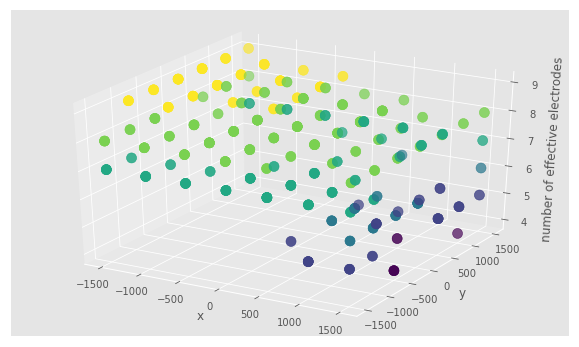

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.array(params)[:, 0], np.array(params)[:, 1], num_eff_ele, c=num_eff_ele, s=100)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('number of effective electrodes')

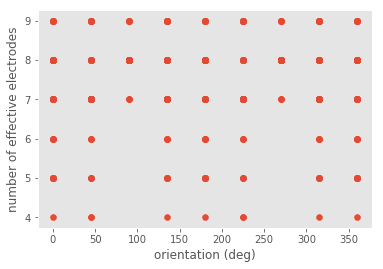

In [8]:
plt.scatter(np.array(params)[:, 2], num_eff_ele)
plt.xlabel('orientation (deg)')
plt.ylabel('number of effective electrodes')

2017-05-02 14:25:59,093 [pulse2percept.implants] [WARNING] Distance to fovea=3125 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-02 14:25:59,095 [pulse2percept.implants] [WARNING] Distance to fovea=3083 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-02 14:25:59,097 [pulse2percept.implants] [WARNING] Distance to fovea=3332 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-02 14:25:59,099 [pulse2percept.implants] [WARNING] Distance to fovea=3641 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-02 14:25:59,101 [pulse2percept.implants] [WARNING] Distance to fovea=3995 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-02 14:25:59,103 [pulse2percept.implants] [WARNING] Distance to fovea=4384 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-02 14:25:59,104 [pulse2percept.implants] [WARNING] Distance to

[-1500.0, -1000.0, 90.0]


(<matplotlib.figure.Figure at 0x7fdb377b62b0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdb3778f6a0>)

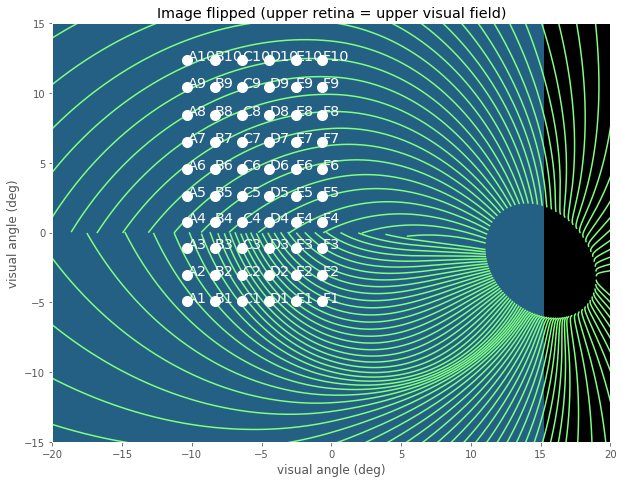

In [13]:
best = params[np.argmax(num_eff_ele)]
print(best)
argus = p2p.implants.ArgusII(x_center=best[0], y_center=best[1], rot=np.deg2rad(best[2]))
sim = p2p.Simulation(argus)
sim.set_optic_fiber_layer(sampling=200,
                          x_range=[p2p.retina.dva2ret(-25), p2p.retina.dva2ret(15)],
                          y_range=[p2p.retina.dva2ret(-15), p2p.retina.dva2ret(15)])
sim.plot_fundus()

2017-05-02 14:26:00,224 [pulse2percept.implants] [WARNING] Distance to fovea=3308 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-02 14:26:00,225 [pulse2percept.implants] [WARNING] Distance to fovea=3825 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-02 14:26:00,227 [pulse2percept.implants] [WARNING] Distance to fovea=3253 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-02 14:26:00,228 [pulse2percept.implants] [WARNING] Distance to fovea=3778 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-02 14:26:00,229 [pulse2percept.implants] [WARNING] Distance to fovea=3282 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-02 14:26:00,231 [pulse2percept.implants] [WARNING] Distance to fovea=3803 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-05-02 14:26:00,232 [pulse2percept.implants] [WARNING] Distance to

[1500.0, -500.0, 45.0]


(<matplotlib.figure.Figure at 0x7fdb36af92b0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdb36bd96d8>)

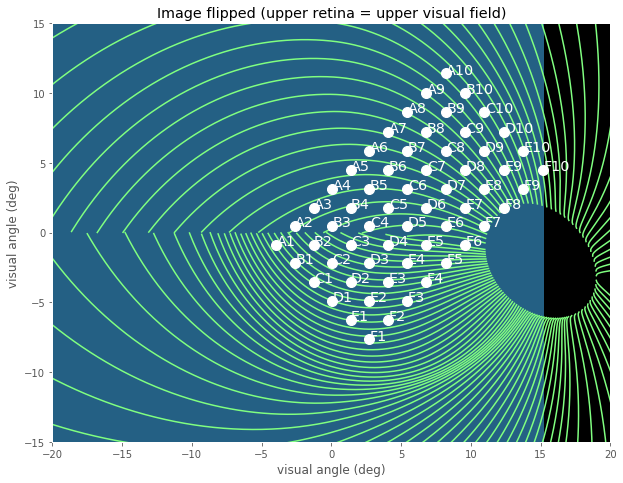

In [14]:
worst = params[np.argmin(num_eff_ele)]
print(worst)
argus = p2p.implants.ArgusII(x_center=worst[0], y_center=worst[1], rot=np.deg2rad(worst[2]))
sim = p2p.Simulation(argus)
sim.set_optic_fiber_layer(sampling=200,
                          x_range=[p2p.retina.dva2ret(-25), p2p.retina.dva2ret(15)],
                          y_range=[p2p.retina.dva2ret(-15), p2p.retina.dva2ret(15)])
sim.plot_fundus()